# Project ARC-Prize-2024
Building an AGI to identify patterns in Grid

## Approaches:
1. **Processing the data**: Loading json files.Mappin the colours to the integers in the matrix. Make a copy of the data in the form of Pandas DataFrame. Also Separate the Grid size of each grid. Tranforming data into images would be a challenge of its own
2. **Model training approaches**: 
    * Train a **CNN** model with **MTL(Multi - Tasking Layer)** architechture on the training data. Then on evaluation data fit the model again for the task example and then do predict the test in the task. 
        * **We can add more complexity to the model pipeline by doing this** - The first predicts by seeing the example input and evaluates its accuracy with the pattwe 

## Importing Libraries

In [2]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import json
import sklearn
from skimage.io import imread
from skimage.transform import resize
import tensorflow as tf
import keras
from keras import models,Sequential,layers
import gc
import os

In [3]:
print(pd.__version__)

2.2.2


## Loading Dataset

In [4]:
# configuration
data_folder=r'../arc-prize-2024'
training_task_test_solution=f'{data_folder}/arc-agi_training_solutions.json'
training_data_folder=r'../processed_data/training_data'
evaluation_data_folder=r'../processed_data/evaluation_data'

In [ ]:
puzzle_ids=[]
train=[]
test=[]
file=json.load(open(f'{data_folder}/arc-agi_training_challenges.json','r'))
# print(file)
for puzzle_id in file:
    print('Processing image id: ',puzzle_id)
    puzzle_ids.append(puzzle_id)
    train.append(file[puzzle_id]['train'])
    test.append(file[puzzle_id]['test'])

In [ ]:
# print(train[0])
example_count=len(train[0])
input=[]
output=[]
for i in range(0,example_count):
    print(train[0][i]['input'])
    print(train[0][i]['output'])
    input.append(train[0][i]['input'])
    output.append(train[0][i]['output'])
    
dataset=pd.DataFrame({'input':input, 'output':output})
print(dataset)
# sample_dataset=pd.DataFrame({'input': train[0]['input'],
#                              'output': train[0]['output']})
# print(sample_dataset)

In [ ]:
print(test[2])

In [ ]:
for i in range(len(puzzle_ids)):
    example_counts = len(train[i])
    os.mkdir(os.path.join(training_data_folder,puzzle_ids[i]))
    input=[]
    output=[]
    for j in range(0,example_counts):
        input.append(train[i][j]['input'])
        output.append(train[i][j]['output'])
    train_dataset=pd.DataFrame({'input':input, 'output':output})
    train_dataset.to_csv(f'{training_data_folder}/{puzzle_ids[i]}/train.csv', index=False)
    input=[]
    test_count=len(test[i])
    for j in range(0,test_count):
        input.append(test[i][j]['input'])
    test_dataset=pd.DataFrame({'input':input})
    test_dataset.to_csv(f'{training_data_folder}/{puzzle_ids[i]}/test.csv', index=False)

In [ ]:
color_map="black blue green yellow red orange purple brown pink cyan".split()

In [ ]:
#  testinmg out how to convert matrix to colours
path_to_data=r'..\processed_data\training_data\0a938d79\train.csv'
data=pd.read_csv(path_to_data)
print(data)

In [ ]:
array=data['input'][0]
print(array)
array=array.replace('],','];')
print(array)
print(type(array))
temp=np.asarray(np.matrix(array))
print(temp)
print(type(temp))
print(temp.shape)

In [ ]:
import matplotlib.colors


cmap=matplotlib.colors.ListedColormap(name="cmap",colors=color_map,N=None)
plt.grid(False)
plt.imshow(temp, cmap=cmap)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors

# Define your color map
color_map = ["black", "blue", "green", "yellow", "red", "orange", "purple", "brown", "pink", "cyan"]
cmap = matplotlib.colors.ListedColormap(color_map)

for puzzle_folder in os.listdir(training_data_folder):
    print('Puzzle id: ', puzzle_folder)
    path = os.path.join(training_data_folder, puzzle_folder)
    print('Path generated: ', path)
    for file in os.listdir(path):
        print('Number of files found: ', len(os.listdir(path)))
        print('File found: ', file)
        file_path = os.path.join(path, file)
        print('Path generated: ', file_path)
        
        if file == 'train.csv':
            dataframe = pd.read_csv(file_path)
            
            for i in range(dataframe.shape[0]):
                input_array = dataframe['input'][i]
                output_array = dataframe['output'][i]
                
                # Process input and output arrays
                input_array = input_array.replace('],', '];')
                output_array = output_array.replace('],', '];')
                input_array = np.asarray(np.matrix(input_array))
                output_array = np.asarray(np.matrix(output_array))
                
                # Plot and save input array
                plt.figure()
                plt.imshow(input_array, cmap=cmap)
                plt.axis('off')  # Disable axes
                plt.grid(True)  # Enable grid
                plt.savefig(f"{path}/input{i}.jpg", bbox_inches='tight')
                plt.close()

                # Plot and save output array
                plt.figure()
                plt.imshow(output_array, cmap=cmap)
                plt.axis('off')  # Disable axes
                plt.grid(visible=True,axis='both')  # Enable grid
                plt.savefig(f"{path}/output{i}.jpg", bbox_inches='tight')
                plt.close()
        if file=='test.csv':
            dataframe=pd.read_csv(file_path)
            for i in range(dataframe.shape[0]):
                input_array=dataframe['input'][i]

                input_array=input_array.replace('],', '];')
                input_array=np.asarray(np.matrix(input_array))
                
                plt.figure()
                plt.imshow(input_array, cmap=cmap)
                plt.axis('off')  # Disable axes
                plt.grid(True)  # Enable grid
                plt.savefig(f"{path}/test_input{i}.jpg", bbox_inches='tight')
                plt.close()

In [ ]:
gc.collect()

Processing Puzzle id:  007bbfb7
extracting solution
[[[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 7, 0, 7, 7, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 7, 0, 7, 7, 0, 0, 0, 0]]


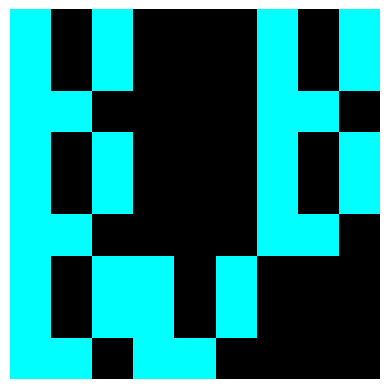

Processing Puzzle id:  00d62c1b
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 4, 4, 4, 4, 3, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 3, 4, 4, 4, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 4, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 

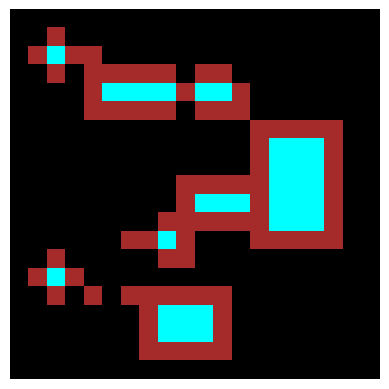

Processing Puzzle id:  017c7c7b
extracting solution
[[[2, 2, 2], [0, 2, 0], [0, 2, 0], [2, 2, 2], [0, 2, 0], [0, 2, 0], [2, 2, 2], [0, 2, 0], [0, 2, 0]]]
creating Dataframe
creating destination path
[[2, 2, 2], [0, 2, 0], [0, 2, 0], [2, 2, 2], [0, 2, 0], [0, 2, 0], [2, 2, 2], [0, 2, 0], [0, 2, 0]]


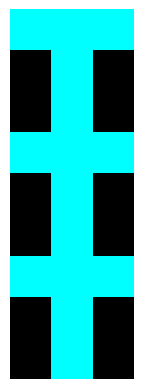

Processing Puzzle id:  025d127b
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 4, 4, 4, 4, 4, 4, 0, 0], [0, 0, 4, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 4], [0, 0, 0, 0, 4, 0, 0, 0, 0, 4], [0, 0, 0, 0, 4, 4, 4, 4, 4, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 4, 4, 4, 4, 4, 4, 0, 0], [0, 0, 4, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 4], [0, 0, 0, 0, 4, 0, 0, 0, 0, 4], [0, 0, 0, 0, 4, 4, 4, 4, 4, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


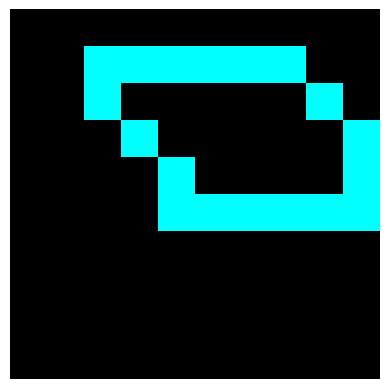

Processing Puzzle id:  045e512c
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 8, 8, 8, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2], [0, 0, 0, 0, 0, 0, 8, 0, 8, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2], [0, 0, 0, 0, 0, 0, 8, 0, 8, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

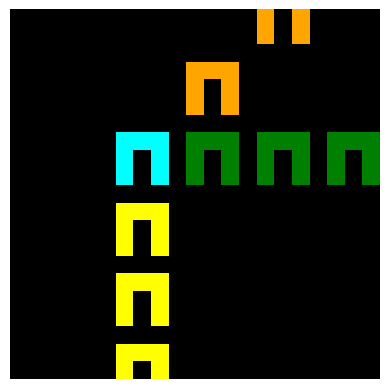

Processing Puzzle id:  0520fde7
extracting solution
[[[2, 0, 2], [0, 0, 0], [0, 0, 0]]]
creating Dataframe
creating destination path
[[2, 0, 2], [0, 0, 0], [0, 0, 0]]


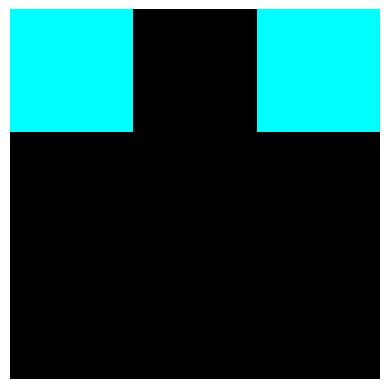

Processing Puzzle id:  05269061
extracting solution
[[[2, 1, 4, 2, 1, 4, 2], [1, 4, 2, 1, 4, 2, 1], [4, 2, 1, 4, 2, 1, 4], [2, 1, 4, 2, 1, 4, 2], [1, 4, 2, 1, 4, 2, 1], [4, 2, 1, 4, 2, 1, 4], [2, 1, 4, 2, 1, 4, 2]]]
creating Dataframe
creating destination path
[[2, 1, 4, 2, 1, 4, 2], [1, 4, 2, 1, 4, 2, 1], [4, 2, 1, 4, 2, 1, 4], [2, 1, 4, 2, 1, 4, 2], [1, 4, 2, 1, 4, 2, 1], [4, 2, 1, 4, 2, 1, 4], [2, 1, 4, 2, 1, 4, 2]]


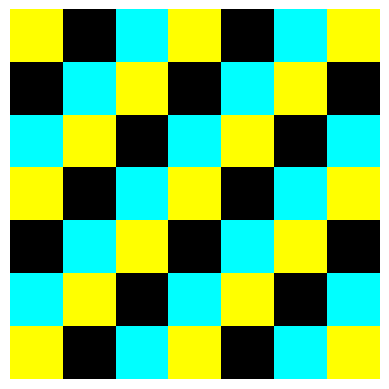

Processing Puzzle id:  05f2a901
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 2, 0, 0, 0, 0, 0], [0, 8, 8, 2, 2, 0, 0, 0, 0, 0], [0, 8, 8, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 2, 0, 0, 0, 0, 0], [0, 8, 8, 2, 2, 0, 0, 0, 0, 0], [0, 8, 8, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


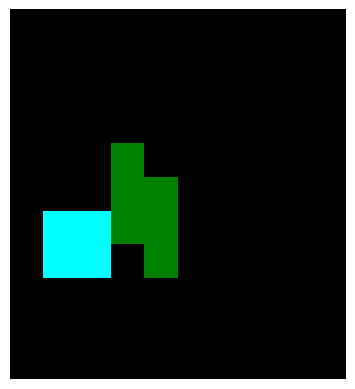

Processing Puzzle id:  06df4c85
extracting solution
[[[0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0], [0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 0, 4, 0, 0, 4, 8, 8, 4, 0, 0, 4, 0, 0, 4, 2, 2, 4, 0, 0, 4, 0, 0, 4, 0, 0], [0, 0, 4, 0, 0, 4, 8, 8, 4, 0, 0, 4, 0, 0, 4, 2, 2, 4, 0, 0, 4, 0, 0, 4, 0, 0], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 0, 4, 0, 0, 4, 8, 8, 4, 0, 0, 4, 0, 0, 4, 2, 2, 4, 0, 0, 4, 0, 0, 4, 0, 0], [0, 0, 4, 0, 0, 4, 8, 8, 4, 0, 0, 4, 0, 0, 4, 2, 2, 4, 0, 0, 4, 0, 0, 4, 0, 0], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 0, 4, 0, 0, 4, 8, 8, 4, 0, 0, 4, 0, 0, 4, 2, 2, 4, 0, 0, 4, 3, 3, 4, 0, 0], [0, 0, 4, 0, 0, 4, 8, 8, 4, 0, 0, 4, 0, 0, 4, 2, 2, 4, 0, 0, 4, 3, 3, 4, 0, 0], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

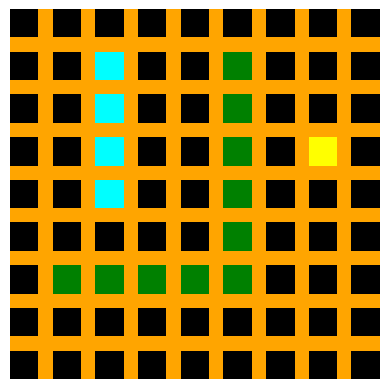

Processing Puzzle id:  08ed6ac7
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 2, 0, 0, 0], [0, 1, 0, 0, 0, 2, 0, 0, 0], [0, 1, 0, 0, 0, 2, 0, 3, 0], [0, 1, 0, 0, 0, 2, 0, 3, 0], [0, 1, 0, 4, 0, 2, 0, 3, 0], [0, 1, 0, 4, 0, 2, 0, 3, 0], [0, 1, 0, 4, 0, 2, 0, 3, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 2, 0, 0, 0], [0, 1, 0, 0, 0, 2, 0, 0, 0], [0, 1, 0, 0, 0, 2, 0, 3, 0], [0, 1, 0, 0, 0, 2, 0, 3, 0], [0, 1, 0, 4, 0, 2, 0, 3, 0], [0, 1, 0, 4, 0, 2, 0, 3, 0], [0, 1, 0, 4, 0, 2, 0, 3, 0]]


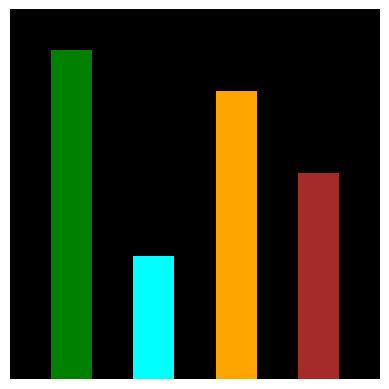

Processing Puzzle id:  09629e4f
extracting solution
[[[0, 0, 0, 5, 2, 2, 2, 5, 4, 4, 4], [0, 0, 0, 5, 2, 2, 2, 5, 4, 4, 4], [0, 0, 0, 5, 2, 2, 2, 5, 4, 4, 4], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 6, 6, 6, 5, 3, 3, 3], [0, 0, 0, 5, 6, 6, 6, 5, 3, 3, 3], [0, 0, 0, 5, 6, 6, 6, 5, 3, 3, 3], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 5, 2, 2, 2, 5, 4, 4, 4], [0, 0, 0, 5, 2, 2, 2, 5, 4, 4, 4], [0, 0, 0, 5, 2, 2, 2, 5, 4, 4, 4], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 6, 6, 6, 5, 3, 3, 3], [0, 0, 0, 5, 6, 6, 6, 5, 3, 3, 3], [0, 0, 0, 5, 6, 6, 6, 5, 3, 3, 3], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0]]


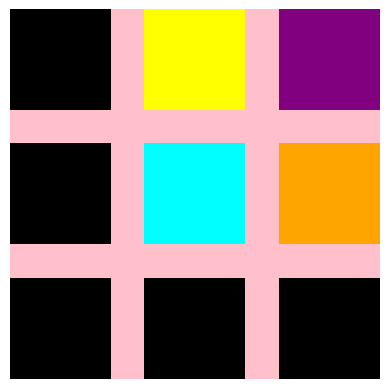

Processing Puzzle id:  0962bcdd
extracting solution
[[[0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 4, 3, 3, 0], [0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 0], [0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 4, 0], [4, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 4, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0], [3, 3, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0], [0, 4, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0], [4, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 4, 3, 3, 0], [0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 0], [0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 4, 0], [4, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 4, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0], [3, 3, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0], [0, 4, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0], [4, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 

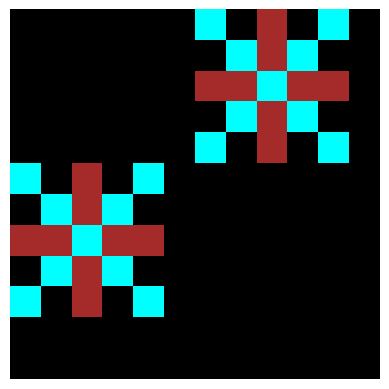

Processing Puzzle id:  0a938d79
extracting solution
[[[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0]]]
creating Dataframe
creating dest

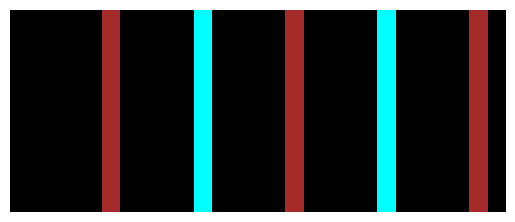

Processing Puzzle id:  0b148d64
extracting solution
[[[1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 1, 1], [1, 1, 0, 1, 1, 0], [0, 0, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]]
creating Dataframe
creating destination path
[[1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 1, 1], [1, 1, 0, 1, 1, 0], [0, 0, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]


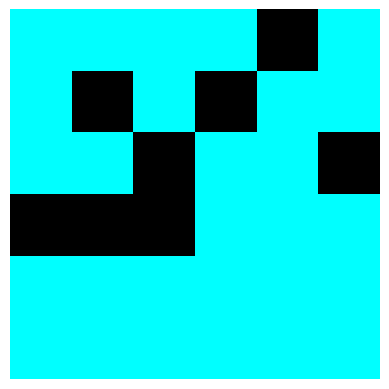

Processing Puzzle id:  0ca9ddb6
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 7, 0, 0], [0, 4, 0, 4, 0, 7, 1, 7, 0], [0, 0, 2, 0, 0, 0, 7, 0, 0], [0, 4, 0, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 4, 0, 4], [0, 6, 0, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 4, 0, 4]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 7, 0, 0], [0, 4, 0, 4, 0, 7, 1, 7, 0], [0, 0, 2, 0, 0, 0, 7, 0, 0], [0, 4, 0, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 4, 0, 4], [0, 6, 0, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 4, 0, 4]]


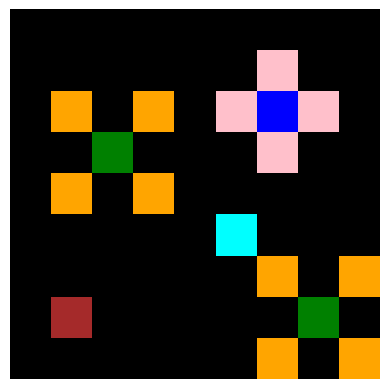

Processing Puzzle id:  0d3d703e
extracting solution
[[[9, 5, 4], [9, 5, 4], [9, 5, 4]]]
creating Dataframe
creating destination path
[[9, 5, 4], [9, 5, 4], [9, 5, 4]]


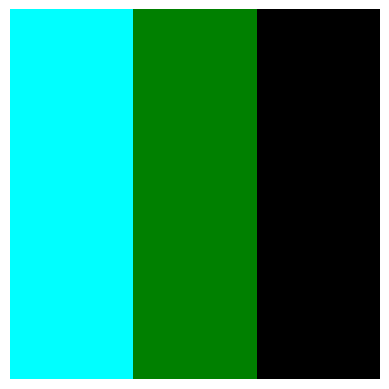

Processing Puzzle id:  0dfd9992
extracting solution
[[[9, 6, 5, 6, 9, 5, 3, 3, 5, 9, 6, 5, 6, 9, 5, 3, 3, 5, 9, 6, 5], [6, 3, 2, 3, 6, 2, 9, 9, 2, 6, 3, 2, 3, 6, 2, 9, 9, 2, 6, 3, 2], [5, 2, 1, 2, 5, 1, 8, 8, 1, 5, 2, 1, 2, 5, 1, 8, 8, 1, 5, 2, 1], [6, 3, 2, 3, 6, 2, 9, 9, 2, 6, 3, 2, 3, 6, 2, 9, 9, 2, 6, 3, 2], [9, 6, 5, 6, 9, 5, 3, 3, 5, 9, 6, 5, 6, 9, 5, 3, 3, 5, 9, 6, 5], [5, 2, 1, 2, 5, 1, 8, 8, 1, 5, 2, 1, 2, 5, 1, 8, 8, 1, 5, 2, 1], [3, 9, 8, 9, 3, 8, 6, 6, 8, 3, 9, 8, 9, 3, 8, 6, 6, 8, 3, 9, 8], [3, 9, 8, 9, 3, 8, 6, 6, 8, 3, 9, 8, 9, 3, 8, 6, 6, 8, 3, 9, 8], [5, 2, 1, 2, 5, 1, 8, 8, 1, 5, 2, 1, 2, 5, 1, 8, 8, 1, 5, 2, 1], [9, 6, 5, 6, 9, 5, 3, 3, 5, 9, 6, 5, 6, 9, 5, 3, 3, 5, 9, 6, 5], [6, 3, 2, 3, 6, 2, 9, 9, 2, 6, 3, 2, 3, 6, 2, 9, 9, 2, 6, 3, 2], [5, 2, 1, 2, 5, 1, 8, 8, 1, 5, 2, 1, 2, 5, 1, 8, 8, 1, 5, 2, 1], [6, 3, 2, 3, 6, 2, 9, 9, 2, 6, 3, 2, 3, 6, 2, 9, 9, 2, 6, 3, 2], [9, 6, 5, 6, 9, 5, 3, 3, 5, 9, 6, 5, 6, 9, 5, 3, 3, 5, 9, 6, 5], [5, 2, 1, 2, 5, 1, 8, 8, 1, 5, 2, 1,

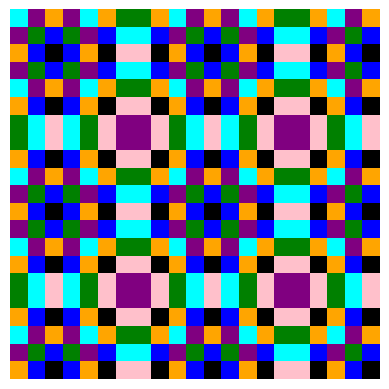

Processing Puzzle id:  0e206a2e
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 5, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0

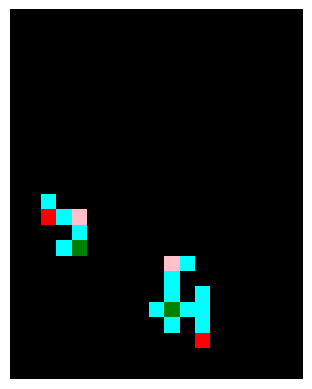

Processing Puzzle id:  10fcaaa3
extracting solution
[[[0, 3, 0, 0, 0, 0, 3, 0, 0, 0], [8, 0, 8, 0, 0, 8, 0, 8, 0, 0], [0, 0, 8, 0, 8, 0, 0, 8, 0, 8], [0, 0, 0, 3, 0, 0, 0, 0, 3, 0], [8, 0, 8, 0, 8, 8, 0, 8, 0, 8], [8, 3, 8, 0, 0, 8, 3, 8, 0, 0], [8, 3, 8, 0, 0, 8, 3, 8, 0, 0], [8, 0, 8, 0, 0, 8, 0, 8, 0, 0], [0, 0, 8, 0, 8, 0, 0, 8, 0, 8], [0, 0, 0, 3, 0, 0, 0, 0, 3, 0], [8, 0, 8, 0, 8, 8, 0, 8, 0, 8], [0, 3, 0, 0, 0, 0, 3, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 3, 0, 0, 0, 0, 3, 0, 0, 0], [8, 0, 8, 0, 0, 8, 0, 8, 0, 0], [0, 0, 8, 0, 8, 0, 0, 8, 0, 8], [0, 0, 0, 3, 0, 0, 0, 0, 3, 0], [8, 0, 8, 0, 8, 8, 0, 8, 0, 8], [8, 3, 8, 0, 0, 8, 3, 8, 0, 0], [8, 3, 8, 0, 0, 8, 3, 8, 0, 0], [8, 0, 8, 0, 0, 8, 0, 8, 0, 0], [0, 0, 8, 0, 8, 0, 0, 8, 0, 8], [0, 0, 0, 3, 0, 0, 0, 0, 3, 0], [8, 0, 8, 0, 8, 8, 0, 8, 0, 8], [0, 3, 0, 0, 0, 0, 3, 0, 0, 0]]


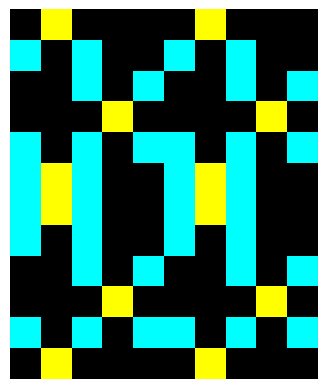

Processing Puzzle id:  11852cab
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 4, 0, 1, 0, 0, 0, 0], [0, 0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 4, 0, 1, 0, 4, 0, 0, 0, 0], [0, 0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 1, 0, 4, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 4, 0, 1, 0, 0, 0, 0], [0, 0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 4, 0, 1, 0, 4, 0, 0, 0, 0], [0, 0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 1, 0, 4, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


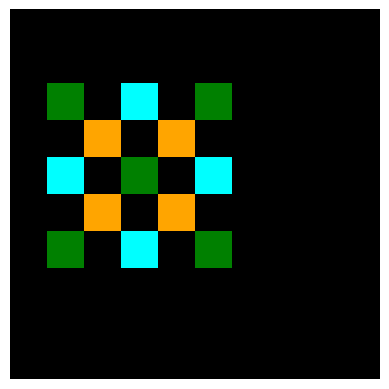

Processing Puzzle id:  1190e5a7
extracting solution
[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1]]]
creating Dataframe
creating destination path
[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1]]


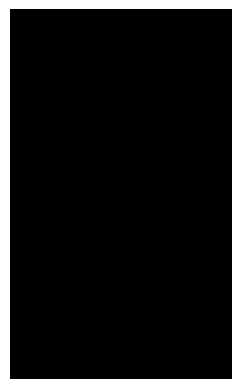

Processing Puzzle id:  137eaa0f
extracting solution
[[[4, 9, 8], [9, 5, 4], [9, 2, 2]]]
creating Dataframe
creating destination path
[[4, 9, 8], [9, 5, 4], [9, 2, 2]]


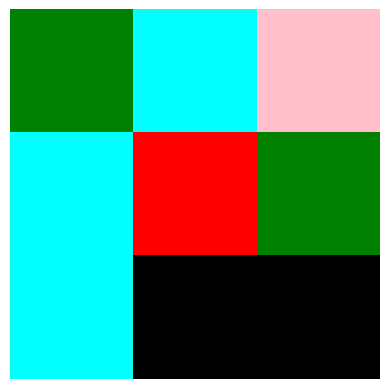

Processing Puzzle id:  150deff5
extracting solution
[[[0, 0, 8, 8, 0, 2, 2, 2, 0, 0, 0], [0, 0, 8, 8, 0, 0, 2, 0, 0, 0, 0], [0, 2, 2, 2, 8, 8, 2, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 2, 0, 0, 0, 0], [0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 8, 8, 0, 2, 2, 2, 0, 0, 0], [0, 0, 8, 8, 0, 0, 2, 0, 0, 0, 0], [0, 2, 2, 2, 8, 8, 2, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 2, 0, 0, 0, 0], [0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


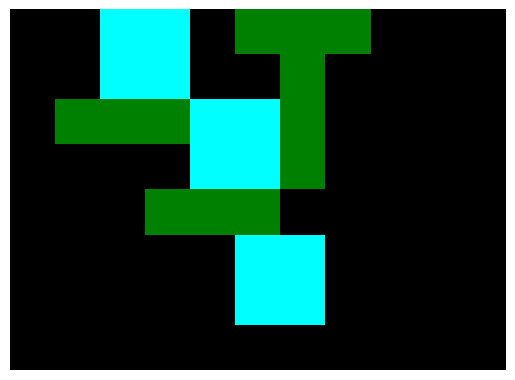

Processing Puzzle id:  178fcbfb
extracting solution
[[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0]]]
creating Dataframe
creating destination path
[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0]]


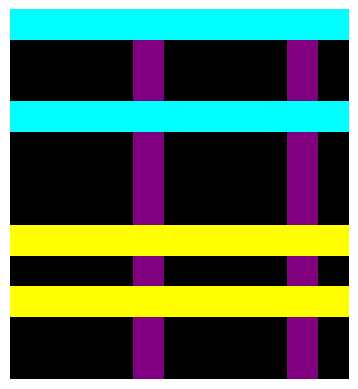

Processing Puzzle id:  1a07d186
extracting solution
[[[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0], [0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,

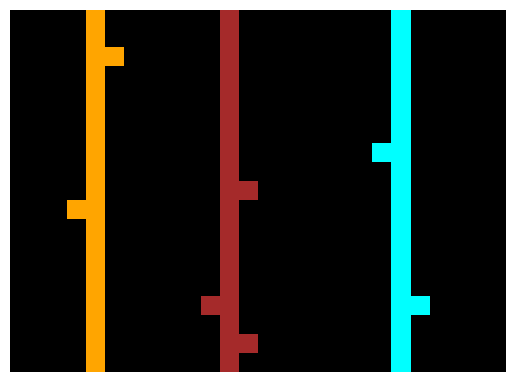

Processing Puzzle id:  1b2d62fb
extracting solution
[[[0, 0, 8], [8, 0, 0], [0, 0, 8], [0, 0, 0], [8, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 8], [8, 0, 0], [0, 0, 8], [0, 0, 0], [8, 0, 0]]


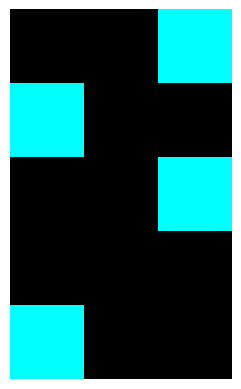

Processing Puzzle id:  1b60fb0c
extracting solution
[[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 1, 0], [0, 2, 0, 0, 1, 0, 0, 0, 1, 0], [0, 2, 2, 0, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 1, 1, 0, 1, 1, 0], [0, 2, 0, 0, 0, 1, 0, 0, 1, 0], [0, 2, 0, 0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 1, 0], [0, 2, 0, 0, 1, 0, 0, 0, 1, 0], [0, 2, 2, 0, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 1, 1, 0, 1, 1, 0], [0, 2, 0, 0, 0, 1, 0, 0, 1, 0], [0, 2, 0, 0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]


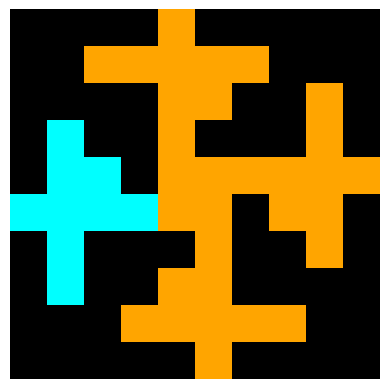

Processing Puzzle id:  1bfc4729
extracting solution
[[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 0, 0, 0, 0, 0, 0, 0, 0, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 0, 0, 0, 0, 0, 0, 0, 0, 2], [2, 0, 0, 0, 0, 0, 0, 0, 0, 2], [8, 0, 0, 0, 0, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 0, 0, 0, 0, 8], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [8, 0, 0, 0, 0, 0, 0, 0, 0, 8], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]]]
creating Dataframe
creating destination path
[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 0, 0, 0, 0, 0, 0, 0, 0, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 0, 0, 0, 0, 0, 0, 0, 0, 2], [2, 0, 0, 0, 0, 0, 0, 0, 0, 2], [8, 0, 0, 0, 0, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 0, 0, 0, 0, 8], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [8, 0, 0, 0, 0, 0, 0, 0, 0, 8], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]]


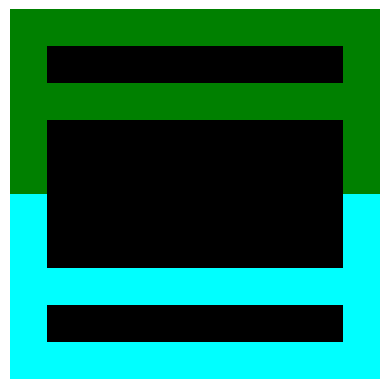

Processing Puzzle id:  1c786137
extracting solution
[[[2, 0, 8, 1, 1, 1, 0, 1, 0], [8, 1, 0, 8, 2, 8, 1, 2, 8], [8, 2, 0, 2, 0, 1, 1, 8, 1], [0, 1, 8, 8, 1, 1, 8, 1, 8], [0, 1, 8, 8, 0, 8, 0, 2, 0], [0, 8, 8, 2, 8, 8, 8, 8, 8], [8, 0, 2, 0, 0, 0, 0, 8, 8], [0, 2, 8, 8, 1, 2, 0, 0, 2]]]
creating Dataframe
creating destination path
[[2, 0, 8, 1, 1, 1, 0, 1, 0], [8, 1, 0, 8, 2, 8, 1, 2, 8], [8, 2, 0, 2, 0, 1, 1, 8, 1], [0, 1, 8, 8, 1, 1, 8, 1, 8], [0, 1, 8, 8, 0, 8, 0, 2, 0], [0, 8, 8, 2, 8, 8, 8, 8, 8], [8, 0, 2, 0, 0, 0, 0, 8, 8], [0, 2, 8, 8, 1, 2, 0, 0, 2]]


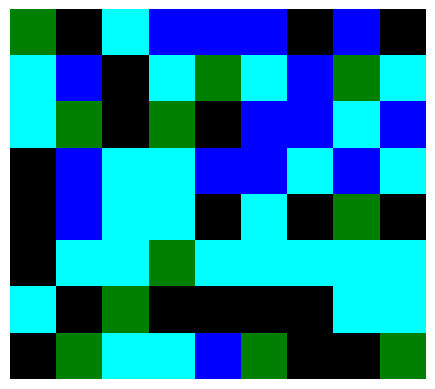

Processing Puzzle id:  1caeab9d
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 4, 4, 0, 0, 2, 2], [0, 1, 1, 0, 4, 4, 0, 0, 2, 2], [1, 0, 0, 4, 0, 0, 0, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 4, 4, 0, 0, 2, 2], [0, 1, 1, 0, 4, 4, 0, 0, 2, 2], [1, 0, 0, 4, 0, 0, 0, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


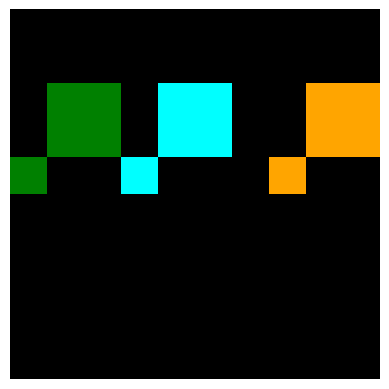

Processing Puzzle id:  1cf80156
extracting solution
[[[0, 0, 6, 6, 6, 6], [0, 0, 6, 0, 0, 0], [6, 0, 6, 0, 0, 0], [6, 6, 6, 6, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 6, 6, 6, 6], [0, 0, 6, 0, 0, 0], [6, 0, 6, 0, 0, 0], [6, 6, 6, 6, 0, 0]]


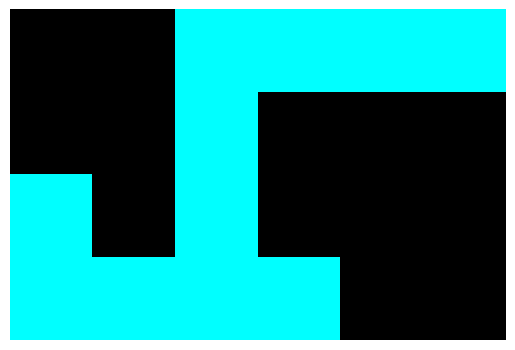

Processing Puzzle id:  1e0a9b12
extracting solution
[[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [5, 0, 0, 0, 0], [5, 2, 0, 4, 0], [5, 2, 6, 4, 3]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [5, 0, 0, 0, 0], [5, 2, 0, 4, 0], [5, 2, 6, 4, 3]]


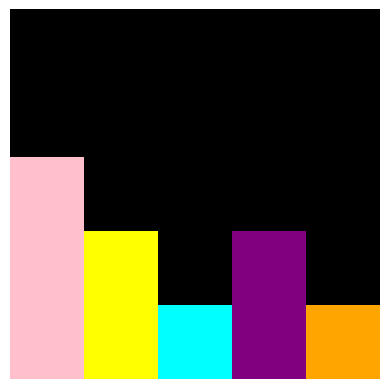

Processing Puzzle id:  1e32b0e9
extracting solution
[[[0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0], [0, 4, 4, 4, 0, 9, 0, 4, 4, 9, 0, 9, 0, 9, 9, 9, 0], [0, 4, 0, 4, 0, 9, 0, 9, 0, 9, 0, 9, 0, 9, 0, 9, 0], [0, 4, 4, 4, 0, 9, 0, 9, 9, 9, 0, 9, 0, 9, 9, 9, 0], [0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0], [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0], [0, 9, 4, 9, 0, 9, 0, 9, 9, 9, 0, 9, 0, 9, 9, 9, 0], [0, 4, 0, 4, 0, 9, 0, 9, 0, 9, 0, 9, 0, 9, 0, 9, 0], [0, 9, 4, 9, 0, 9, 0, 4, 4, 9, 0, 9, 0, 9, 9, 9, 0], [0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0], [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0], [0, 9, 9, 9, 0, 9, 0, 9, 9, 9, 0, 9, 0, 9, 9, 9, 0], [0, 9, 0, 9, 0, 9, 0, 4, 0, 4, 0, 9, 0, 9, 0, 9, 0], [0, 9, 9, 9, 0, 9, 0, 9, 9, 9, 0, 9, 0, 9, 9, 9, 0], [0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path

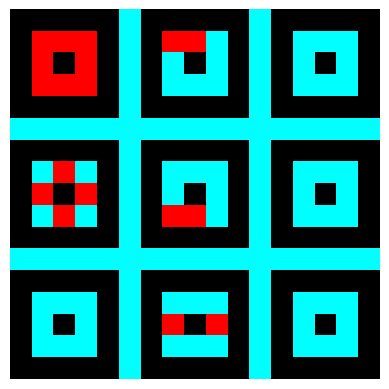

Processing Puzzle id:  1f0c79e5
extracting solution
[[[0, 0, 8, 8, 8, 0, 0, 8, 8], [0, 0, 0, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 8, 8, 8, 0], [0, 0, 0, 0, 0, 8, 8, 8, 0], [0, 0, 0, 0, 0, 0, 8, 8, 8], [0, 0, 0, 0, 0, 0, 0, 8, 8], [0, 0, 0, 0, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 8, 8, 8, 0, 0, 8, 8], [0, 0, 0, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 8, 8, 8, 8, 0], [0, 0, 0, 0, 0, 8, 8, 8, 0], [0, 0, 0, 0, 0, 0, 8, 8, 8], [0, 0, 0, 0, 0, 0, 0, 8, 8], [0, 0, 0, 0, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


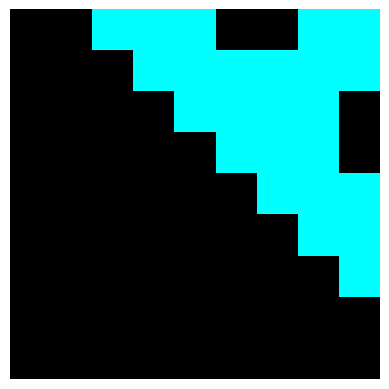

Processing Puzzle id:  1f642eb9
extracting solution
[[[0, 0, 0, 6, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [9, 0, 9, 6, 8, 2, 0, 0, 0, 0], [0, 0, 8, 8, 8, 7, 0, 0, 0, 7], [3, 0, 3, 8, 8, 8, 0, 0, 0, 0], [4, 0, 4, 8, 6, 8, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 6, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [9, 0, 9, 6, 8, 2, 0, 0, 0, 0], [0, 0, 8, 8, 8, 7, 0, 0, 0, 7], [3, 0, 3, 8, 8, 8, 0, 0, 0, 0], [4, 0, 4, 8, 6, 8, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0]]


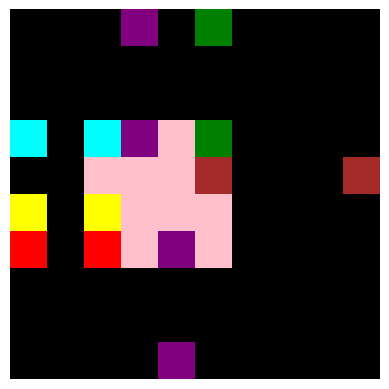

Processing Puzzle id:  1f85a75f
extracting solution
[[[0, 2, 2, 2], [2, 2, 0, 2], [2, 2, 0, 2], [0, 2, 2, 2]]]
creating Dataframe
creating destination path
[[0, 2, 2, 2], [2, 2, 0, 2], [2, 2, 0, 2], [0, 2, 2, 2]]


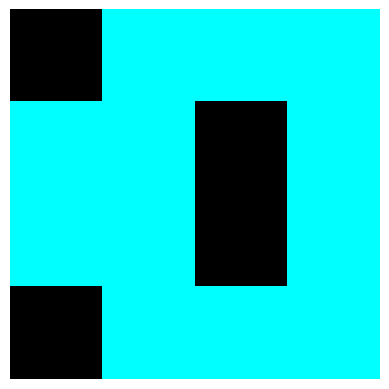

Processing Puzzle id:  1f876c06
extracting solution
[[[0, 0, 0, 0, 0, 0, 3, 0, 0, 9], [7, 0, 0, 0, 0, 3, 0, 0, 9, 0], [0, 7, 0, 0, 3, 0, 0, 9, 0, 0], [0, 0, 7, 3, 0, 0, 9, 0, 0, 0], [6, 0, 0, 7, 0, 0, 0, 0, 0, 0], [0, 6, 0, 0, 7, 0, 0, 0, 0, 4], [0, 0, 6, 0, 0, 7, 0, 0, 4, 0], [0, 0, 0, 6, 0, 0, 7, 4, 0, 0], [0, 0, 0, 0, 0, 0, 4, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 3, 0, 0, 9], [7, 0, 0, 0, 0, 3, 0, 0, 9, 0], [0, 7, 0, 0, 3, 0, 0, 9, 0, 0], [0, 0, 7, 3, 0, 0, 9, 0, 0, 0], [6, 0, 0, 7, 0, 0, 0, 0, 0, 0], [0, 6, 0, 0, 7, 0, 0, 0, 0, 4], [0, 0, 6, 0, 0, 7, 0, 0, 4, 0], [0, 0, 0, 6, 0, 0, 7, 4, 0, 0], [0, 0, 0, 0, 0, 0, 4, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0, 0, 0, 0]]


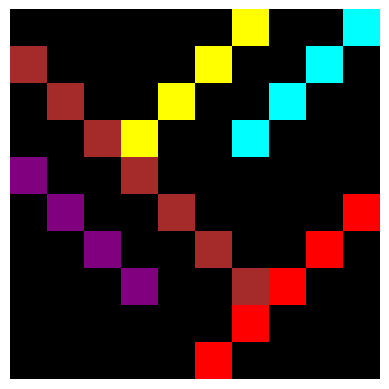

Processing Puzzle id:  1fad071e
extracting solution
[[[1, 1, 1, 0, 0]]]
creating Dataframe
creating destination path
[[1, 1, 1, 0, 0]]


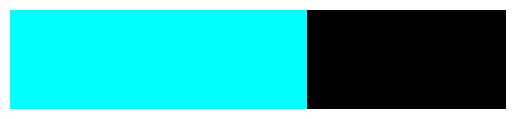

Processing Puzzle id:  2013d3e2
extracting solution
[[[0, 0, 0], [0, 4, 4], [8, 8, 3]]]
creating Dataframe
creating destination path
[[0, 0, 0], [0, 4, 4], [8, 8, 3]]


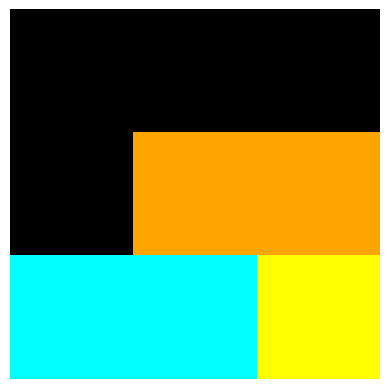

Processing Puzzle id:  2204b7a8
extracting solution
[[[5, 5, 0, 0, 0, 0, 0, 0, 0, 4], [5, 0, 0, 0, 0, 4, 0, 0, 4, 4], [5, 0, 0, 0, 0, 0, 0, 0, 0, 4], [5, 0, 0, 5, 0, 0, 0, 0, 0, 4], [5, 0, 0, 0, 0, 0, 4, 0, 0, 4], [5, 0, 0, 5, 0, 0, 0, 0, 0, 4], [5, 0, 0, 0, 0, 0, 0, 0, 0, 4], [5, 0, 0, 0, 5, 0, 0, 0, 0, 4], [5, 0, 5, 0, 0, 0, 4, 0, 0, 4], [5, 0, 0, 0, 0, 0, 0, 0, 0, 4]]]
creating Dataframe
creating destination path
[[5, 5, 0, 0, 0, 0, 0, 0, 0, 4], [5, 0, 0, 0, 0, 4, 0, 0, 4, 4], [5, 0, 0, 0, 0, 0, 0, 0, 0, 4], [5, 0, 0, 5, 0, 0, 0, 0, 0, 4], [5, 0, 0, 0, 0, 0, 4, 0, 0, 4], [5, 0, 0, 5, 0, 0, 0, 0, 0, 4], [5, 0, 0, 0, 0, 0, 0, 0, 0, 4], [5, 0, 0, 0, 5, 0, 0, 0, 0, 4], [5, 0, 5, 0, 0, 0, 4, 0, 0, 4], [5, 0, 0, 0, 0, 0, 0, 0, 0, 4]]


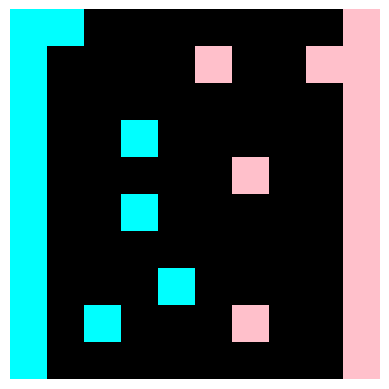

Processing Puzzle id:  22168020
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 4, 4, 0, 0, 0, 0, 0, 0], [0, 4, 4, 0, 7, 7, 7, 7, 7, 7], [0, 4, 4, 0, 0, 7, 7, 7, 7, 0], [0, 0, 0, 0, 0, 0, 7, 7, 0, 0], [0, 0, 0, 0, 0, 0, 7, 7, 0, 0], [0, 3, 3, 3, 3, 3, 3, 0, 0, 0], [0, 0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 3, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 3, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 4, 4, 0, 0, 0, 0, 0, 0], [0, 4, 4, 0, 7, 7, 7, 7, 7, 7], [0, 4, 4, 0, 0, 7, 7, 7, 7, 0], [0, 0, 0, 0, 0, 0, 7, 7, 0, 0], [0, 0, 0, 0, 0, 0, 7, 7, 0, 0], [0, 3, 3, 3, 3, 3, 3, 0, 0, 0], [0, 0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 3, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 3, 0, 0, 0, 0, 0]]


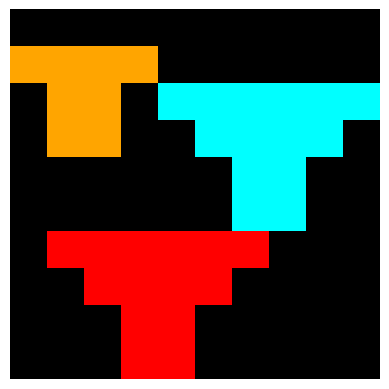

Processing Puzzle id:  22233c11
extracting solution
[[[8, 8, 8, 0, 0, 0, 0, 0, 0, 0], [8, 8, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 3, 0], [0, 0, 0, 0, 0, 0, 3, 3, 3, 0], [0, 0, 0, 0, 0, 0, 3, 3, 3, 0], [0, 0, 0, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 8]]]
creating Dataframe
creating destination path
[[8, 8, 8, 0, 0, 0, 0, 0, 0, 0], [8, 8, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 3, 0], [0, 0, 0, 0, 0, 0, 3, 3, 3, 0], [0, 0, 0, 0, 0, 0, 3, 3, 3, 0], [0, 0, 0, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 8]]


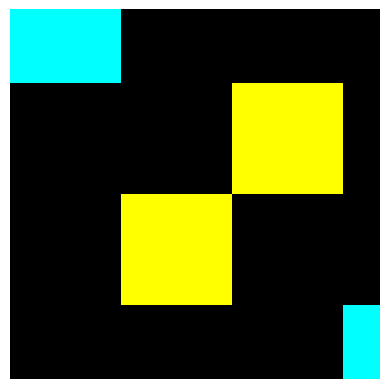

Processing Puzzle id:  2281f1f4
extracting solution
[[[5, 0, 5, 5, 0, 0, 5, 0, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 2, 2, 0, 0, 2, 0, 2, 5], [2, 0, 2, 2, 0, 0, 2, 0, 2, 5], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 2, 2, 0, 0, 2, 0, 2, 5], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 2, 2, 0, 0, 2, 0, 2, 5], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 2, 2, 0, 0, 2, 0, 2, 5]]]
creating Dataframe
creating destination path
[[5, 0, 5, 5, 0, 0, 5, 0, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 2, 2, 0, 0, 2, 0, 2, 5], [2, 0, 2, 2, 0, 0, 2, 0, 2, 5], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 2, 2, 0, 0, 2, 0, 2, 5], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 2, 2, 0, 0, 2, 0, 2, 5], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 2, 2, 0, 0, 2, 0, 2, 5]]


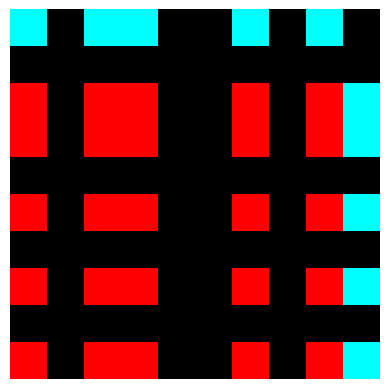

Processing Puzzle id:  228f6490
extracting solution
[[[0, 0, 5, 5, 5, 5, 5, 0, 0, 2], [2, 0, 5, 7, 7, 7, 5, 0, 0, 0], [0, 0, 5, 5, 7, 5, 5, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 0, 0, 2], [0, 0, 0, 0, 0, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 5, 5, 5, 5, 5, 5, 5], [0, 2, 0, 5, 4, 4, 4, 5, 5, 5], [2, 0, 0, 5, 5, 5, 5, 5, 5, 5]]]
creating Dataframe
creating destination path
[[0, 0, 5, 5, 5, 5, 5, 0, 0, 2], [2, 0, 5, 7, 7, 7, 5, 0, 0, 0], [0, 0, 5, 5, 7, 5, 5, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 0, 0, 2], [0, 0, 0, 0, 0, 2, 0, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 5, 5, 5, 5, 5, 5, 5], [0, 2, 0, 5, 4, 4, 4, 5, 5, 5], [2, 0, 0, 5, 5, 5, 5, 5, 5, 5]]


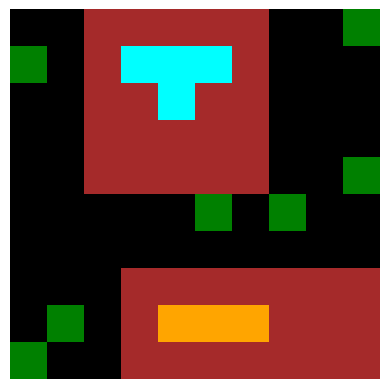

Processing Puzzle id:  22eb0ac0
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 0, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 0, 0, 9], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [9, 0, 0, 0, 0, 0, 0, 0, 0, 4]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 0, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 0, 0, 9], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [9, 0, 0, 0, 0, 0, 0, 0, 0, 4]]


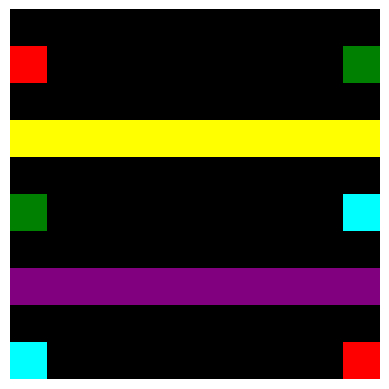

Processing Puzzle id:  234bbc79
extracting solution
[[[0, 2, 1, 1, 0, 0, 0, 0], [2, 2, 0, 1, 0, 3, 8, 8], [0, 0, 0, 1, 3, 3, 0, 8]]]
creating Dataframe
creating destination path
[[0, 2, 1, 1, 0, 0, 0, 0], [2, 2, 0, 1, 0, 3, 8, 8], [0, 0, 0, 1, 3, 3, 0, 8]]


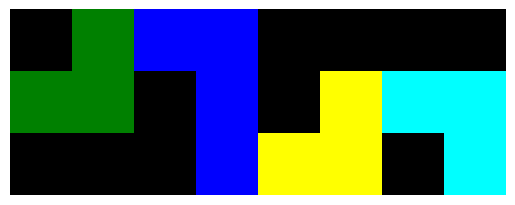

Processing Puzzle id:  23581191
extracting solution
[[[0, 7, 0, 0, 8, 0, 0, 0, 0], [8, 2, 8, 8, 8, 8, 8, 8, 8], [0, 7, 0, 0, 8, 0, 0, 0, 0], [0, 7, 0, 0, 8, 0, 0, 0, 0], [0, 7, 0, 0, 8, 0, 0, 0, 0], [0, 7, 0, 0, 8, 0, 0, 0, 0], [7, 7, 7, 7, 2, 7, 7, 7, 7], [0, 7, 0, 0, 8, 0, 0, 0, 0], [0, 7, 0, 0, 8, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 7, 0, 0, 8, 0, 0, 0, 0], [8, 2, 8, 8, 8, 8, 8, 8, 8], [0, 7, 0, 0, 8, 0, 0, 0, 0], [0, 7, 0, 0, 8, 0, 0, 0, 0], [0, 7, 0, 0, 8, 0, 0, 0, 0], [0, 7, 0, 0, 8, 0, 0, 0, 0], [7, 7, 7, 7, 2, 7, 7, 7, 7], [0, 7, 0, 0, 8, 0, 0, 0, 0], [0, 7, 0, 0, 8, 0, 0, 0, 0]]


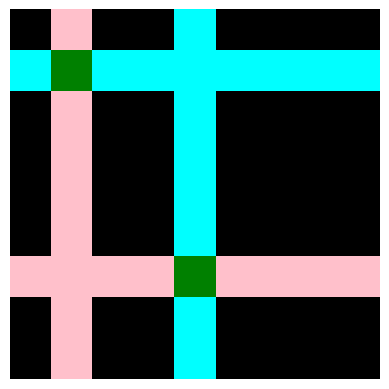

Processing Puzzle id:  239be575
extracting solution
[[[8]], [[0]]]
creating Dataframe
creating destination path
[[8]]
[[0]]


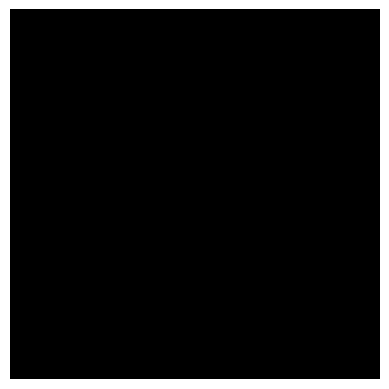

Processing Puzzle id:  23b5c85d
extracting solution
[[[6, 6, 6], [6, 6, 6], [6, 6, 6]]]
creating Dataframe
creating destination path
[[6, 6, 6], [6, 6, 6], [6, 6, 6]]


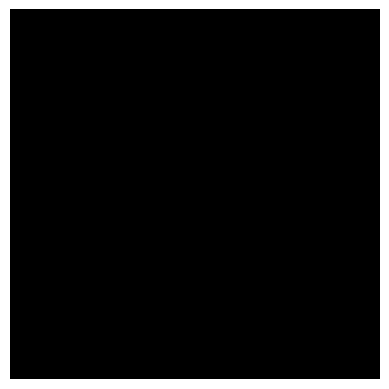

Processing Puzzle id:  253bf280
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 8, 3, 3, 3, 3, 3, 3, 3, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 8, 3, 3, 3, 3, 3, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 8, 3, 3, 3, 3, 3, 3, 3, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 8, 3, 3, 3, 3, 3, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0

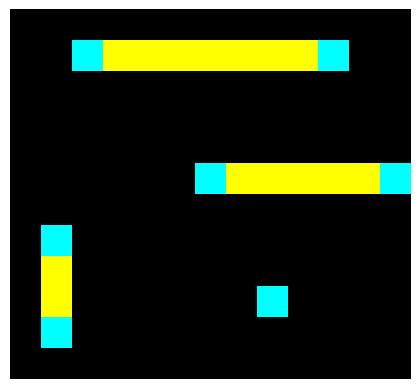

Processing Puzzle id:  25d487eb
extracting solution
[[[0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0], [0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0], [0, 4, 4, 4, 8, 4, 4, 4, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0,

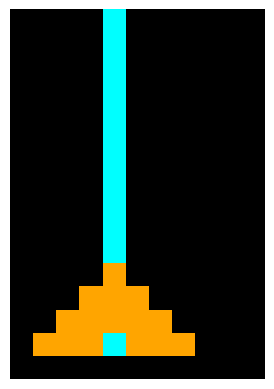

Processing Puzzle id:  25d8a9c8
extracting solution
[[[5, 5, 5], [0, 0, 0], [5, 5, 5]]]
creating Dataframe
creating destination path
[[5, 5, 5], [0, 0, 0], [5, 5, 5]]


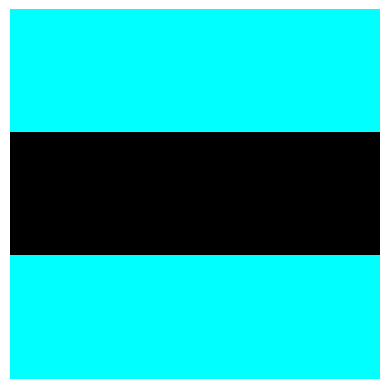

Processing Puzzle id:  25ff71a9
extracting solution
[[[0, 0, 0], [2, 0, 0], [2, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 1, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0], [2, 0, 0], [2, 0, 0]]
[[0, 0, 0], [0, 0, 0], [0, 1, 0]]


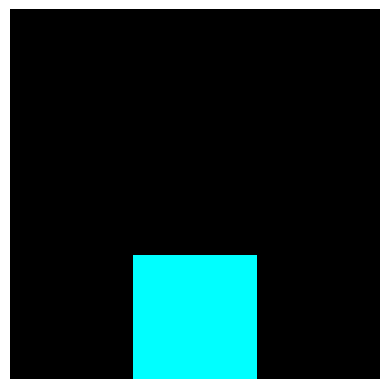

Processing Puzzle id:  264363fd
extracting solution
[[[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 8, 8, 8, 2, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 1, 1, 3, 3, 3, 1

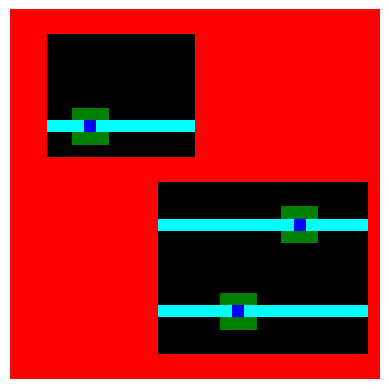

Processing Puzzle id:  272f95fa
extracting solution
[[[0, 0, 0, 8, 2, 2, 2, 2, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 2, 2, 2, 2, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 2, 2, 2, 2, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 2, 2, 2, 2, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 2, 2, 2, 2, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 2, 2, 2, 2, 8, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [4, 4, 4, 8, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3], [4, 4, 4, 8, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3], [4, 4, 4, 8, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3], [4, 4, 4, 8, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3], [4, 4, 4, 8, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3], [4, 4, 4, 8, 6, 6, 6, 6, 8, 3, 3, 3, 3, 3, 3], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 8, 1, 1, 1, 1, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 1, 1, 1, 1, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 1, 1, 1, 1, 8, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 8, 2, 2, 2, 2, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 2, 2, 2, 2, 8, 0, 0, 0, 0, 0, 0], [0, 0,

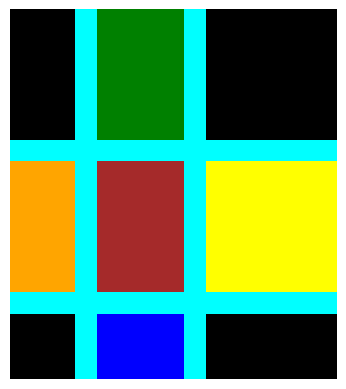

Processing Puzzle id:  27a28665
extracting solution
[[[6]], [[1]], [[2]]]
creating Dataframe
creating destination path
[[6]]
[[1]]
[[2]]


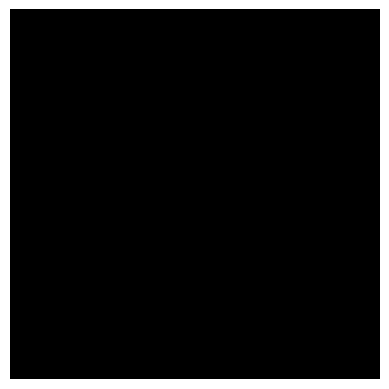

Processing Puzzle id:  28bf18c6
extracting solution
[[[0, 0, 3, 0, 0, 3], [3, 3, 3, 3, 3, 3], [3, 0, 0, 3, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 3, 0, 0, 3], [3, 3, 3, 3, 3, 3], [3, 0, 0, 3, 0, 0]]


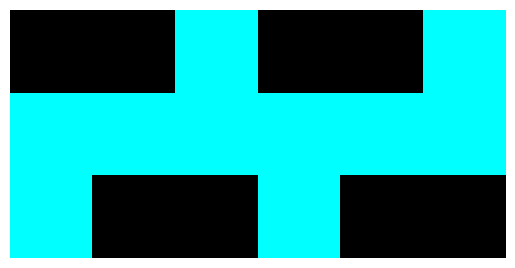

Processing Puzzle id:  28e73c20
extracting solution
[[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3], [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3], [3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3], [3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3], [3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3], [3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3], [3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3], [3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3], [3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3], [3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3], [3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3], [3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3], [3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3], [3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3], [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

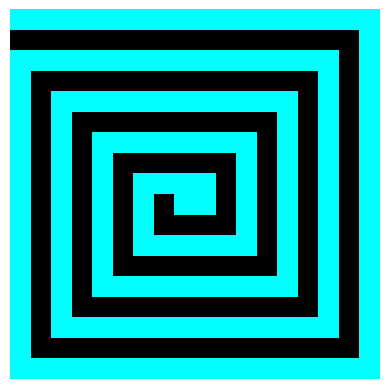

Processing Puzzle id:  29623171
extracting solution
[[[4, 4, 4, 5, 0, 0, 0, 5, 0, 0, 0], [4, 4, 4, 5, 0, 0, 0, 5, 0, 0, 0], [4, 4, 4, 5, 0, 0, 0, 5, 0, 0, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 4, 4, 4, 5, 0, 0, 0], [0, 0, 0, 5, 4, 4, 4, 5, 0, 0, 0], [0, 0, 0, 5, 4, 4, 4, 5, 0, 0, 0]]]
creating Dataframe
creating destination path
[[4, 4, 4, 5, 0, 0, 0, 5, 0, 0, 0], [4, 4, 4, 5, 0, 0, 0, 5, 0, 0, 0], [4, 4, 4, 5, 0, 0, 0, 5, 0, 0, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 4, 4, 4, 5, 0, 0, 0], [0, 0, 0, 5, 4, 4, 4, 5, 0, 0, 0], [0, 0, 0, 5, 4, 4, 4, 5, 0, 0, 0]]


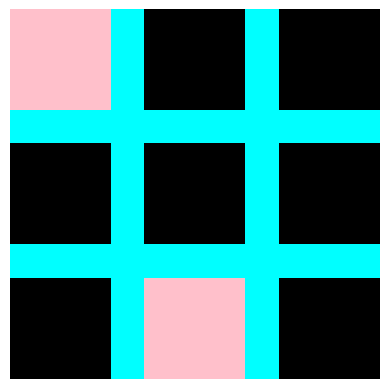

Processing Puzzle id:  29c11459
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 4, 4, 4, 5, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6, 6, 6, 6, 6, 5, 9, 9, 9, 9, 9]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 4, 4, 4, 5, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6, 6, 6, 6, 6, 5, 9, 9, 9, 9, 9]]


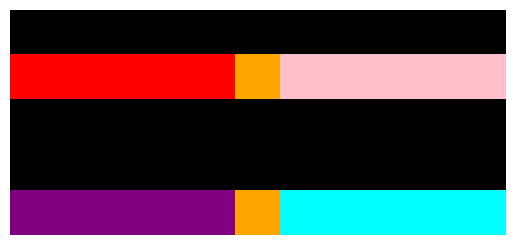

Processing Puzzle id:  29ec7d0e
extracting solution
[[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 3, 5, 7, 9, 2, 4, 6, 8, 1, 3, 5, 7, 9, 2, 4, 6, 8], [1, 4, 7, 1, 4, 7, 1, 4, 7, 1, 4, 7, 1, 4, 7, 1, 4, 7], [1, 5, 9, 4, 8, 3, 7, 2, 6, 1, 5, 9, 4, 8, 3, 7, 2, 6], [1, 6, 2, 7, 3, 8, 4, 9, 5, 1, 6, 2, 7, 3, 8, 4, 9, 5], [1, 7, 4, 1, 7, 4, 1, 7, 4, 1, 7, 4, 1, 7, 4, 1, 7, 4], [1, 8, 6, 4, 2, 9, 7, 5, 3, 1, 8, 6, 4, 2, 9, 7, 5, 3], [1, 9, 8, 7, 6, 5, 4, 3, 2, 1, 9, 8, 7, 6, 5, 4, 3, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 3, 5, 7, 9, 2, 4, 6, 8, 1, 3, 5, 7, 9, 2, 4, 6, 8], [1, 4, 7, 1, 4, 7, 1, 4, 7, 1, 4, 7, 1, 4, 7, 1, 4, 7], [1, 5, 9, 4, 8, 3, 7, 2, 6, 1, 5, 9, 4, 8, 3, 7, 2, 6], [1, 6, 2, 7, 3, 8, 4, 9, 5, 1, 6, 2, 7, 3, 8, 4, 9, 5], [1, 7, 4, 1, 7, 4, 1, 7, 4, 1, 7, 4, 1, 7, 4, 1, 7, 4], [1, 8, 6, 4, 2, 9, 7, 5, 3, 1, 8, 6, 4, 2, 9, 7, 5

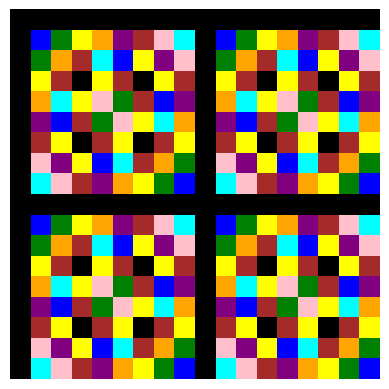

Processing Puzzle id:  2bcee788
extracting solution
[[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 1, 3, 3, 1, 3, 3], [3, 3, 3, 3, 1, 1, 1, 1, 3, 3], [3, 3, 3, 3, 3, 1, 1, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]]]
creating Dataframe
creating destination path
[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 1, 3, 3, 1, 3, 3], [3, 3, 3, 3, 1, 1, 1, 1, 3, 3], [3, 3, 3, 3, 3, 1, 1, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]]


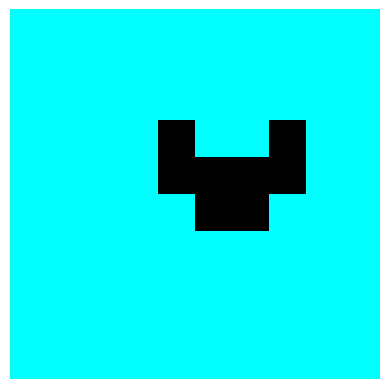

Processing Puzzle id:  2bee17df
extracting solution
[[[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 3, 0, 8, 8, 8, 3, 3, 8, 2, 2], [8, 8, 8, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 2], [8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2], [8, 8, 8, 0, 3, 0, 0, 0, 0, 3, 3, 0, 2, 2], [8, 8, 0, 0, 3, 0, 0, 0, 0, 3, 3, 2, 2, 2], [8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2], [8, 8, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 2], [8, 8, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 2], [8, 8, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 2], [8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2], [8, 8, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 2, 2], [8, 8, 0, 2, 3, 2, 2, 0, 0, 3, 3, 2, 2, 2], [8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]]
creating Dataframe
creating destination path
[[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 3, 0, 8, 8, 8, 3, 3, 8, 2, 2], [8, 8, 8, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 2], [8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2], [8, 8, 8, 0, 3, 0, 0, 0, 0, 3, 3, 0, 2, 2], [8, 8, 0, 0, 3, 0, 0, 0, 0, 3, 3, 2, 2, 2], [8, 3, 3, 3, 3, 3, 

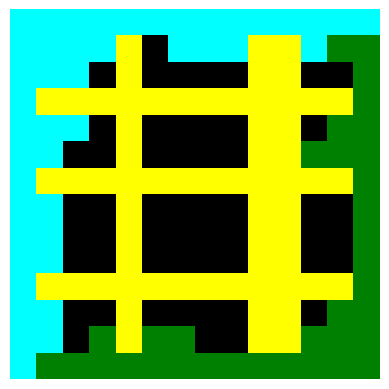

Processing Puzzle id:  2c608aff
extracting solution
[[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 2], [2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2], [2, 2, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

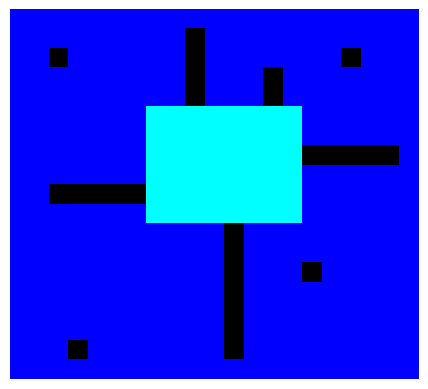

Processing Puzzle id:  2dc579da
extracting solution
[[[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 2, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]]
creating Dataframe
creating destination path
[[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 2, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]


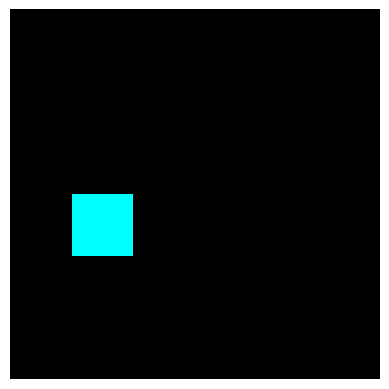

Processing Puzzle id:  2dd70a9a
extracting solution
[[[8, 8, 8, 8, 0, 0, 0, 0, 0, 8, 8, 0, 0], [8, 0, 0, 0, 0, 8, 2, 2, 3, 3, 0, 0, 0], [0, 8, 0, 0, 8, 8, 0, 0, 0, 3, 0, 0, 0], [0, 0, 8, 0, 0, 0, 0, 0, 8, 3, 0, 0, 8], [0, 0, 8, 0, 0, 0, 8, 0, 0, 3, 0, 0, 8], [0, 0, 0, 8, 0, 0, 0, 0, 8, 3, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 8, 0, 0], [8, 0, 8, 3, 3, 3, 3, 3, 3, 3, 8, 0, 0], [0, 8, 8, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0], [0, 8, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0]]]
creating Dataframe
creating destination path
[[8, 8, 8, 8, 0, 0, 0, 0, 0, 8, 8, 0, 0], [8, 0, 0, 0, 0, 8, 2, 2, 3, 3, 0, 0, 0], [0, 8, 0, 0, 8, 8, 0, 0, 0, 3, 0, 0, 0], [0, 0, 8, 0, 0, 0, 0, 0, 8, 3, 0, 0, 8], [0, 0, 8, 0, 0, 0, 8, 0, 0, 3, 0, 0, 8], [0, 0, 0, 8, 0, 0, 0, 0, 8, 3, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 8, 0, 0], [8, 0, 8, 3, 3, 3, 3, 3, 3, 3, 8, 0, 0], [0, 8, 8, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0

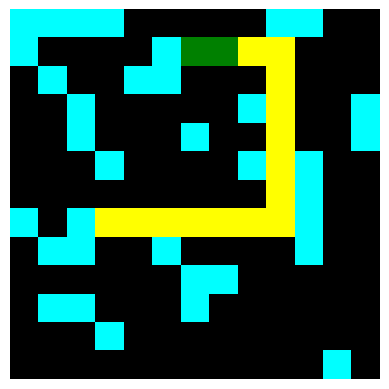

Processing Puzzle id:  2dee498d
extracting solution
[[[0, 2, 0, 4, 4], [2, 2, 0, 4, 4], [0, 2, 2, 2, 0], [1, 1, 0, 2, 2], [1, 1, 0, 2, 0]]]
creating Dataframe
creating destination path
[[0, 2, 0, 4, 4], [2, 2, 0, 4, 4], [0, 2, 2, 2, 0], [1, 1, 0, 2, 2], [1, 1, 0, 2, 0]]


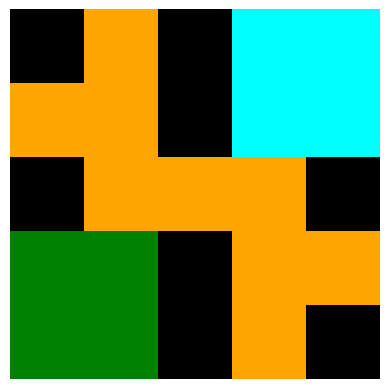

Processing Puzzle id:  31aa019c
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 2, 2, 0, 0, 0], [0, 0, 0, 0, 2, 9, 2, 0, 0, 0], [0, 0, 0, 0, 2, 2, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 2, 2, 0, 0, 0], [0, 0, 0, 0, 2, 9, 2, 0, 0, 0], [0, 0, 0, 0, 2, 2, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


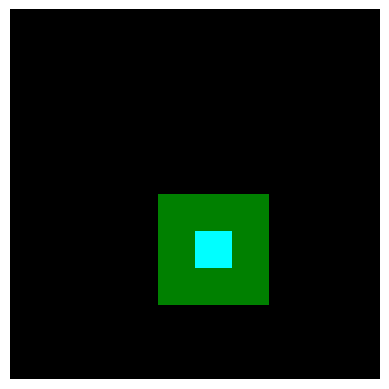

Processing Puzzle id:  321b1fc6
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 4, 0, 0, 0, 4, 4, 0, 0], [3, 4, 3, 3, 0, 3, 4, 3, 3, 0], [0, 0, 3, 0, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 4, 4, 0, 0], [0, 0, 0, 0, 0, 3, 4, 3, 3, 0], [0, 0, 0, 0, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 4, 0, 0, 0, 4, 4, 0, 0], [3, 4, 3, 3, 0, 3, 4, 3, 3, 0], [0, 0, 3, 0, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 4, 4, 0, 0], [0, 0, 0, 0, 0, 3, 4, 3, 3, 0], [0, 0, 0, 0, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


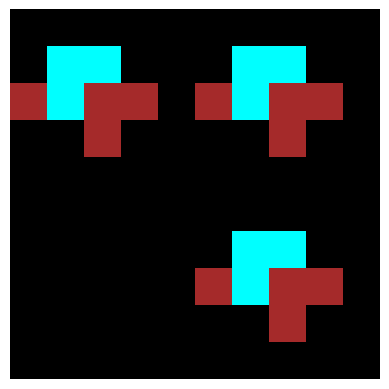

Processing Puzzle id:  32597951
extracting solution
[[[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 8, 3, 8, 8, 3, 8, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 1, 8, 8, 3, 8, 8, 3, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 3, 8, 8, 3, 8, 8, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 8, 3, 8, 8, 3, 8, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]]]
creating Dataframe
creating destination path

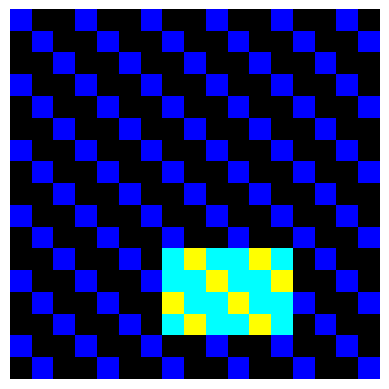

Processing Puzzle id:  3345333e
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 5, 0, 5, 5, 5, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 5, 0, 0], [0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0], [0, 0, 0, 0, 0, 0, 5, 5, 0, 5, 0, 5, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

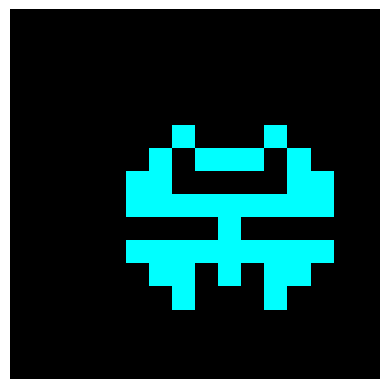

Processing Puzzle id:  3428a4f5
extracting solution
[[[3, 0, 3, 0, 3], [0, 0, 0, 3, 0], [0, 0, 0, 0, 3], [3, 0, 0, 3, 3], [3, 3, 0, 3, 0], [0, 3, 0, 0, 0]], [[0, 3, 3, 0, 3], [3, 3, 0, 3, 0], [0, 0, 3, 0, 0], [0, 0, 3, 3, 0], [3, 3, 0, 3, 3], [0, 3, 3, 0, 3]]]
creating Dataframe
creating destination path
[[3, 0, 3, 0, 3], [0, 0, 0, 3, 0], [0, 0, 0, 0, 3], [3, 0, 0, 3, 3], [3, 3, 0, 3, 0], [0, 3, 0, 0, 0]]
[[0, 3, 3, 0, 3], [3, 3, 0, 3, 0], [0, 0, 3, 0, 0], [0, 0, 3, 3, 0], [3, 3, 0, 3, 3], [0, 3, 3, 0, 3]]


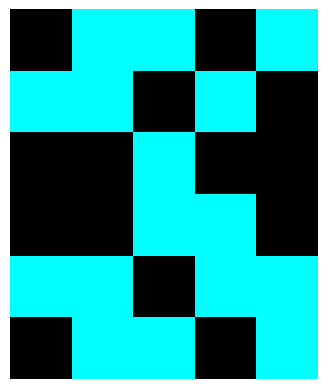

Processing Puzzle id:  3618c87e
extracting solution
[[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 5, 0, 5], [5, 5, 1, 5, 1]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 5, 0, 5], [5, 5, 1, 5, 1]]


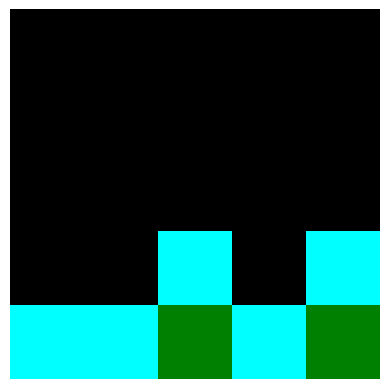

Processing Puzzle id:  3631a71a
extracting solution
[[[8, 0, 7, 0, 7, 7, 1, 1, 0, 3, 0, 6, 0, 8, 0, 0, 0, 0, 8, 0, 6, 0, 3, 0, 1, 1, 7, 7, 0, 7], [0, 8, 0, 0, 7, 7, 1, 1, 3, 3, 6, 6, 8, 8, 0, 0, 0, 0, 8, 8, 6, 6, 3, 3, 1, 1, 7, 7, 0, 0], [7, 0, 2, 0, 1, 1, 0, 8, 0, 6, 7, 7, 0, 0, 0, 6, 6, 0, 0, 0, 7, 7, 6, 0, 8, 0, 1, 1, 0, 2], [0, 0, 0, 0, 1, 1, 8, 0, 6, 6, 7, 7, 0, 0, 6, 0, 0, 6, 0, 0, 7, 7, 6, 6, 0, 8, 1, 1, 0, 0], [7, 7, 1, 1, 0, 0, 0, 6, 0, 8, 0, 0, 6, 6, 0, 0, 0, 0, 6, 6, 0, 0, 8, 0, 6, 0, 0, 0, 1, 1], [7, 7, 1, 1, 0, 5, 6, 6, 8, 8, 0, 0, 6, 6, 0, 0, 0, 0, 6, 6, 0, 0, 8, 8, 6, 6, 5, 0, 1, 1], [1, 1, 0, 8, 0, 6, 2, 0, 0, 0, 0, 6, 0, 0, 5, 5, 5, 5, 0, 0, 6, 0, 0, 0, 0, 2, 6, 0, 8, 0], [1, 1, 8, 0, 6, 6, 0, 2, 0, 0, 6, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 6, 0, 0, 2, 0, 6, 6, 0, 8], [0, 3, 0, 6, 0, 8, 0, 0, 0, 0, 0, 0, 6, 0, 3, 0, 0, 3, 0, 6, 0, 0, 0, 0, 0, 0, 8, 0, 6, 0], [3, 3, 6, 6, 8, 8, 0, 0, 0, 6, 0, 5, 0, 0, 0, 3, 3, 0, 0, 0, 5, 0, 6, 0, 0, 0, 8, 8, 6, 6], [0, 6, 7, 7, 0, 0, 0, 6, 0

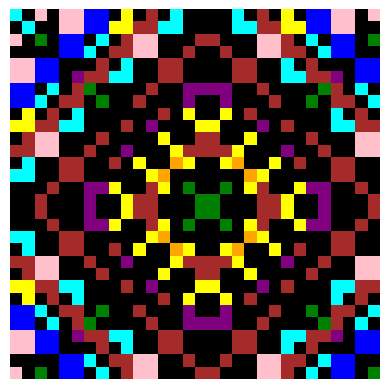

Processing Puzzle id:  363442ee
extracting solution
[[[3, 3, 9, 5, 0, 0, 0, 3, 3, 9, 3, 3, 9], [8, 4, 4, 5, 0, 0, 0, 8, 4, 4, 8, 4, 4], [8, 9, 8, 5, 0, 0, 0, 8, 9, 8, 8, 9, 8], [0, 0, 0, 5, 3, 3, 9, 0, 0, 0, 3, 3, 9], [0, 0, 0, 5, 8, 4, 4, 0, 0, 0, 8, 4, 4], [0, 0, 0, 5, 8, 9, 8, 0, 0, 0, 8, 9, 8], [0, 0, 0, 5, 3, 3, 9, 3, 3, 9, 0, 0, 0], [0, 0, 0, 5, 8, 4, 4, 8, 4, 4, 0, 0, 0], [0, 0, 0, 5, 8, 9, 8, 8, 9, 8, 0, 0, 0]]]
creating Dataframe
creating destination path
[[3, 3, 9, 5, 0, 0, 0, 3, 3, 9, 3, 3, 9], [8, 4, 4, 5, 0, 0, 0, 8, 4, 4, 8, 4, 4], [8, 9, 8, 5, 0, 0, 0, 8, 9, 8, 8, 9, 8], [0, 0, 0, 5, 3, 3, 9, 0, 0, 0, 3, 3, 9], [0, 0, 0, 5, 8, 4, 4, 0, 0, 0, 8, 4, 4], [0, 0, 0, 5, 8, 9, 8, 0, 0, 0, 8, 9, 8], [0, 0, 0, 5, 3, 3, 9, 3, 3, 9, 0, 0, 0], [0, 0, 0, 5, 8, 4, 4, 8, 4, 4, 0, 0, 0], [0, 0, 0, 5, 8, 9, 8, 8, 9, 8, 0, 0, 0]]


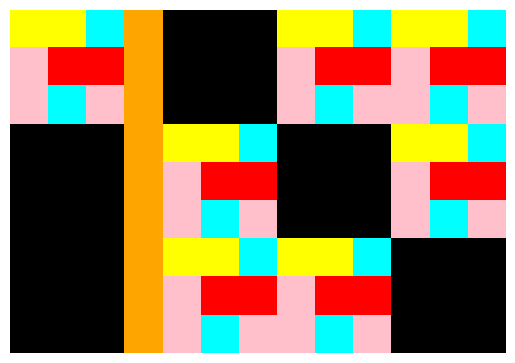

Processing Puzzle id:  36d67576
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 4, 4, 2, 0, 0, 0, 0, 0, 0, 4, 4, 1, 0], [0, 0, 4, 0, 4, 3, 0, 0, 0, 0, 4, 0, 4, 3, 0], [0, 0, 0, 4, 4, 1, 0, 0, 0, 0, 4, 4, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0], [1, 4, 4, 0, 0, 0, 0, 0, 2, 4, 4, 0, 0, 0, 0], [3, 4, 0, 4, 0, 0, 0, 3, 4, 0, 4, 0, 0, 0, 0], [0, 2, 4, 4, 0, 0, 0, 1, 4, 4, 0, 0, 0, 0, 0], [0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 4, 4, 2, 0, 0, 0, 0, 0, 0, 4, 4, 1, 0], [0, 0, 4, 0, 4, 3, 0, 0, 0, 0, 4, 0, 4, 3, 0], [0, 0,

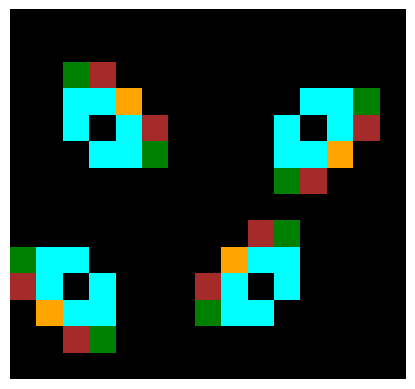

Processing Puzzle id:  36fdfd69
extracting solution
[[[0, 0, 0, 9, 9, 9, 0, 0, 9, 9, 0, 0, 0, 0, 0, 0, 9, 0], [9, 2, 4, 2, 2, 4, 0, 0, 0, 9, 0, 0, 9, 0, 0, 0, 0, 0], [0, 2, 2, 4, 4, 2, 0, 0, 9, 9, 9, 0, 0, 9, 0, 0, 9, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 0, 9, 0], [0, 9, 9, 0, 0, 0, 9, 0, 9, 9, 0, 9, 0, 0, 9, 9, 9, 9], [9, 9, 9, 9, 0, 9, 2, 4, 2, 2, 9, 0, 0, 9, 0, 0, 0, 0], [0, 0, 0, 0, 0, 9, 2, 2, 2, 2, 9, 0, 9, 9, 0, 0, 0, 0], [9, 0, 9, 9, 0, 9, 0, 0, 9, 0, 9, 9, 0, 9, 9, 9, 0, 9], [0, 0, 0, 9, 0, 0, 0, 9, 9, 9, 9, 9, 0, 9, 0, 0, 0, 0], [9, 9, 0, 9, 0, 9, 0, 9, 9, 0, 0, 9, 9, 0, 0, 0, 0, 9], [0, 9, 9, 0, 9, 0, 4, 2, 9, 0, 0, 9, 0, 0, 9, 9, 9, 9], [0, 9, 9, 0, 0, 9, 2, 4, 9, 9, 0, 0, 0, 9, 9, 9, 0, 9], [9, 0, 9, 9, 0, 9, 9, 9, 0, 0, 9, 0, 0, 0, 9, 9, 9, 0], [9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 9, 2, 2, 4, 2, 2, 4, 0], [0, 9, 9, 9, 9, 9, 9, 0, 9, 0, 0, 2, 4, 2, 4, 4, 2, 9], [0, 9, 0, 9, 0, 0, 9, 9, 0, 9, 0, 2, 2, 4, 2, 2, 4, 0], [9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 9, 9, 9

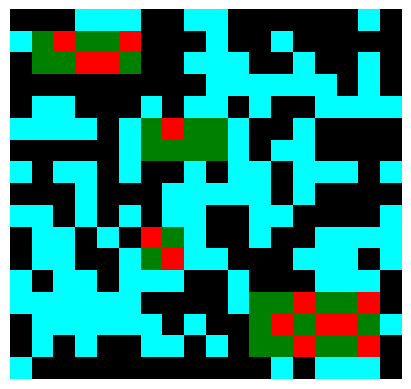

Processing Puzzle id:  3906de3d
extracting solution
[[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 1, 1, 1, 1, 1, 2, 1], [0, 1, 2, 1, 2, 1, 2, 1, 2, 1], [0, 1, 2, 1, 2, 2, 0, 1, 2, 1], [0, 0, 0, 1, 0, 2, 0, 0, 2, 1], [0, 0, 0, 0, 0, 2, 0, 0, 2, 0], [0, 0, 0, 0, 0, 2, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 1, 1, 1, 1, 1, 2, 1], [0, 1, 2, 1, 2, 1, 2, 1, 2, 1], [0, 1, 2, 1, 2, 2, 0, 1, 2, 1], [0, 0, 0, 1, 0, 2, 0, 0, 2, 1], [0, 0, 0, 0, 0, 2, 0, 0, 2, 0], [0, 0, 0, 0, 0, 2, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


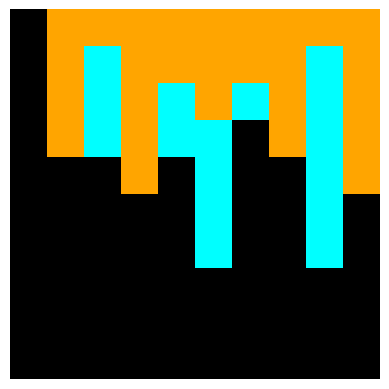

Processing Puzzle id:  39a8645d
extracting solution
[[[0, 2, 0], [2, 2, 2], [2, 2, 0]]]
creating Dataframe
creating destination path
[[0, 2, 0], [2, 2, 2], [2, 2, 0]]


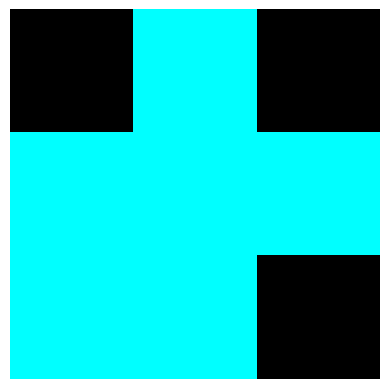

Processing Puzzle id:  39e1d7f9
extracting solution
[[[0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 8, 8, 4, 3, 3, 4, 8, 8, 4, 0, 0], [0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 8, 8, 4, 3, 3, 4, 8, 8, 4, 0, 0], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 3, 3, 4, 6, 6, 4, 3, 3, 4, 0, 0], [0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 3, 3, 4, 6, 6, 4, 3, 3, 4, 0, 0], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 0, 4, 0, 0, 4, 8, 8, 4, 3, 3, 4, 8, 8, 4, 0, 0, 4, 8, 8, 4, 3, 3, 4, 8, 8, 4, 0, 0], [0, 0, 4, 0, 0, 4, 8, 8, 4, 3, 3, 4, 8, 8, 4, 0, 0, 4, 8, 8, 4, 3, 3, 4, 8, 8, 4, 0, 0], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 0, 4, 0, 0, 4, 3, 3, 4, 6, 6, 4, 3, 3, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0], [0, 0, 4, 0, 0, 4, 3, 3, 4, 6, 6, 4, 3, 3, 4, 0, 0, 4, 0

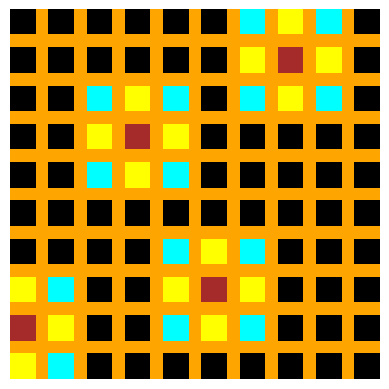

Processing Puzzle id:  3aa6fb7a
extracting solution
[[[0, 0, 0, 0, 0, 8, 8], [8, 8, 0, 0, 0, 1, 8], [8, 1, 0, 0, 0, 0, 0], [0, 0, 0, 8, 1, 0, 0], [0, 0, 0, 8, 8, 0, 0], [1, 8, 0, 0, 0, 0, 0], [8, 8, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 8, 8], [8, 8, 0, 0, 0, 1, 8], [8, 1, 0, 0, 0, 0, 0], [0, 0, 0, 8, 1, 0, 0], [0, 0, 0, 8, 8, 0, 0], [1, 8, 0, 0, 0, 0, 0], [8, 8, 0, 0, 0, 0, 0]]


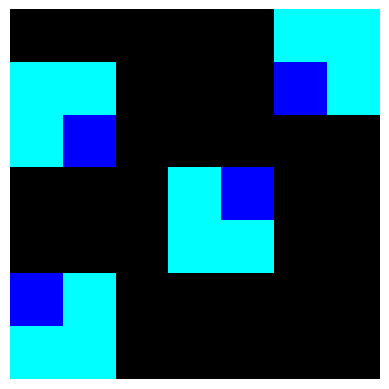

Processing Puzzle id:  3ac3eb23
extracting solution
[[[0, 0, 3, 0, 0, 0, 6, 0, 0, 7, 0, 0], [0, 3, 0, 3, 0, 6, 0, 6, 7, 0, 7, 0], [0, 0, 3, 0, 0, 0, 6, 0, 0, 7, 0, 0], [0, 3, 0, 3, 0, 6, 0, 6, 7, 0, 7, 0], [0, 0, 3, 0, 0, 0, 6, 0, 0, 7, 0, 0], [0, 3, 0, 3, 0, 6, 0, 6, 7, 0, 7, 0]]]
creating Dataframe
creating destination path
[[0, 0, 3, 0, 0, 0, 6, 0, 0, 7, 0, 0], [0, 3, 0, 3, 0, 6, 0, 6, 7, 0, 7, 0], [0, 0, 3, 0, 0, 0, 6, 0, 0, 7, 0, 0], [0, 3, 0, 3, 0, 6, 0, 6, 7, 0, 7, 0], [0, 0, 3, 0, 0, 0, 6, 0, 0, 7, 0, 0], [0, 3, 0, 3, 0, 6, 0, 6, 7, 0, 7, 0]]


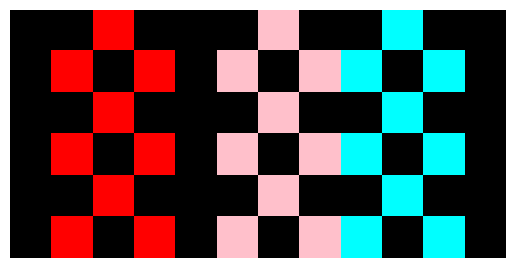

Processing Puzzle id:  3af2c5a8
extracting solution
[[[4, 0, 0, 0, 0, 0, 0, 4], [0, 0, 0, 4, 4, 0, 0, 0], [4, 4, 0, 0, 0, 0, 4, 4], [4, 4, 0, 0, 0, 0, 4, 4], [0, 0, 0, 4, 4, 0, 0, 0], [4, 0, 0, 0, 0, 0, 0, 4]]]
creating Dataframe
creating destination path
[[4, 0, 0, 0, 0, 0, 0, 4], [0, 0, 0, 4, 4, 0, 0, 0], [4, 4, 0, 0, 0, 0, 4, 4], [4, 4, 0, 0, 0, 0, 4, 4], [0, 0, 0, 4, 4, 0, 0, 0], [4, 0, 0, 0, 0, 0, 0, 4]]


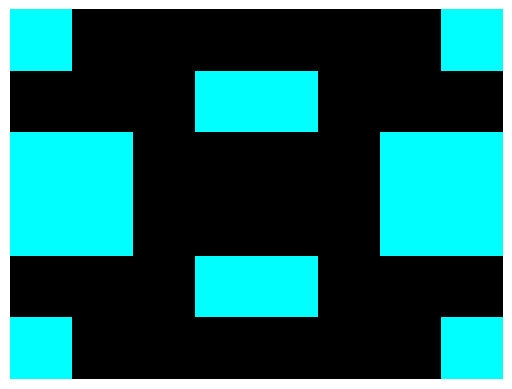

Processing Puzzle id:  3bd67248
extracting solution
[[[3, 0, 0, 0, 0, 0, 0, 0, 0, 2], [3, 0, 0, 0, 0, 0, 0, 0, 2, 0], [3, 0, 0, 0, 0, 0, 0, 2, 0, 0], [3, 0, 0, 0, 0, 0, 2, 0, 0, 0], [3, 0, 0, 0, 0, 2, 0, 0, 0, 0], [3, 0, 0, 0, 2, 0, 0, 0, 0, 0], [3, 0, 0, 2, 0, 0, 0, 0, 0, 0], [3, 0, 2, 0, 0, 0, 0, 0, 0, 0], [3, 2, 0, 0, 0, 0, 0, 0, 0, 0], [3, 4, 4, 4, 4, 4, 4, 4, 4, 4]]]
creating Dataframe
creating destination path
[[3, 0, 0, 0, 0, 0, 0, 0, 0, 2], [3, 0, 0, 0, 0, 0, 0, 0, 2, 0], [3, 0, 0, 0, 0, 0, 0, 2, 0, 0], [3, 0, 0, 0, 0, 0, 2, 0, 0, 0], [3, 0, 0, 0, 0, 2, 0, 0, 0, 0], [3, 0, 0, 0, 2, 0, 0, 0, 0, 0], [3, 0, 0, 2, 0, 0, 0, 0, 0, 0], [3, 0, 2, 0, 0, 0, 0, 0, 0, 0], [3, 2, 0, 0, 0, 0, 0, 0, 0, 0], [3, 4, 4, 4, 4, 4, 4, 4, 4, 4]]


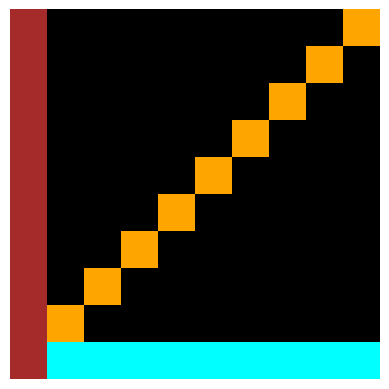

Processing Puzzle id:  3bdb4ada
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0], [0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0], [0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 8, 0, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 5, 5, 0, 

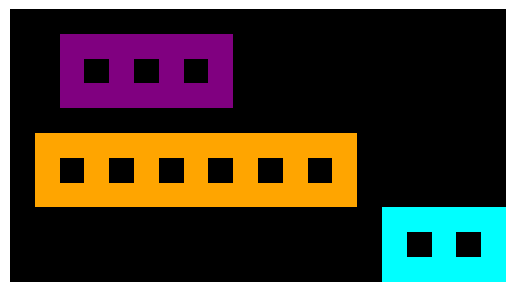

Processing Puzzle id:  3befdf3e
extracting solution
[[[0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0], [8, 3, 3, 3, 8, 0, 0, 0, 0, 0, 0, 0], [8, 3, 8, 3, 8, 0, 0, 0, 0, 0, 0, 0], [8, 3, 3, 3, 8, 0, 0, 0, 0, 0, 0, 0], [0, 8, 8, 8, 0, 0, 8, 8, 8, 8, 0, 0], [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0], [0, 0, 0, 0, 8, 8, 3, 3, 3, 3, 8, 8], [0, 0, 0, 0, 8, 8, 3, 8, 8, 3, 8, 8], [0, 0, 0, 0, 8, 8, 3, 8, 8, 3, 8, 8], [0, 0, 0, 0, 8, 8, 3, 3, 3, 3, 8, 8], [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0], [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0]]]
creating Dataframe
creating destination path
[[0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0], [8, 3, 3, 3, 8, 0, 0, 0, 0, 0, 0, 0], [8, 3, 8, 3, 8, 0, 0, 0, 0, 0, 0, 0], [8, 3, 3, 3, 8, 0, 0, 0, 0, 0, 0, 0], [0, 8, 8, 8, 0, 0, 8, 8, 8, 8, 0, 0], [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0], [0, 0, 0, 0, 8, 8, 3, 3, 3, 3, 8, 8], [0, 0, 0, 0, 8, 8, 3, 8, 8, 3, 8, 8], [0, 0, 0, 0, 8, 8, 3, 8, 8, 3, 8, 8], [0, 0, 0, 0, 8, 8, 3, 3, 3, 3, 8, 8], [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0], [0, 0, 0, 0, 0, 0, 8, 8, 

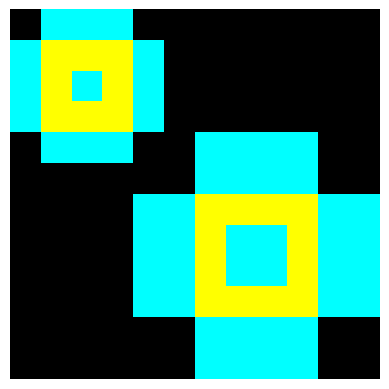

Processing Puzzle id:  3c9b0459
extracting solution
[[[7, 6, 4], [4, 6, 6], [4, 4, 6]]]
creating Dataframe
creating destination path
[[7, 6, 4], [4, 6, 6], [4, 4, 6]]


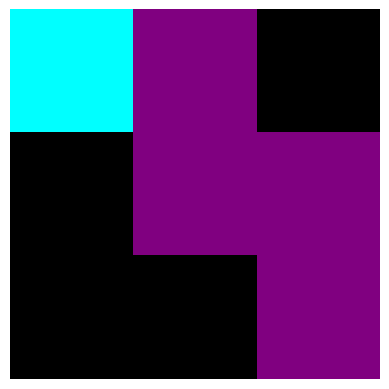

Processing Puzzle id:  3de23699
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0, 2, 2, 0, 0], [0, 2, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 2, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 2, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 2, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0, 2, 2, 0, 0], [0, 2, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 2, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 2, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 2, 0, 0, 0, 0]]


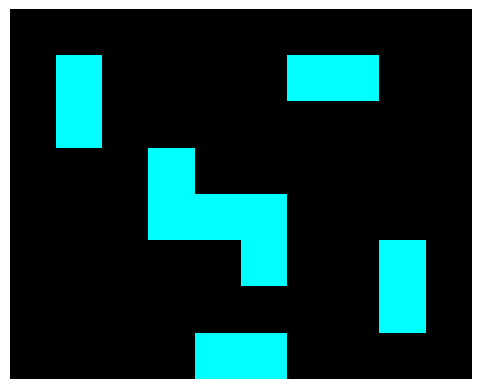

Processing Puzzle id:  3e980e27
extracting solution
[[[0, 0, 0, 0, 8, 8, 8, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 3, 8, 0, 0, 2, 1, 0, 0], [0, 1, 2, 0, 0, 8, 0, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 1, 0, 8, 8, 8, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 3, 8, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 8, 8, 8, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 3, 8, 0, 0, 2, 1, 0, 0], [0, 1, 2, 0, 0, 8, 0, 0, 0, 1, 1, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

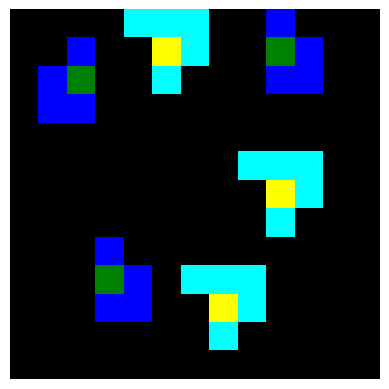

Processing Puzzle id:  3eda0437
extracting solution
[[[0, 6, 6, 6, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0], [1, 6, 6, 6, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], [0, 6, 6, 6, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1], [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1]]]
creating Dataframe
creating destination path
[[0, 6, 6, 6, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0], [1, 6, 6, 6, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], [0, 6, 6, 6, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1], [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1]]


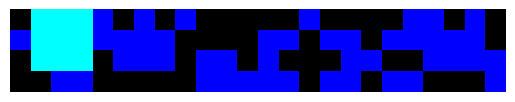

Processing Puzzle id:  3f7978a0
extracting solution
[[[8, 0, 0, 8], [5, 8, 0, 5], [5, 0, 0, 5], [5, 0, 0, 5], [5, 0, 0, 5], [5, 0, 8, 5], [5, 0, 0, 5], [5, 8, 0, 5], [5, 0, 0, 5], [8, 0, 0, 8]]]
creating Dataframe
creating destination path
[[8, 0, 0, 8], [5, 8, 0, 5], [5, 0, 0, 5], [5, 0, 0, 5], [5, 0, 0, 5], [5, 0, 8, 5], [5, 0, 0, 5], [5, 8, 0, 5], [5, 0, 0, 5], [8, 0, 0, 8]]


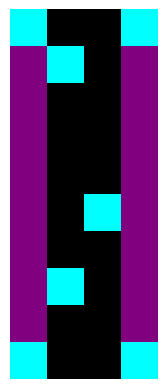

Processing Puzzle id:  40853293
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 3, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 7, 7, 5, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 

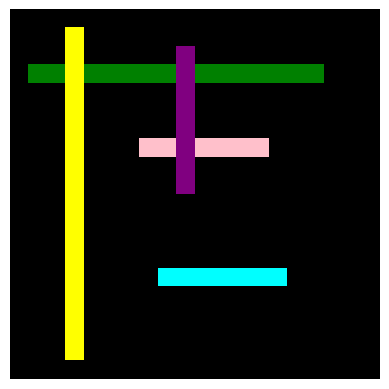

Processing Puzzle id:  4093f84a
extracting solution
[[[0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 

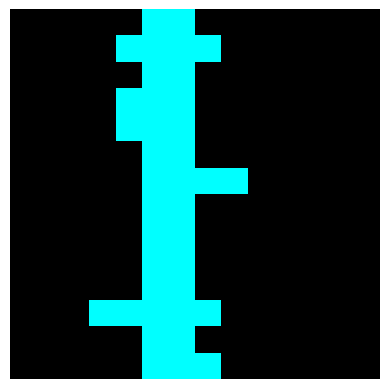

Processing Puzzle id:  41e4d17e
extracting solution
[[[8, 8, 8, 8, 8, 6, 8, 8, 6, 8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 6, 1, 1, 1, 1, 1, 8, 8, 8, 8], [8, 8, 8, 8, 8, 6, 1, 8, 6, 8, 1, 8, 8, 8, 8], [6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 1, 6, 6, 6, 6], [8, 8, 8, 8, 8, 6, 1, 8, 6, 8, 1, 8, 8, 8, 8], [8, 8, 8, 8, 8, 6, 1, 1, 1, 1, 1, 8, 8, 8, 8], [8, 8, 8, 8, 8, 6, 8, 8, 6, 8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 6, 8, 8, 6, 8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 6, 8, 8, 6, 8, 8, 8, 8, 8, 8], [8, 8, 8, 1, 1, 1, 1, 1, 6, 8, 8, 8, 8, 8, 8], [8, 8, 8, 1, 8, 6, 8, 1, 6, 8, 8, 8, 8, 8, 8], [6, 6, 6, 1, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6], [8, 8, 8, 1, 8, 6, 8, 1, 6, 8, 8, 8, 8, 8, 8], [8, 8, 8, 1, 1, 1, 1, 1, 6, 8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 6, 8, 8, 6, 8, 8, 8, 8, 8, 8]]]
creating Dataframe
creating destination path
[[8, 8, 8, 8, 8, 6, 8, 8, 6, 8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 6, 1, 1, 1, 1, 1, 8, 8, 8, 8], [8, 8, 8, 8, 8, 6, 1, 8, 6, 8, 1, 8, 8, 8, 8], [6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 1, 6, 6, 6, 6], [8, 8,

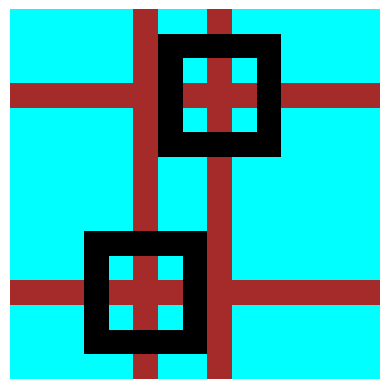

Processing Puzzle id:  4258a5f9
extracting solution
[[[1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 5, 1, 0, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, 1, 5, 1], [0, 0, 1, 1, 1, 0, 1, 1, 1], [0, 0, 1, 5, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 0, 1, 1, 1, 0, 0], [1, 5, 1, 0, 1, 5, 1, 0, 0], [1, 1, 1, 0, 1, 1, 1, 0, 0]]]
creating Dataframe
creating destination path
[[1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 5, 1, 0, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, 1, 5, 1], [0, 0, 1, 1, 1, 0, 1, 1, 1], [0, 0, 1, 5, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 0, 1, 1, 1, 0, 0], [1, 5, 1, 0, 1, 5, 1, 0, 0], [1, 1, 1, 0, 1, 1, 1, 0, 0]]


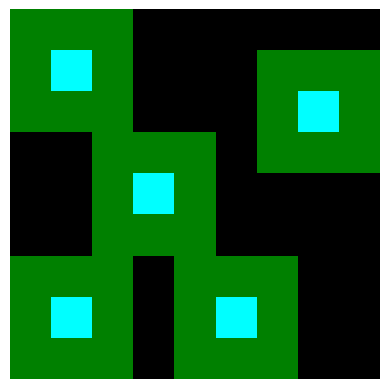

Processing Puzzle id:  4290ef0e
extracting solution
[[[4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4], [4, 2, 2, 2, 1, 1, 1, 2, 2, 2, 4], [4, 2, 6, 6, 1, 1, 1, 6, 6, 2, 4], [4, 2, 6, 3, 3, 1, 3, 3, 6, 2, 4], [4, 1, 1, 3, 8, 8, 8, 3, 1, 1, 4], [1, 1, 1, 1, 8, 1, 8, 1, 1, 1, 1], [4, 1, 1, 3, 8, 8, 8, 3, 1, 1, 4], [4, 2, 6, 3, 3, 1, 3, 3, 6, 2, 4], [4, 2, 6, 6, 1, 1, 1, 6, 6, 2, 4], [4, 2, 2, 2, 1, 1, 1, 2, 2, 2, 4], [4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4]]]
creating Dataframe
creating destination path
[[4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4], [4, 2, 2, 2, 1, 1, 1, 2, 2, 2, 4], [4, 2, 6, 6, 1, 1, 1, 6, 6, 2, 4], [4, 2, 6, 3, 3, 1, 3, 3, 6, 2, 4], [4, 1, 1, 3, 8, 8, 8, 3, 1, 1, 4], [1, 1, 1, 1, 8, 1, 8, 1, 1, 1, 1], [4, 1, 1, 3, 8, 8, 8, 3, 1, 1, 4], [4, 2, 6, 3, 3, 1, 3, 3, 6, 2, 4], [4, 2, 6, 6, 1, 1, 1, 6, 6, 2, 4], [4, 2, 2, 2, 1, 1, 1, 2, 2, 2, 4], [4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4]]


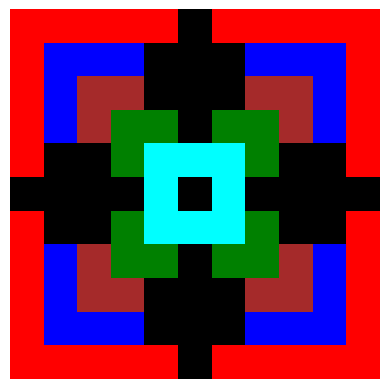

Processing Puzzle id:  42a50994
extracting solution
[[[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3], [3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3], [3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0], [3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0], [3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0], [3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3]]]
creating Dataframe
creating destination path
[[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3], [3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3], [3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 

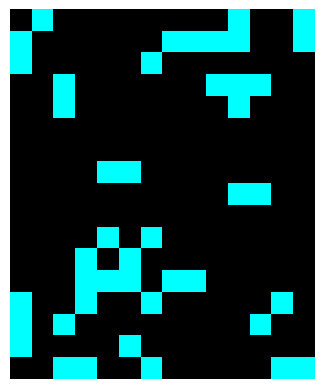

Processing Puzzle id:  4347f46a
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0], [0, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], [0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0

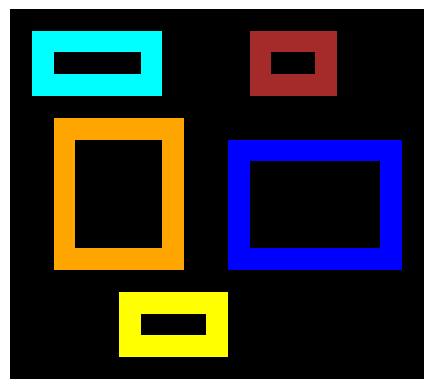

Processing Puzzle id:  444801d8
extracting solution
[[[4, 4, 4, 4, 4, 0, 0, 0, 0, 0], [1, 1, 4, 1, 1, 0, 0, 0, 0, 0], [1, 4, 4, 4, 1, 0, 0, 0, 0, 0], [1, 4, 4, 4, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 7, 7, 7, 7, 7, 0], [0, 0, 0, 0, 1, 1, 7, 1, 1, 0], [0, 0, 0, 0, 1, 7, 7, 7, 1, 0], [0, 0, 0, 0, 1, 7, 7, 7, 1, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 0]]]
creating Dataframe
creating destination path
[[4, 4, 4, 4, 4, 0, 0, 0, 0, 0], [1, 1, 4, 1, 1, 0, 0, 0, 0, 0], [1, 4, 4, 4, 1, 0, 0, 0, 0, 0], [1, 4, 4, 4, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 7, 7, 7, 7, 7, 0], [0, 0, 0, 0, 1, 1, 7, 1, 1, 0], [0, 0, 0, 0, 1, 7, 7, 7, 1, 0], [0, 0, 0, 0, 1, 7, 7, 7, 1, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 0]]


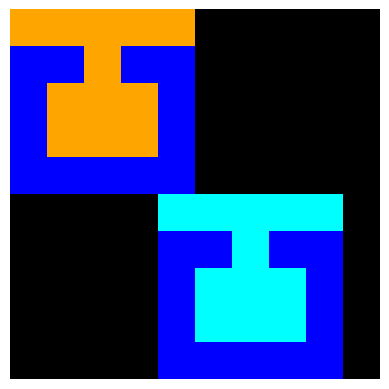

Processing Puzzle id:  445eab21
extracting solution
[[[3, 3], [3, 3]]]
creating Dataframe
creating destination path
[[3, 3], [3, 3]]


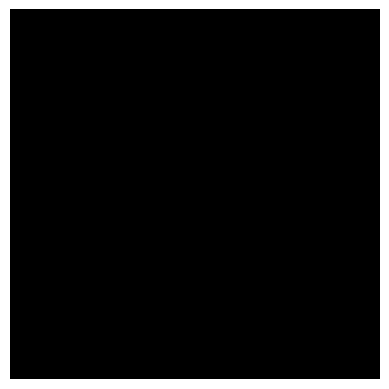

Processing Puzzle id:  447fd412
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0], [0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

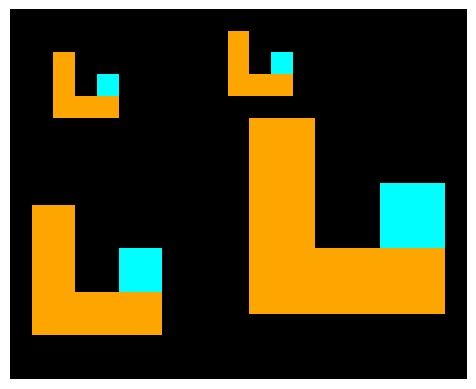

Processing Puzzle id:  44d8ac46
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5, 5, 5, 5, 5, 0, 0, 5, 5, 5, 5, 0], [5, 2, 2, 2, 5, 0, 0, 5, 5, 0, 5, 0], [5, 2, 2, 2, 5, 0, 0, 5, 0, 0, 5, 0], [5, 2, 2, 2, 5, 0, 0, 5, 0, 0, 5, 0], [5, 5, 5, 5, 5, 0, 0, 5, 5, 5, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5, 5, 5, 5, 5, 0, 0, 5, 5, 5, 5, 0], [5, 2, 2, 2, 5, 0, 0, 5, 5, 0, 5, 0], [5, 2, 2, 2, 5, 0, 0, 5, 0, 0, 5, 0], [5, 2, 2, 2, 5, 0, 0, 5, 0, 0, 5, 0], [5, 5, 5, 5, 5, 0, 0, 5, 5, 5, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 5, 

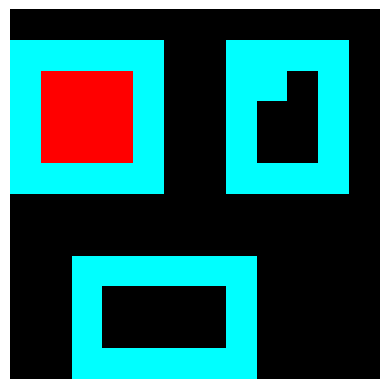

Processing Puzzle id:  44f52bb0
extracting solution
[[[1]], [[7]]]
creating Dataframe
creating destination path
[[1]]
[[7]]


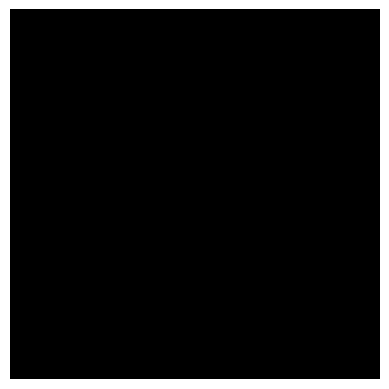

Processing Puzzle id:  4522001f
extracting solution
[[[0, 0, 0, 0, 0, 3, 3, 3, 3], [0, 0, 0, 0, 0, 3, 3, 3, 3], [0, 0, 0, 0, 0, 3, 3, 3, 3], [0, 0, 0, 0, 0, 3, 3, 3, 3], [0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 3, 3, 3, 3], [0, 0, 0, 0, 0, 3, 3, 3, 3], [0, 0, 0, 0, 0, 3, 3, 3, 3], [0, 0, 0, 0, 0, 3, 3, 3, 3], [0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


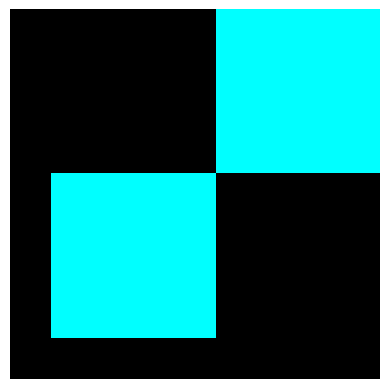

Processing Puzzle id:  4612dd53
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0

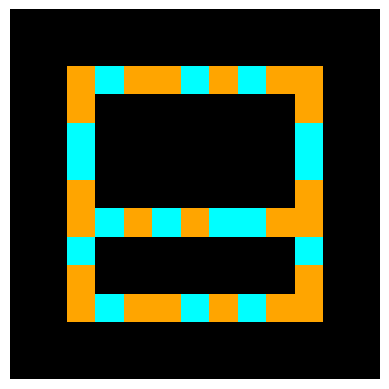

Processing Puzzle id:  46442a0e
extracting solution
[[[1, 4, 1, 9, 4, 1], [4, 9, 4, 1, 9, 4], [9, 1, 9, 9, 4, 1], [1, 4, 9, 9, 1, 9], [4, 9, 1, 4, 9, 4], [1, 4, 9, 1, 4, 1]]]
creating Dataframe
creating destination path
[[1, 4, 1, 9, 4, 1], [4, 9, 4, 1, 9, 4], [9, 1, 9, 9, 4, 1], [1, 4, 9, 9, 1, 9], [4, 9, 1, 4, 9, 4], [1, 4, 9, 1, 4, 1]]


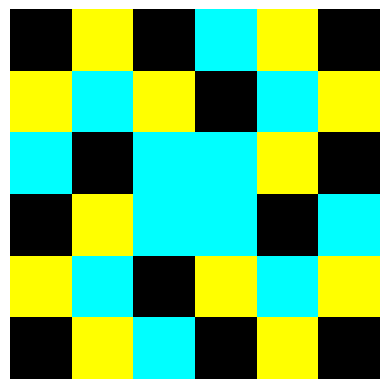

Processing Puzzle id:  469497ad
extracting solution
[[[0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 2, 0, 0, 0, 0, 

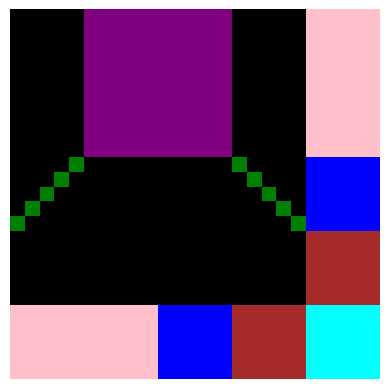

Processing Puzzle id:  46f33fce
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0], [0, 0, 0, 0, 3, 

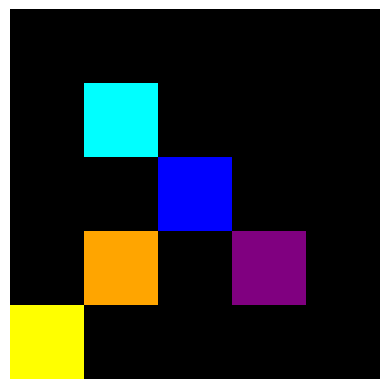

Processing Puzzle id:  47c1f68c
extracting solution
[[[0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0], [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0], [3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3], [0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0], [0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0], [3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3], [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0], [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0], [3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3], [0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0], [0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0], [0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0], [3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3], [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0], [0, 0, 3, 0, 0, 0, 0, 0, 

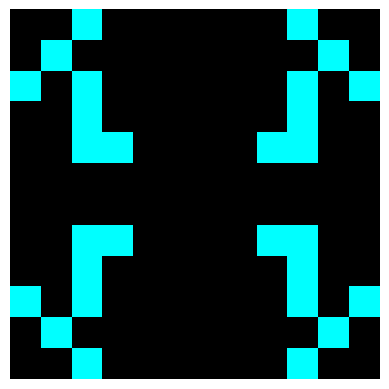

Processing Puzzle id:  484b58aa
extracting solution
[[[8, 1, 2, 6, 1, 2, 2, 1, 2, 3, 1, 2, 5, 1, 2, 9, 1, 2, 8, 1, 2, 6, 1, 2, 2, 1, 2, 3, 1], [1, 8, 2, 1, 5, 9, 1, 2, 2, 1, 8, 9, 1, 5, 2, 1, 2, 9, 1, 8, 2, 1, 5, 9, 1, 2, 2, 1, 8], [5, 3, 1, 8, 2, 1, 2, 6, 1, 5, 8, 1, 8, 9, 1, 2, 5, 1, 5, 3, 1, 8, 2, 1, 2, 6, 1, 5, 8], [5, 1, 2, 9, 1, 2, 8, 1, 2, 6, 1, 2, 2, 1, 2, 3, 1, 2, 5, 1, 2, 9, 1, 2, 8, 1, 2, 6, 1], [1, 5, 2, 1, 2, 9, 1, 8, 2, 1, 5, 9, 1, 2, 2, 1, 8, 9, 1, 5, 2, 1, 2, 9, 1, 8, 2, 1, 5], [8, 9, 1, 2, 5, 1, 5, 3, 1, 8, 2, 1, 2, 6, 1, 5, 8, 1, 8, 9, 1, 2, 5, 1, 5, 3, 1, 8, 2], [2, 1, 2, 3, 1, 2, 5, 1, 2, 9, 1, 2, 8, 1, 2, 6, 1, 2, 2, 1, 2, 3, 1, 2, 5, 1, 2, 9, 1], [1, 2, 2, 1, 8, 9, 1, 5, 2, 1, 2, 9, 1, 8, 2, 1, 5, 9, 1, 2, 2, 1, 8, 9, 1, 5, 2, 1, 2], [2, 6, 1, 5, 8, 1, 8, 9, 1, 2, 5, 1, 5, 3, 1, 8, 2, 1, 2, 6, 1, 5, 8, 1, 8, 9, 1, 2, 5], [8, 1, 2, 6, 1, 2, 2, 1, 2, 3, 1, 2, 5, 1, 2, 9, 1, 2, 8, 1, 2, 6, 1, 2, 2, 1, 2, 3, 1], [1, 8, 2, 1, 5, 9, 1, 2, 2, 1, 8, 9, 1, 5, 2, 1, 2, 9, 1

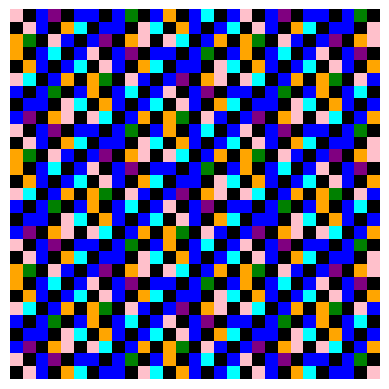

Processing Puzzle id:  48d8fb45
extracting solution
[[[0, 3, 0], [3, 3, 0], [0, 3, 3]]]
creating Dataframe
creating destination path
[[0, 3, 0], [3, 3, 0], [0, 3, 3]]


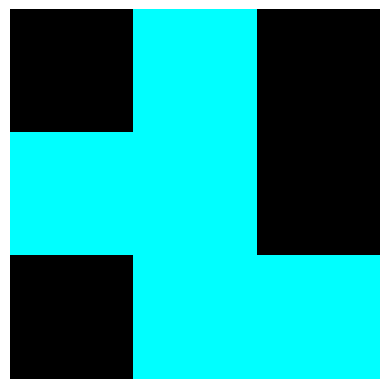

Processing Puzzle id:  4938f0c2
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 2, 2, 2, 

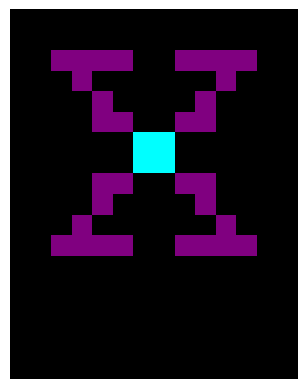

Processing Puzzle id:  496994bd
extracting solution
[[[3, 3, 3, 3, 3, 3], [5, 5, 5, 5, 5, 5], [5, 5, 5, 5, 5, 5], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [5, 5, 5, 5, 5, 5], [5, 5, 5, 5, 5, 5], [3, 3, 3, 3, 3, 3]]]
creating Dataframe
creating destination path
[[3, 3, 3, 3, 3, 3], [5, 5, 5, 5, 5, 5], [5, 5, 5, 5, 5, 5], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [5, 5, 5, 5, 5, 5], [5, 5, 5, 5, 5, 5], [3, 3, 3, 3, 3, 3]]


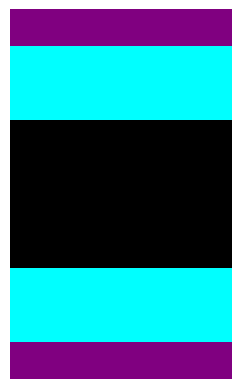

Processing Puzzle id:  49d1d64f
extracting solution
[[[0, 2, 8, 0], [2, 2, 8, 8], [1, 1, 4, 4], [3, 3, 4, 4], [0, 3, 4, 0]]]
creating Dataframe
creating destination path
[[0, 2, 8, 0], [2, 2, 8, 8], [1, 1, 4, 4], [3, 3, 4, 4], [0, 3, 4, 0]]


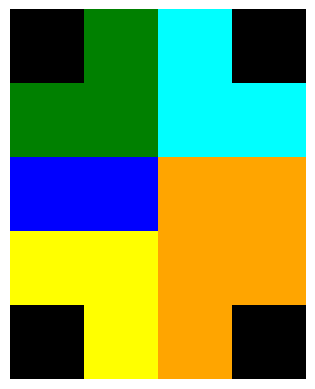

Processing Puzzle id:  4be741c5
extracting solution
[[[3, 2, 1, 8]]]
creating Dataframe
creating destination path
[[3, 2, 1, 8]]


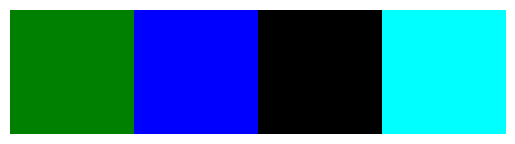

Processing Puzzle id:  4c4377d9
extracting solution
[[[4, 4, 9, 9], [4, 4, 4, 4], [4, 4, 9, 9], [4, 4, 9, 9], [4, 4, 4, 4], [4, 4, 9, 9]]]
creating Dataframe
creating destination path
[[4, 4, 9, 9], [4, 4, 4, 4], [4, 4, 9, 9], [4, 4, 9, 9], [4, 4, 4, 4], [4, 4, 9, 9]]


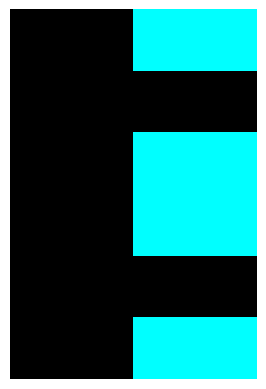

Processing Puzzle id:  4c5c2cf0
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0], [0, 0, 4, 0, 4, 4, 0, 4, 4, 0, 4, 0, 0, 0, 0], [0, 0, 0, 4, 0, 7, 0, 7, 0, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 7, 0, 7, 0, 4, 0, 0, 0, 0, 0], [0, 0, 4, 0, 4, 4, 0, 4, 4, 0, 4, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0], [0, 0,

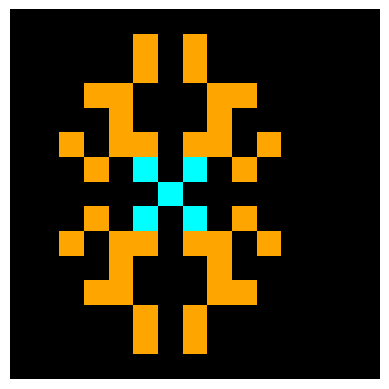

Processing Puzzle id:  50846271
extracting solution
[[[0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 0, 5, 5, 0], [0, 5, 0, 5, 5, 0, 0, 0, 5, 5, 0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 5, 5], [0, 0, 0, 0, 5, 5, 8, 0, 0, 0, 0, 5, 5, 0, 0, 5, 5, 0, 0, 5, 5, 5], [0, 0, 5, 5, 0, 5, 8, 5, 0, 5, 0, 5, 0, 5, 0, 5, 5, 0, 5, 5, 5, 0], [0, 5, 0, 5, 2, 2, 8, 2, 2, 5, 0, 0, 5, 0, 5, 5, 5, 0, 0, 5, 5, 0], [0, 0, 0, 5, 0, 5, 2, 5, 5, 5, 0, 5, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0], [5, 5, 0, 0, 5, 5, 2, 0, 5, 5, 0, 0, 0, 8, 0, 0, 0, 5, 5, 5, 5, 5], [5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 8, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 0, 0, 5, 5, 0, 5, 2, 8, 2, 8, 8, 0, 0, 5, 5, 5, 0], [0, 0, 0, 5, 5, 5, 0, 0, 5, 0, 0, 0, 5, 8, 0, 5, 5, 5, 0, 0, 0, 0], [0, 0, 0, 5, 5, 5, 0, 5, 0, 5, 0, 5, 5, 2, 5, 0, 5, 0, 0, 5, 5, 0], [0, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 0, 0, 5, 0, 5, 5, 0, 0, 0, 5, 5], [5, 5, 0, 0, 5, 8, 5, 0, 0, 5, 5, 0, 5, 0, 5, 5, 0, 0, 5, 5, 0, 5], [0, 0, 5, 5, 5, 8, 5, 5, 5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 0, 5, 0

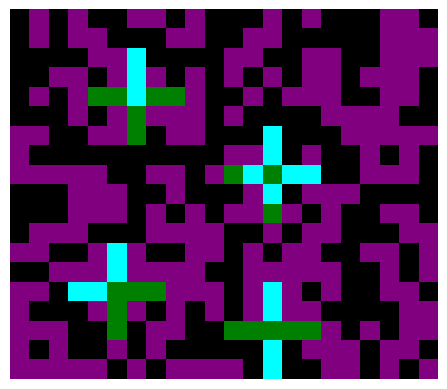

Processing Puzzle id:  508bd3b6
extracting solution
[[[0, 0, 0, 8, 0, 0, 0, 0, 2, 2, 2, 2], [0, 0, 0, 0, 8, 0, 0, 0, 2, 2, 2, 2], [0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 2, 2], [0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 2, 2], [0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 2, 2], [0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 2, 2], [0, 0, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2], [0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2], [3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2]]]
creating Dataframe
creating destination path
[[0, 0, 0, 8, 0, 0, 0, 0, 2, 2, 2, 2], [0, 0, 0, 0, 8, 0, 0, 0, 2, 2, 2, 2], [0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 2, 2], [0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 2, 2], [0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 2, 2], [0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 2, 2], [0, 0, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2], [0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2], [3, 0, 0, 0, 0, 0, 0, 0, 

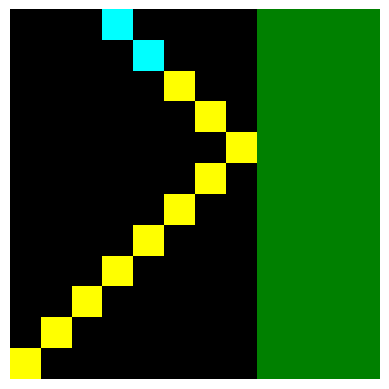

Processing Puzzle id:  50cb2852
extracting solution
[[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 8, 8, 8, 1, 0, 0, 1, 1, 1, 0, 0], [0, 1, 8, 8, 8, 1, 0, 0, 1, 8, 1, 0, 0], [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0], [0, 0, 2, 8, 8, 8, 8, 2, 0, 0, 0, 0, 0], [0, 0, 2, 8, 8, 8, 8, 2, 0, 3, 3, 3, 3], [0, 0, 2, 8, 8, 8, 8, 2, 0, 3, 8, 8, 3], [0, 0, 2, 8, 8, 8, 8, 2, 0, 3, 8, 8, 3], [0, 0, 2, 2, 2, 2, 2, 2, 0, 3, 8, 8, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 8, 8, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 8, 8, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3]]]
creating Dataframe
creating destination path
[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 8, 8, 8, 1, 0, 0, 1, 1, 1, 0, 0], [0, 1, 8, 8, 8, 1, 0, 0, 1, 8, 1, 0, 0], [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0], [0, 0, 2, 8, 8, 8, 8, 2, 0, 0, 0, 0, 0], [0, 0, 2, 8, 8, 8, 8, 2, 0, 3, 3, 3, 3

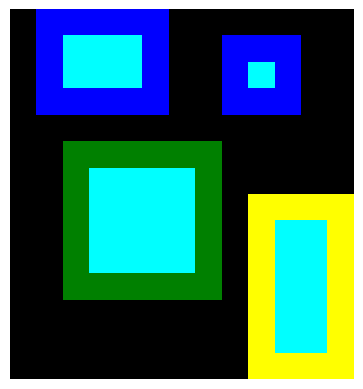

Processing Puzzle id:  5117e062
extracting solution
[[[0, 7, 7], [7, 7, 7], [0, 7, 0]]]
creating Dataframe
creating destination path
[[0, 7, 7], [7, 7, 7], [0, 7, 0]]


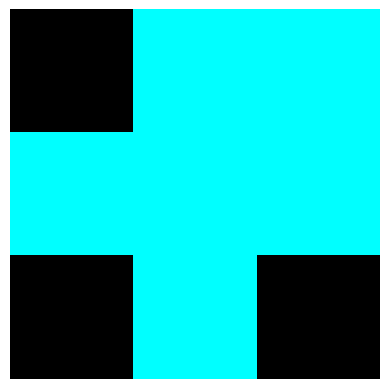

Processing Puzzle id:  5168d44c
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0], [3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 2, 3, 0, 3, 0, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0], [3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 2, 3, 0, 3, 0, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


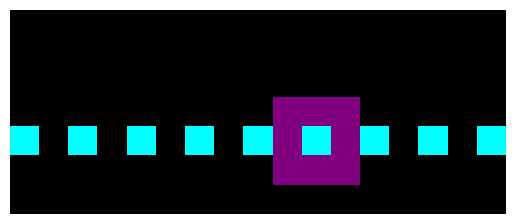

Processing Puzzle id:  539a4f51
extracting solution
[[[7, 7, 3, 2, 2, 7, 7, 3, 2, 2], [7, 7, 3, 2, 2, 7, 7, 3, 2, 2], [3, 3, 3, 2, 2, 7, 7, 3, 2, 2], [2, 2, 2, 2, 2, 7, 7, 3, 2, 2], [2, 2, 2, 2, 2, 7, 7, 3, 2, 2], [7, 7, 7, 7, 7, 7, 7, 3, 2, 2], [7, 7, 7, 7, 7, 7, 7, 3, 2, 2], [3, 3, 3, 3, 3, 3, 3, 3, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]]
creating Dataframe
creating destination path
[[7, 7, 3, 2, 2, 7, 7, 3, 2, 2], [7, 7, 3, 2, 2, 7, 7, 3, 2, 2], [3, 3, 3, 2, 2, 7, 7, 3, 2, 2], [2, 2, 2, 2, 2, 7, 7, 3, 2, 2], [2, 2, 2, 2, 2, 7, 7, 3, 2, 2], [7, 7, 7, 7, 7, 7, 7, 3, 2, 2], [7, 7, 7, 7, 7, 7, 7, 3, 2, 2], [3, 3, 3, 3, 3, 3, 3, 3, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]


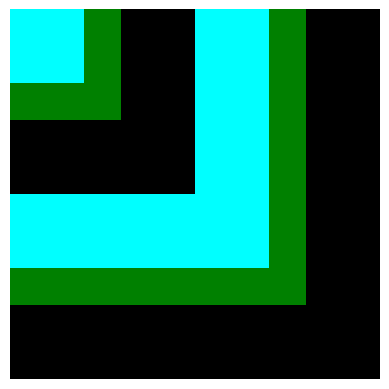

Processing Puzzle id:  53b68214
extracting solution
[[[0, 0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0]], [[0, 8, 8, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 8, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 8, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 8, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 8, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 8, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0], [

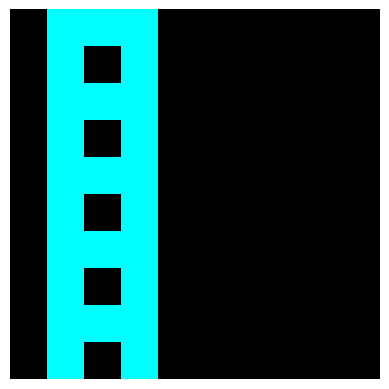

Processing Puzzle id:  543a7ed5
extracting solution
[[[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 8, 8], [8, 3, 3, 3, 3, 3, 3, 8, 3, 6, 6, 6, 3, 8, 8], [8, 3, 6, 6, 6, 6, 3, 8, 3, 6, 6, 6, 3, 8, 8], [8, 3, 6, 4, 4, 6, 3, 8, 3, 6, 4, 6, 3, 8, 8], [8, 3, 6, 4, 4, 6, 3, 8, 3, 6, 4, 6, 3, 8, 8], [8, 3, 6, 6, 6, 6, 3, 8, 3, 6, 4, 6, 3, 8, 8], [8, 3, 3, 3, 3, 3, 3, 8, 3, 6, 6, 6, 3, 8, 8], [8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 8, 8], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8], [8, 8, 8, 3, 6, 6, 6, 6, 6, 6, 6, 3, 8, 8, 8], [8, 8, 8, 3, 6, 6, 4, 4, 6, 6, 6, 3, 8, 8, 8], [8, 8, 8, 3, 6, 6, 6, 6, 6, 6, 6, 3, 8, 8, 8], [8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8]]]
creating Dataframe
creating destination path
[[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 8, 8], [8, 3, 3, 3, 3, 3, 3, 8, 3, 6, 6, 6, 3, 8, 8], [8, 3, 6, 6, 6, 6, 3, 8, 3, 6, 6, 6, 3, 8, 8], [8, 3,

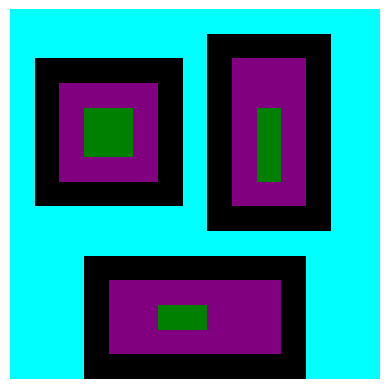

Processing Puzzle id:  54d82841
extracting solution
[[[0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 5, 0, 5, 0, 8, 8, 8, 0, 0, 0], [0, 0, 0, 0, 0, 8, 0, 8, 3, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 0]]]
creating Dataframe
creating destination path
[[0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 5, 0, 5, 0, 8, 8, 8, 0, 0, 0], [0, 0, 0, 0, 0, 8, 0, 8, 3, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 0]]


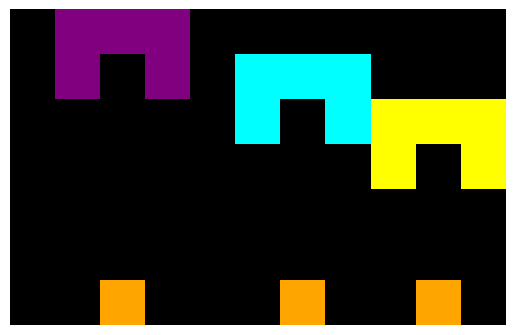

Processing Puzzle id:  54d9e175
extracting solution
[[[7, 7, 7, 5, 8, 8, 8, 5, 9, 9, 9], [7, 7, 7, 5, 8, 8, 8, 5, 9, 9, 9], [7, 7, 7, 5, 8, 8, 8, 5, 9, 9, 9], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [6, 6, 6, 5, 6, 6, 6, 5, 8, 8, 8], [6, 6, 6, 5, 6, 6, 6, 5, 8, 8, 8], [6, 6, 6, 5, 6, 6, 6, 5, 8, 8, 8]]]
creating Dataframe
creating destination path
[[7, 7, 7, 5, 8, 8, 8, 5, 9, 9, 9], [7, 7, 7, 5, 8, 8, 8, 5, 9, 9, 9], [7, 7, 7, 5, 8, 8, 8, 5, 9, 9, 9], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [6, 6, 6, 5, 6, 6, 6, 5, 8, 8, 8], [6, 6, 6, 5, 6, 6, 6, 5, 8, 8, 8], [6, 6, 6, 5, 6, 6, 6, 5, 8, 8, 8]]


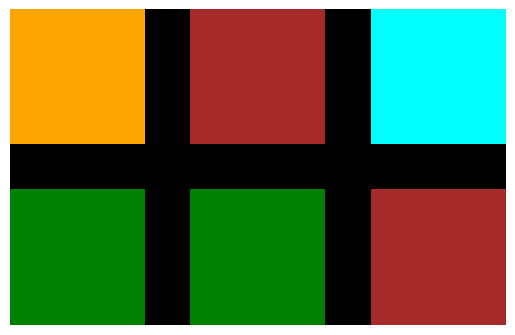

Processing Puzzle id:  5521c0d9
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0], [2, 2,

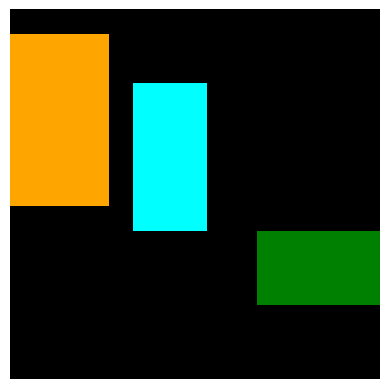

Processing Puzzle id:  5582e5ca
extracting solution
[[[8, 8, 8], [8, 8, 8], [8, 8, 8]]]
creating Dataframe
creating destination path
[[8, 8, 8], [8, 8, 8], [8, 8, 8]]


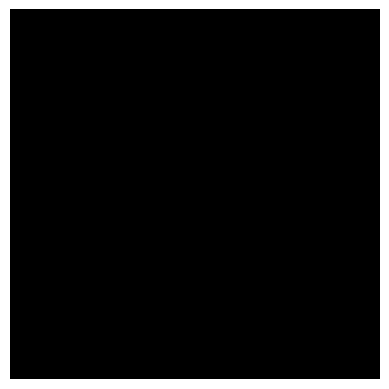

Processing Puzzle id:  5614dbcf
extracting solution
[[[4, 0, 0], [0, 3, 0], [0, 9, 0]]]
creating Dataframe
creating destination path
[[4, 0, 0], [0, 3, 0], [0, 9, 0]]


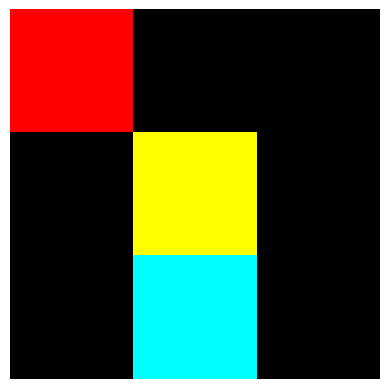

Processing Puzzle id:  56dc2b01
extracting solution
[[[0, 0, 0, 0, 2, 0, 3, 3, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 3, 0, 3, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 3, 3, 3, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 3, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 2, 0, 3, 3, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 3, 0, 3, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 3, 3, 3, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 3, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


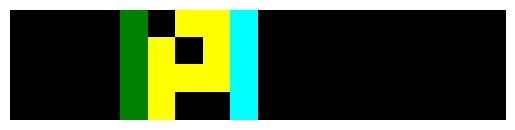

Processing Puzzle id:  56ff96f3
extracting solution
[[[8, 8, 8, 0, 0, 0, 0, 0], [8, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 6, 6, 6, 6, 6, 0, 0], [0, 6, 6, 6, 6, 6, 0, 0], [0, 6, 6, 6, 6, 6, 0, 0], [0, 6, 6, 6, 6, 6, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[8, 8, 8, 0, 0, 0, 0, 0], [8, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 6, 6, 6, 6, 6, 0, 0], [0, 6, 6, 6, 6, 6, 0, 0], [0, 6, 6, 6, 6, 6, 0, 0], [0, 6, 6, 6, 6, 6, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]


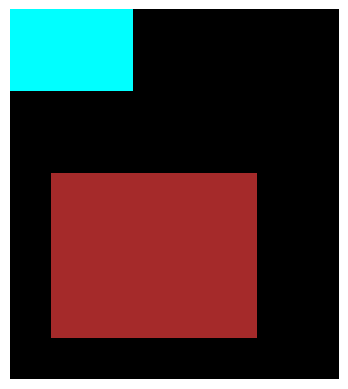

Processing Puzzle id:  57aa92db
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 1, 8, 0, 0, 0, 0, 4, 4, 4, 1, 1, 1, 4, 4, 4, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0], [0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 4, 4, 4, 1, 1, 1, 4, 4, 4, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 1, 1, 1, 4, 4, 4, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0], [0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0], [0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0], [0, 0, 0, 0, 3, 3, 1, 1, 3

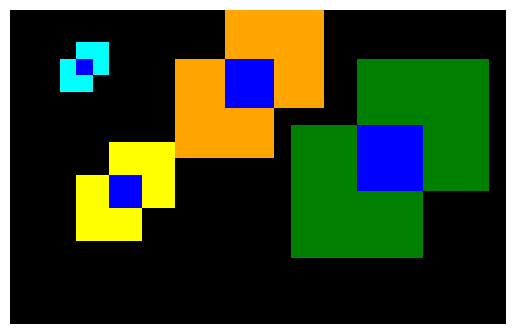

Processing Puzzle id:  5ad4f10b
extracting solution
[[[4, 0, 4], [0, 4, 4], [0, 0, 4]]]
creating Dataframe
creating destination path
[[4, 0, 4], [0, 4, 4], [0, 0, 4]]


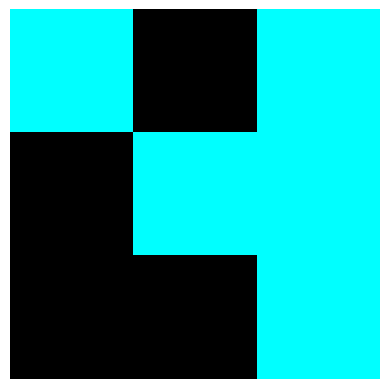

Processing Puzzle id:  5bd6f4ac
extracting solution
[[[5, 8, 9], [0, 9, 0], [9, 2, 0]]]
creating Dataframe
creating destination path
[[5, 8, 9], [0, 9, 0], [9, 2, 0]]


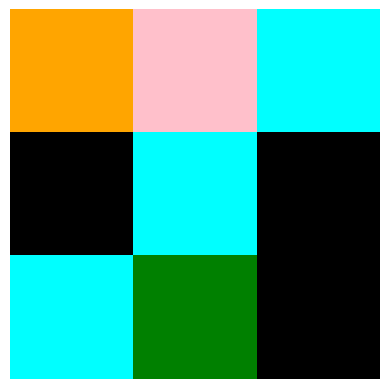

Processing Puzzle id:  5c0a986e
extracting solution
[[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 2, 2, 0, 0, 0, 0, 0, 0], [0, 0, 2, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 2, 2, 0, 0, 0, 0, 0, 0], [0, 0, 2, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0]]


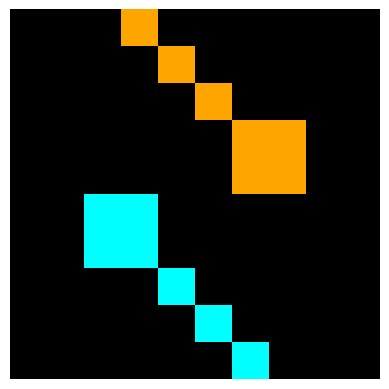

Processing Puzzle id:  5c2c9af4
extracting solution
[[[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0], [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0], [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0], [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0], [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0], 

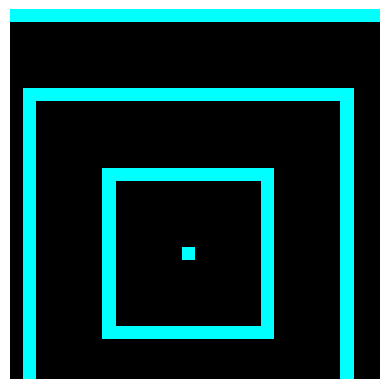

Processing Puzzle id:  5daaa586
extracting solution
[[[1, 3, 3, 3, 3, 3, 3, 3, 3, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 1, 1, 1, 1, 1, 1, 1, 0, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 1, 1, 1, 1, 1, 0, 0, 0, 2], [1, 1, 1, 1, 1, 1, 1, 1, 0, 2], [1, 1, 1, 1, 1, 1, 1, 0, 0, 2], [1, 1, 0, 0, 0, 0, 0, 0, 0, 2], [1, 1, 1, 1, 1, 0, 0, 0, 0, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 2], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]]]
creating Dataframe
creating destination path
[[1, 3, 3, 3, 3, 3, 3, 3, 3, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 1, 1, 1, 1, 1, 1, 1, 0, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 1, 1, 1, 1, 1, 0, 0, 0, 2], [1, 1, 1, 1, 1, 1, 1, 1, 0, 2], [1, 1, 1, 1, 1, 1, 1, 0, 0, 2], [1, 1, 0, 0, 0, 0, 0, 0, 0, 2], [1, 1, 1, 1, 1, 0, 0, 0, 0, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 2], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]]


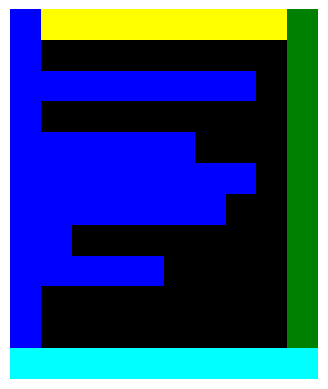

Processing Puzzle id:  60b61512
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 7, 7, 4, 0, 0, 0, 0], [0, 0, 4, 4, 7, 0, 0, 0, 0], [0, 0, 4, 7, 7, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 4, 7, 7, 0], [0, 0, 0, 0, 0, 4, 4, 4, 0], [0, 0, 0, 0, 0, 7, 4, 7, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 7, 7, 4, 0, 0, 0, 0], [0, 0, 4, 4, 7, 0, 0, 0, 0], [0, 0, 4, 7, 7, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 4, 7, 7, 0], [0, 0, 0, 0, 0, 4, 4, 4, 0], [0, 0, 0, 0, 0, 7, 4, 7, 0]]


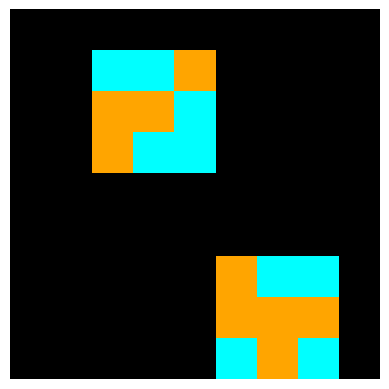

Processing Puzzle id:  6150a2bd
extracting solution
[[[0, 0, 4], [0, 8, 6], [5, 3, 6]]]
creating Dataframe
creating destination path
[[0, 0, 4], [0, 8, 6], [5, 3, 6]]


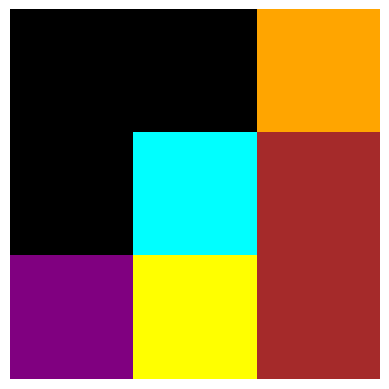

Processing Puzzle id:  623ea044
extracting solution
[[[0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 6, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 6, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 6, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 6, 0], [0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 6], [0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path

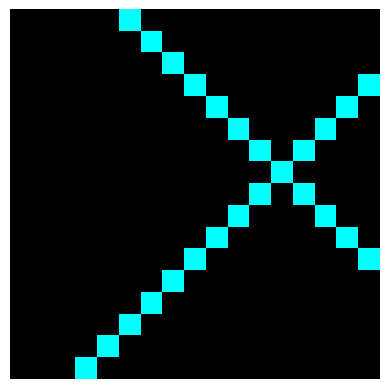

Processing Puzzle id:  62c24649
extracting solution
[[[1, 1, 0, 0, 1, 1], [0, 3, 2, 2, 3, 0], [3, 3, 0, 0, 3, 3], [3, 3, 0, 0, 3, 3], [0, 3, 2, 2, 3, 0], [1, 1, 0, 0, 1, 1]]]
creating Dataframe
creating destination path
[[1, 1, 0, 0, 1, 1], [0, 3, 2, 2, 3, 0], [3, 3, 0, 0, 3, 3], [3, 3, 0, 0, 3, 3], [0, 3, 2, 2, 3, 0], [1, 1, 0, 0, 1, 1]]


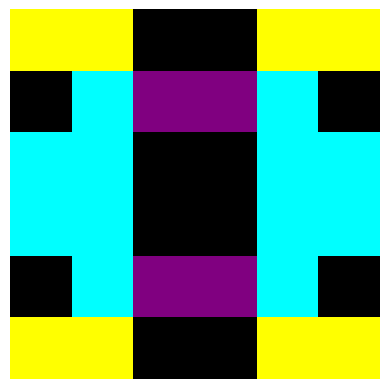

Processing Puzzle id:  63613498
extracting solution
[[[0, 0, 0, 5, 0, 0, 0, 6, 0, 0], [2, 2, 2, 5, 0, 0, 0, 6, 6, 0], [0, 0, 2, 5, 0, 0, 0, 6, 0, 0], [5, 5, 5, 5, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 3, 3, 0, 0, 0], [8, 8, 8, 0, 0, 0, 0, 0, 4, 0], [8, 0, 0, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 5, 5, 5, 0, 4, 0], [0, 0, 0, 0, 0, 0, 5, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 5, 0, 0, 0, 6, 0, 0], [2, 2, 2, 5, 0, 0, 0, 6, 6, 0], [0, 0, 2, 5, 0, 0, 0, 6, 0, 0], [5, 5, 5, 5, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 3, 3, 0, 0, 0], [8, 8, 8, 0, 0, 0, 0, 0, 4, 0], [8, 0, 0, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 5, 5, 5, 0, 4, 0], [0, 0, 0, 0, 0, 0, 5, 0, 0, 0]]


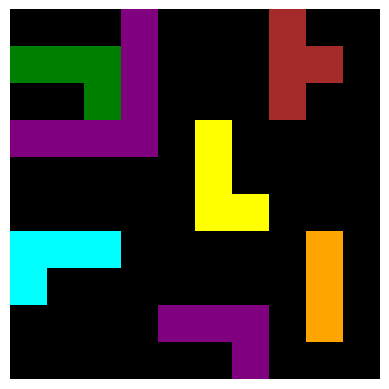

Processing Puzzle id:  6430c8c4
extracting solution
[[[0, 0, 0, 0], [3, 0, 0, 0], [0, 3, 0, 0], [0, 0, 0, 3]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0], [3, 0, 0, 0], [0, 3, 0, 0], [0, 0, 0, 3]]


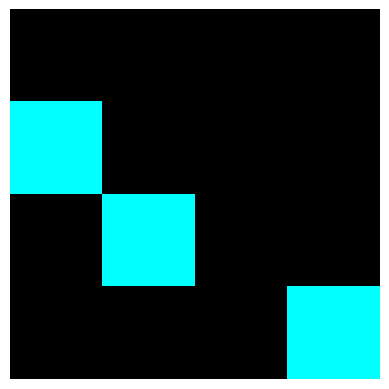

Processing Puzzle id:  6455b5f5
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [8, 8, 8, 2, 0, 0, 0, 0, 0, 0, 2, 8, 2, 0, 0, 0], [2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 8, 2, 0, 0, 0], [8, 8, 8, 2, 0, 0, 0, 0, 0, 0, 2, 8, 2, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],

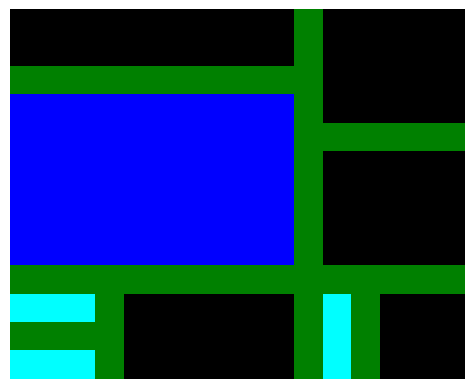

Processing Puzzle id:  662c240a
extracting solution
[[[5, 4, 4], [4, 5, 4], [4, 5, 4]]]
creating Dataframe
creating destination path
[[5, 4, 4], [4, 5, 4], [4, 5, 4]]


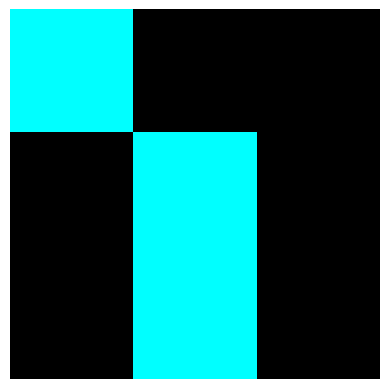

Processing Puzzle id:  67385a82
extracting solution
[[[8, 0, 8, 0, 3], [8, 8, 8, 0, 0], [0, 0, 0, 0, 3], [0, 8, 8, 0, 0], [0, 8, 8, 0, 0]]]
creating Dataframe
creating destination path
[[8, 0, 8, 0, 3], [8, 8, 8, 0, 0], [0, 0, 0, 0, 3], [0, 8, 8, 0, 0], [0, 8, 8, 0, 0]]


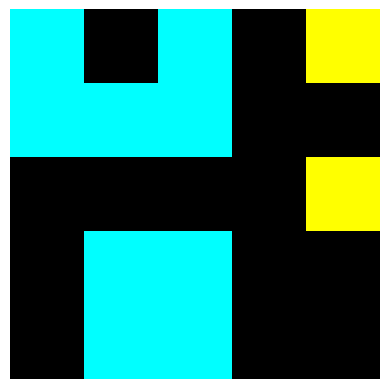

Processing Puzzle id:  673ef223
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 8, 8, 8, 8, 8, 8, 8, 4, 0, 0, 0], [2, 8, 8, 8, 8, 8, 8, 4, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 8, 8, 8, 4, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 8, 8, 8, 8, 8, 8, 8, 

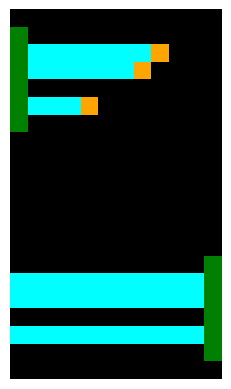

Processing Puzzle id:  6773b310
extracting solution
[[[0, 0, 1], [0, 1, 1], [1, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 1], [0, 1, 1], [1, 0, 0]]


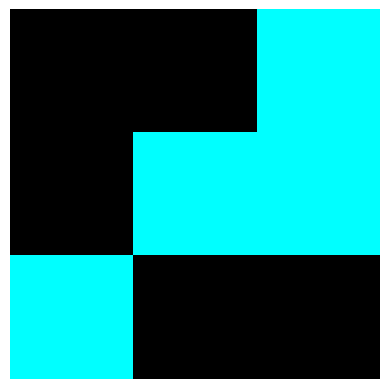

Processing Puzzle id:  67a3c6ac
extracting solution
[[[1, 6, 7], [6, 7, 6], [2, 2, 6]]]
creating Dataframe
creating destination path
[[1, 6, 7], [6, 7, 6], [2, 2, 6]]


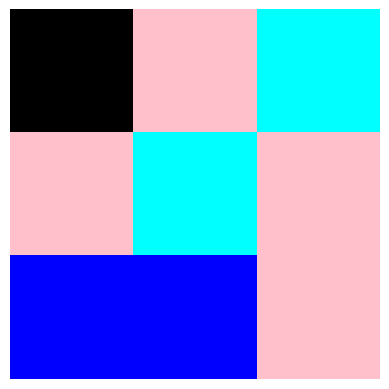

Processing Puzzle id:  67a423a3
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0], [3, 3, 3, 3, 3, 3, 3, 4, 5, 4, 3, 3], [0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0], [3, 3, 3, 3, 3, 3, 3, 4, 5, 4, 3, 3], [0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 

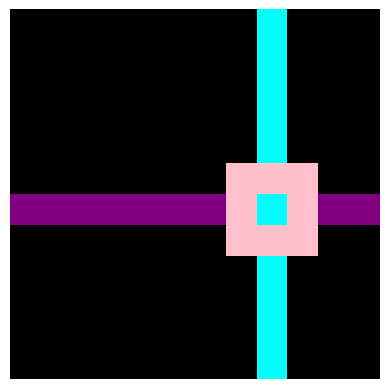

Processing Puzzle id:  67e8384a
extracting solution
[[[1, 6, 6, 6, 6, 1], [5, 2, 2, 2, 2, 5], [2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2], [5, 2, 2, 2, 2, 5], [1, 6, 6, 6, 6, 1]]]
creating Dataframe
creating destination path
[[1, 6, 6, 6, 6, 1], [5, 2, 2, 2, 2, 5], [2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2], [5, 2, 2, 2, 2, 5], [1, 6, 6, 6, 6, 1]]


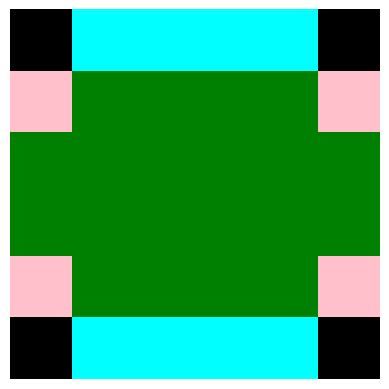

Processing Puzzle id:  681b3aeb
extracting solution
[[[8, 8, 2], [8, 2, 2], [8, 8, 8]]]
creating Dataframe
creating destination path
[[8, 8, 2], [8, 2, 2], [8, 8, 8]]


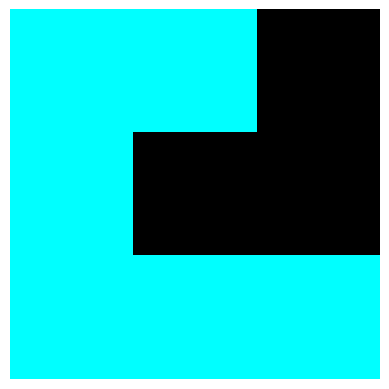

Processing Puzzle id:  6855a6e4
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 0, 5, 5, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0], [0, 0,

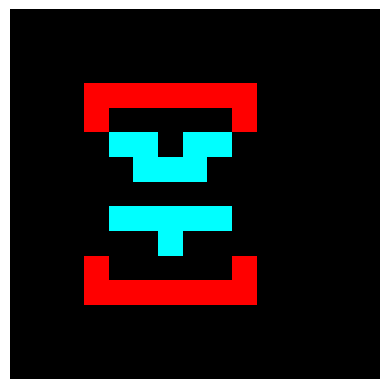

Processing Puzzle id:  68b16354
extracting solution
[[[1, 4, 7, 1, 2, 3, 4], [3, 2, 8, 4, 1, 8, 4], [4, 1, 1, 1, 7, 8, 4], [1, 1, 2, 3, 8, 1, 3], [1, 1, 1, 1, 4, 7, 3], [4, 4, 1, 1, 4, 3, 4], [2, 8, 1, 3, 2, 4, 1]]]
creating Dataframe
creating destination path
[[1, 4, 7, 1, 2, 3, 4], [3, 2, 8, 4, 1, 8, 4], [4, 1, 1, 1, 7, 8, 4], [1, 1, 2, 3, 8, 1, 3], [1, 1, 1, 1, 4, 7, 3], [4, 4, 1, 1, 4, 3, 4], [2, 8, 1, 3, 2, 4, 1]]


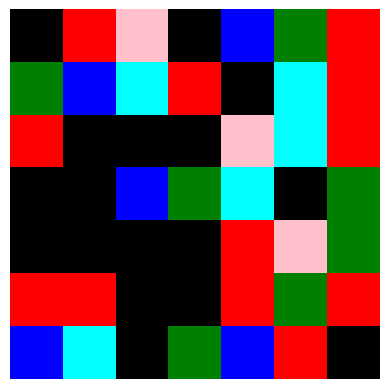

Processing Puzzle id:  694f12f3
extracting solution
[[[4, 4, 4, 4, 4, 4, 0, 0, 0, 0], [4, 2, 2, 2, 2, 4, 0, 0, 0, 0], [4, 2, 2, 2, 2, 4, 0, 0, 0, 0], [4, 2, 2, 2, 2, 4, 0, 0, 0, 0], [4, 2, 2, 2, 2, 4, 0, 0, 0, 0], [4, 4, 4, 4, 4, 4, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 4, 4, 4, 4, 4, 4], [0, 0, 0, 0, 4, 1, 1, 1, 1, 4], [0, 0, 0, 0, 4, 4, 4, 4, 4, 4]]]
creating Dataframe
creating destination path
[[4, 4, 4, 4, 4, 4, 0, 0, 0, 0], [4, 2, 2, 2, 2, 4, 0, 0, 0, 0], [4, 2, 2, 2, 2, 4, 0, 0, 0, 0], [4, 2, 2, 2, 2, 4, 0, 0, 0, 0], [4, 2, 2, 2, 2, 4, 0, 0, 0, 0], [4, 4, 4, 4, 4, 4, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 4, 4, 4, 4, 4, 4], [0, 0, 0, 0, 4, 1, 1, 1, 1, 4], [0, 0, 0, 0, 4, 4, 4, 4, 4, 4]]


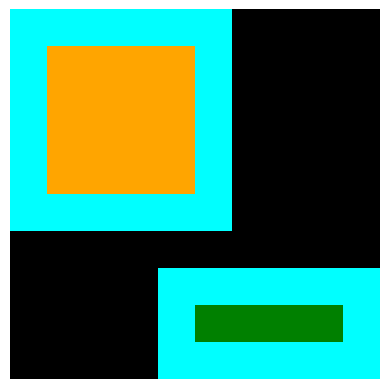

Processing Puzzle id:  6a1e5592
extracting solution
[[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2], [2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2], [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1], [0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2], [2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2], [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1], [0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0,

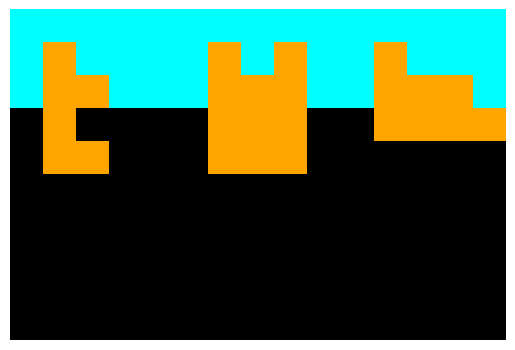

Processing Puzzle id:  6aa20dc0
extracting solution
[[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 8, 8, 8, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 8, 8, 8, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 8, 8, 8, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 8, 4, 3, 3, 8, 8, 8, 3, 3, 3, 8, 8, 8, 3, 3, 3], [3, 3, 3, 3, 3, 8, 3, 8, 3, 3, 8, 8, 8, 3, 3, 3, 8, 8, 8, 3, 3, 3], [3, 3, 3, 3, 3, 1, 8, 3, 3, 3, 8, 8, 8, 3, 3, 3, 8, 8, 8, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 1, 1, 1, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 1, 1, 1, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 1, 1, 1, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 1, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 1, 1, 3, 3, 3, 3

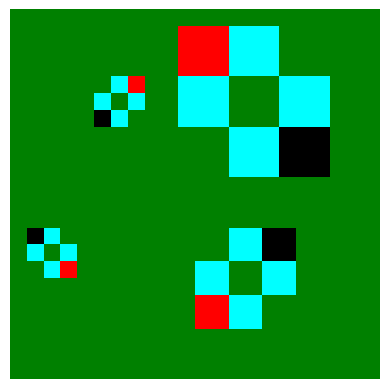

Processing Puzzle id:  6b9890af
extracting solution
[[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2], [2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2], [2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2], [2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2], [2, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 2], [2, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 2], [2, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 2], [2, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 2], [2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2], [2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2], [2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2], [2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]]
creating Dataframe
creating destination path
[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2], [2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2], [2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2], [2, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 2], [2, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 2], [2, 3, 3, 3, 3, 0, 

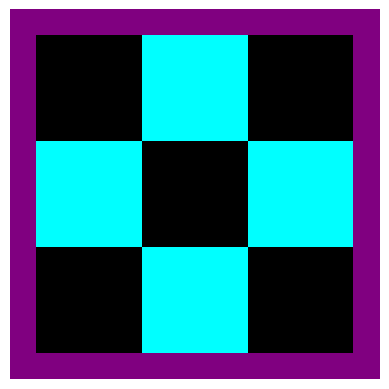

Processing Puzzle id:  6c434453
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 2, 0, 0, 0, 0, 0, 1, 0], [0, 2, 2, 2, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 2, 0, 0, 0, 0, 1, 1], [0, 0, 2, 0, 0, 0, 0, 0, 1, 1]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 2, 0, 0, 0, 0, 0, 1, 0], [0, 2, 2, 2, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 2, 0, 0, 0, 0, 1, 1], [0, 0, 2, 0, 0, 0, 0, 0, 1, 1]]


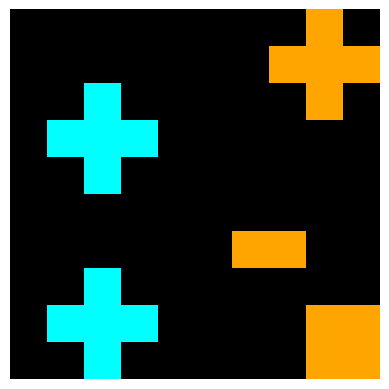

Processing Puzzle id:  6cdd2623
extracting solution
[[[0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
c

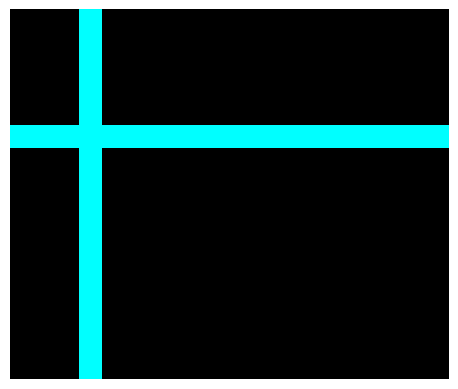

Processing Puzzle id:  6cf79266
extracting solution
[[[0, 4, 0, 4, 4, 0, 4, 4, 4, 0, 0, 0, 4, 0, 4, 4, 4, 4, 4, 0], [0, 0, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 0], [4, 4, 4, 0, 0, 4, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0], [4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 4, 0, 0], [4, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 0, 4], [4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 4, 0], [0, 0, 0, 4, 1, 1, 1, 0, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 4], [4, 0, 4, 4, 1, 1, 1, 4, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0], [0, 4, 4, 4, 1, 1, 1, 4, 4, 4, 0, 0, 4, 0, 4, 4, 4, 0, 0, 0], [4, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 4, 4, 4, 0, 4, 0, 4], [0, 0, 0, 4, 0, 4, 0, 4, 4, 4, 0, 0, 4, 0, 4, 4, 4, 0, 4, 4], [0, 4, 4, 0, 0, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4, 4, 0, 4, 0], [0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 4], [4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 0, 0], [0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4], [4, 0, 0, 4, 4, 

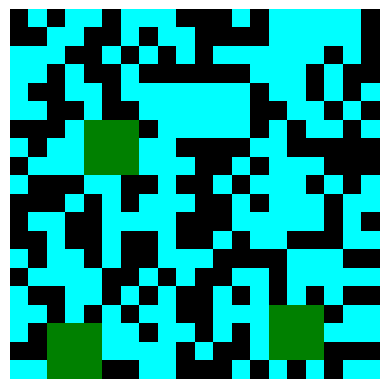

Processing Puzzle id:  6d0160f0
extracting solution
[[[0, 0, 0, 5, 0, 0, 0, 5, 6, 0, 4], [0, 0, 0, 5, 0, 0, 0, 5, 0, 2, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 7, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 5, 0, 0, 0, 5, 6, 0, 4], [0, 0, 0, 5, 0, 0, 0, 5, 0, 2, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 7, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0]]


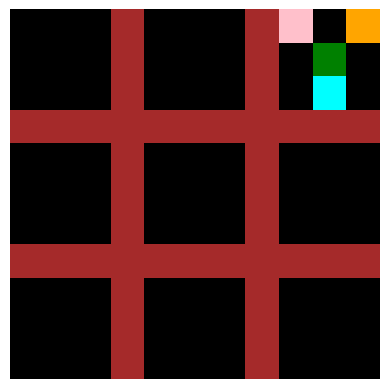

Processing Puzzle id:  6d0aefbc
extracting solution
[[[6, 8, 6, 6, 8, 6], [8, 6, 8, 8, 6, 8], [1, 6, 1, 1, 6, 1]]]
creating Dataframe
creating destination path
[[6, 8, 6, 6, 8, 6], [8, 6, 8, 8, 6, 8], [1, 6, 1, 1, 6, 1]]


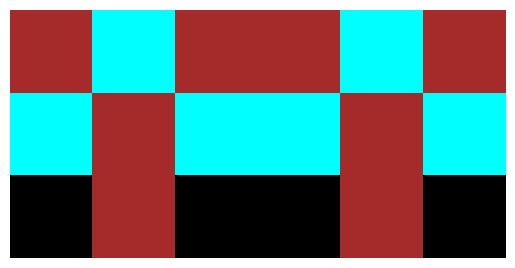

Processing Puzzle id:  6d58a25d
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 6, 0, 0, 0, 0, 6, 0], [0, 0, 0, 1, 6, 6, 0, 6, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0], [6, 0, 0, 0, 6, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6, 0, 0, 6, 6, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 0, 6, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0], [0, 0, 0, 0, 6, 

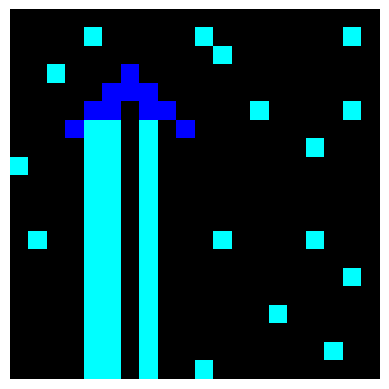

Processing Puzzle id:  6d75e8bb
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 8, 2, 2, 2, 2, 2, 2, 0, 0], [0, 0, 8, 2, 2, 2, 8, 8, 2, 0, 0], [0, 0, 8, 2, 8, 2, 2, 8, 2, 0, 0], [0, 0, 8, 8, 8, 2, 2, 8, 2, 0, 0], [0, 0, 8, 8, 8, 8, 2, 8, 8, 0, 0], [0, 0, 8, 8, 8, 8, 8, 8, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 8, 2, 2, 2, 2, 2, 2, 0, 0], [0, 0, 8, 2, 2, 2, 8, 8, 2, 0, 0], [0, 0, 8, 2, 8, 2, 2, 8, 2, 0, 0], [0, 0, 8, 8, 8, 2, 2, 8, 2, 0, 0], [0, 0, 8, 8, 8, 8, 2, 8, 8, 0, 0], [0, 0, 8, 8, 8, 8, 8, 8, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


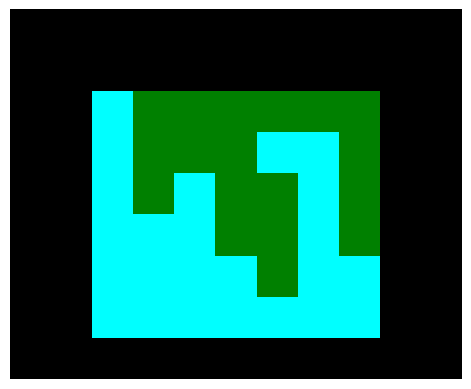

Processing Puzzle id:  6e02f1e3
extracting solution
[[[0, 0, 5], [0, 5, 0], [5, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 5], [0, 5, 0], [5, 0, 0]]


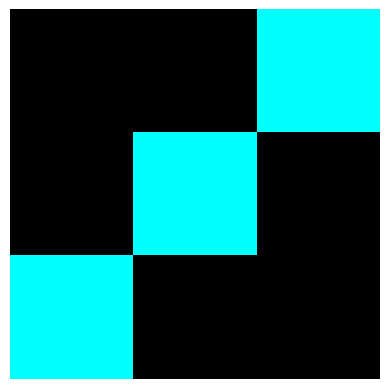

Processing Puzzle id:  6e19193c
extracting solution
[[[0, 8, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 8, 8, 0], [0, 0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 8, 8, 0, 0, 0, 0, 0, 8], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 0, 0, 0, 0], [8, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 8, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 8, 8, 0], [0, 0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 8, 8, 0, 0, 0, 0, 0, 8], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 0, 0, 0, 0], [8, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


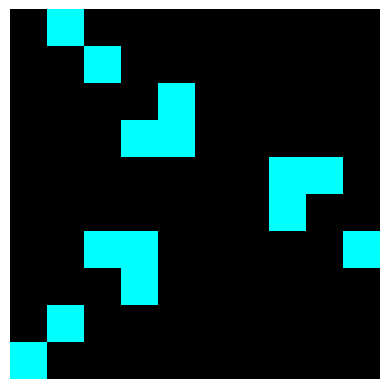

Processing Puzzle id:  6e82a1ae
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 1, 0, 2, 2, 0, 0, 1], [0, 1, 1, 0, 0, 0, 2, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 3, 3, 0, 0, 3, 0, 0], [2, 0, 0, 0, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 1, 0, 2, 2, 0, 0, 1], [0, 1, 1, 0, 0, 0, 2, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 3, 3, 0, 0, 3, 0, 0], [2, 0, 0, 0, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


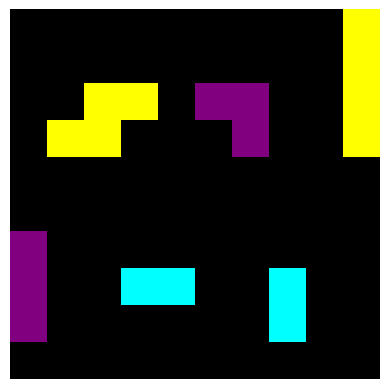

Processing Puzzle id:  6ecd11f4
extracting solution
[[[4, 0, 6, 3], [0, 3, 3, 0], [6, 7, 7, 4], [1, 0, 0, 1]]]
creating Dataframe
creating destination path
[[4, 0, 6, 3], [0, 3, 3, 0], [6, 7, 7, 4], [1, 0, 0, 1]]


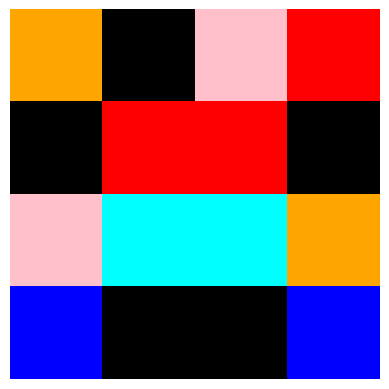

Processing Puzzle id:  6f8cd79b
extracting solution
[[[8, 8, 8, 8, 8, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 8, 8, 8, 8, 8]]]
creating Dataframe
creating destination path
[[8, 8, 8, 8, 8, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 8, 8, 8, 8, 8]]


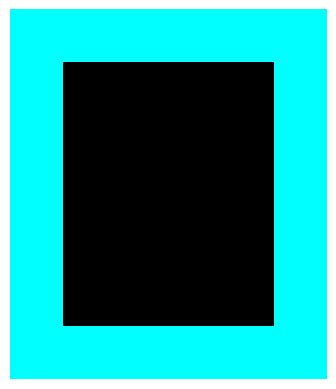

Processing Puzzle id:  6fa7a44f
extracting solution
[[[2, 9, 2], [8, 5, 2], [2, 2, 8], [2, 2, 8], [8, 5, 2], [2, 9, 2]]]
creating Dataframe
creating destination path
[[2, 9, 2], [8, 5, 2], [2, 2, 8], [2, 2, 8], [8, 5, 2], [2, 9, 2]]


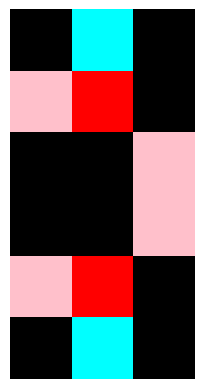

Processing Puzzle id:  72322fa7
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 7, 3, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 4, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 3, 7, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0], [0, 8, 0, 0, 0, 0, 0, 0, 3, 7, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 4, 2, 0, 0, 0, 0, 1, 0], [0

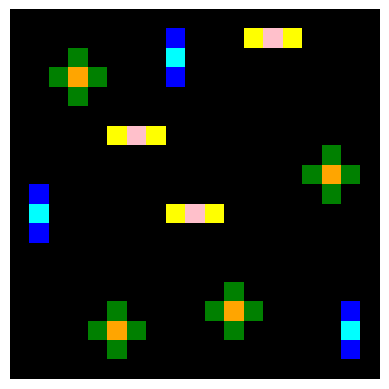

Processing Puzzle id:  72ca375d
extracting solution
[[[0, 9, 9, 0], [0, 9, 9, 0], [9, 9, 9, 9]]]
creating Dataframe
creating destination path
[[0, 9, 9, 0], [0, 9, 9, 0], [9, 9, 9, 9]]


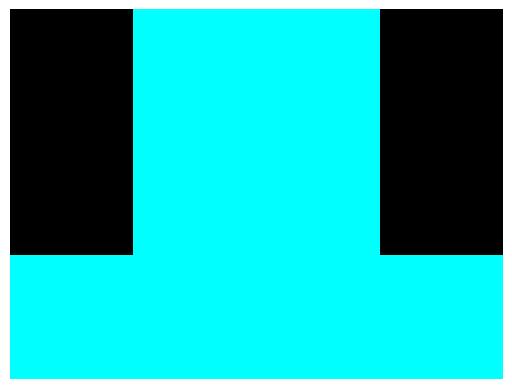

Processing Puzzle id:  73251a56
extracting solution
[[[4, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 1, 1, 2, 2, 3, 3, 4], [3, 4, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9], [4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7], [4, 3, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6], [5, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], [5, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5], [6, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4], [6, 5, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4], [7, 5, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4], [7, 5, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4], [8, 6, 5, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [8, 6, 5, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3], [9, 6, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3], [9, 7, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3], [1, 7, 6, 5, 4, 4, 4, 3, 3, 3, 3, 3,

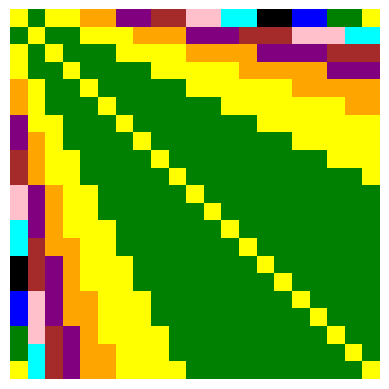

Processing Puzzle id:  7447852a
extracting solution
[[[2, 0, 0, 0, 2, 4, 4, 4, 2, 0, 0, 0, 2, 0, 0, 0, 2, 4, 4, 4, 2, 0, 0, 0, 2], [4, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 4], [4, 4, 2, 0, 0, 0, 2, 0, 0, 0, 2, 4, 4, 4, 2, 0, 0, 0, 2, 0, 0, 0, 2, 4, 4]]]
creating Dataframe
creating destination path
[[2, 0, 0, 0, 2, 4, 4, 4, 2, 0, 0, 0, 2, 0, 0, 0, 2, 4, 4, 4, 2, 0, 0, 0, 2], [4, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 4], [4, 4, 2, 0, 0, 0, 2, 0, 0, 0, 2, 4, 4, 4, 2, 0, 0, 0, 2, 0, 0, 0, 2, 4, 4]]


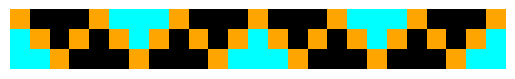

Processing Puzzle id:  7468f01a
extracting solution
[[[1, 1, 1, 8, 1, 1, 1, 1], [1, 8, 8, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 8, 8, 8], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 8, 8, 8, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]]
creating Dataframe
creating destination path
[[1, 1, 1, 8, 1, 1, 1, 1], [1, 8, 8, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 8, 8, 8], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 8, 8, 8, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]


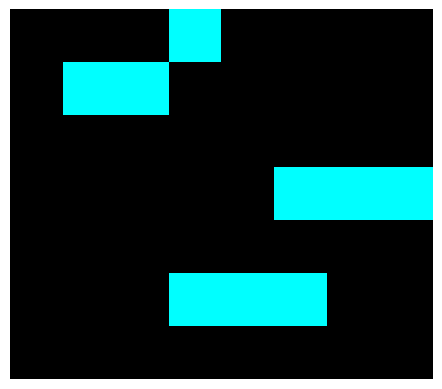

Processing Puzzle id:  746b3537
extracting solution
[[[1, 2, 3, 8, 4]]]
creating Dataframe
creating destination path
[[1, 2, 3, 8, 4]]


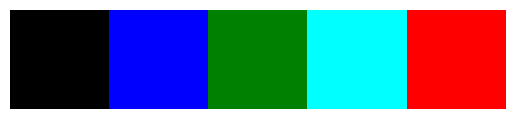

Processing Puzzle id:  74dd1130
extracting solution
[[[9, 9, 9], [3, 4, 3], [4, 4, 4]]]
creating Dataframe
creating destination path
[[9, 9, 9], [3, 4, 3], [4, 4, 4]]


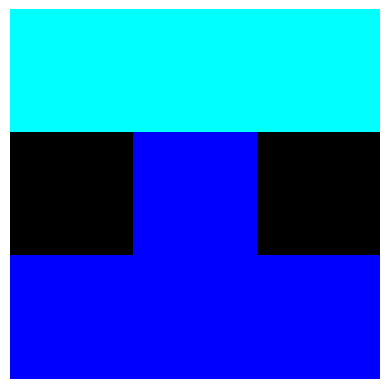

Processing Puzzle id:  75b8110e
extracting solution
[[[5, 9, 6, 6], [5, 9, 5, 5], [4, 5, 5, 5], [5, 9, 0, 0]]]
creating Dataframe
creating destination path
[[5, 9, 6, 6], [5, 9, 5, 5], [4, 5, 5, 5], [5, 9, 0, 0]]


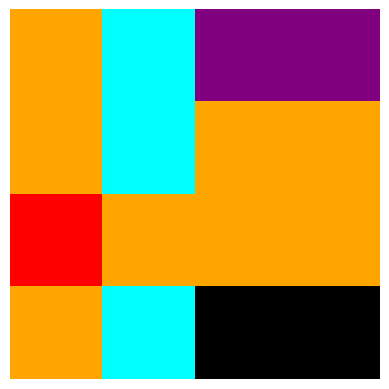

Processing Puzzle id:  760b3cac
extracting solution
[[[0, 0, 0, 8, 0, 8, 8, 0, 8], [0, 0, 0, 0, 8, 8, 8, 8, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 4, 0, 0, 0], [0, 0, 0, 4, 4, 4, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 8, 0, 8, 8, 0, 8], [0, 0, 0, 0, 8, 8, 8, 8, 0], [0, 0, 0, 8, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 4, 0, 0, 0], [0, 0, 0, 4, 4, 4, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0]]


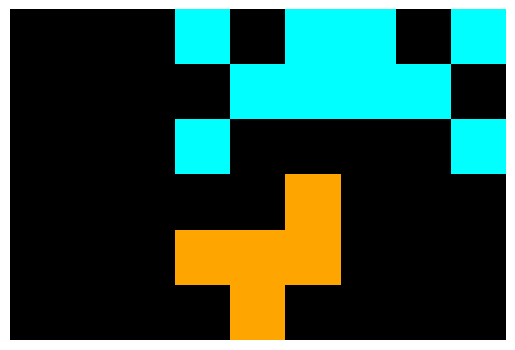

Processing Puzzle id:  776ffc46
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 2, 2, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 5, 0, 0, 2, 2, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5], [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0], [0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 0], [0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0], [0, 0, 2, 2, 0, 

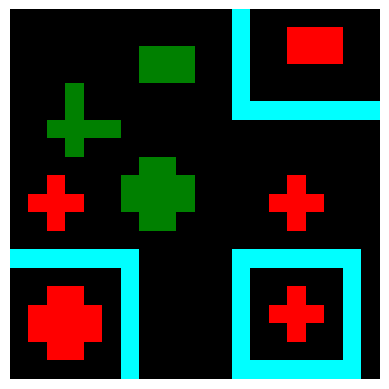

Processing Puzzle id:  77fdfe62
extracting solution
[[[0, 3, 3, 0, 0, 0], [3, 3, 3, 0, 4, 0], [0, 0, 3, 0, 4, 0], [0, 7, 0, 5, 5, 0], [7, 7, 0, 5, 0, 5], [0, 7, 0, 0, 5, 0]]]
creating Dataframe
creating destination path
[[0, 3, 3, 0, 0, 0], [3, 3, 3, 0, 4, 0], [0, 0, 3, 0, 4, 0], [0, 7, 0, 5, 5, 0], [7, 7, 0, 5, 0, 5], [0, 7, 0, 0, 5, 0]]


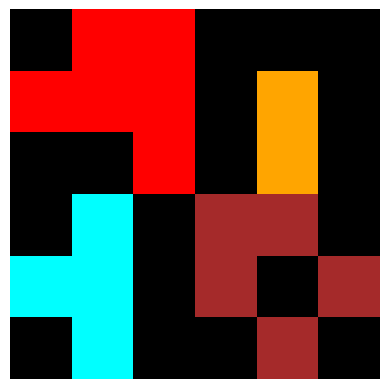

Processing Puzzle id:  780d0b14
extracting solution
[[[3, 2, 4], [1, 1, 8], [7, 3, 2]]]
creating Dataframe
creating destination path
[[3, 2, 4], [1, 1, 8], [7, 3, 2]]


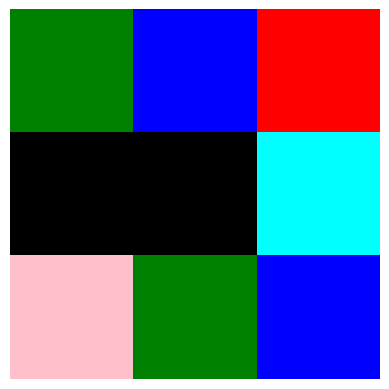

Processing Puzzle id:  7837ac64
extracting solution
[[[1, 0, 4], [0, 0, 0], [8, 8, 8]]]
creating Dataframe
creating destination path
[[1, 0, 4], [0, 0, 0], [8, 8, 8]]


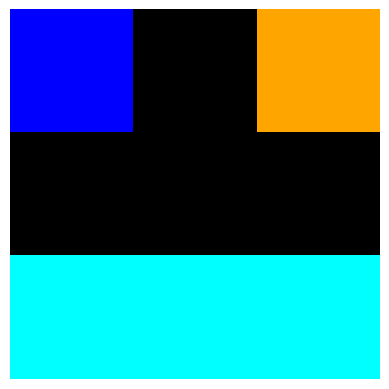

Processing Puzzle id:  794b24be
extracting solution
[[[2, 2, 0], [0, 0, 0], [0, 0, 0]], [[2, 2, 2], [0, 2, 0], [0, 0, 0]]]
creating Dataframe
creating destination path
[[2, 2, 0], [0, 0, 0], [0, 0, 0]]
[[2, 2, 2], [0, 2, 0], [0, 0, 0]]


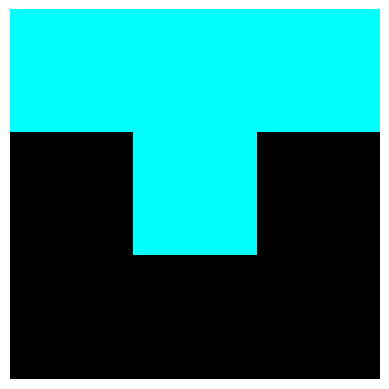

Processing Puzzle id:  7b6016b9
extracting solution
[[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 7, 3, 3], [3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 7, 3, 3], [3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3], [3, 3, 3, 3, 3, 7, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 7, 3, 3], [3, 3, 3, 3, 3, 7, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 7, 3, 3], [3, 3, 3, 3, 3, 7, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 7, 3, 3], [3, 3, 3, 3, 3, 7, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 7, 3, 3], [3, 3, 3, 3, 3, 7, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3], [3, 3, 3, 3, 3, 7, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 7, 3, 3, 3, 3, 3, 7, 3, 3], [3, 3, 3, 3, 3, 7, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 7, 3, 3, 3, 3, 3, 7, 3, 3], [3, 3, 3, 3, 3, 7, 2, 

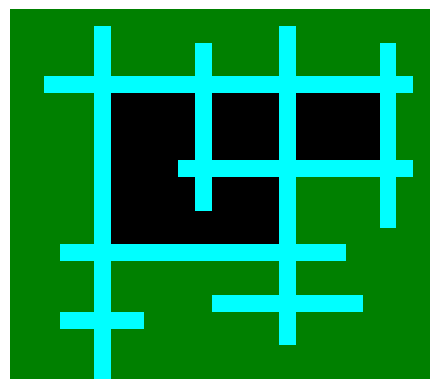

Processing Puzzle id:  7b7f7511
extracting solution
[[[5, 4, 5], [4, 5, 4], [6, 6, 4], [2, 6, 2]]]
creating Dataframe
creating destination path
[[5, 4, 5], [4, 5, 4], [6, 6, 4], [2, 6, 2]]


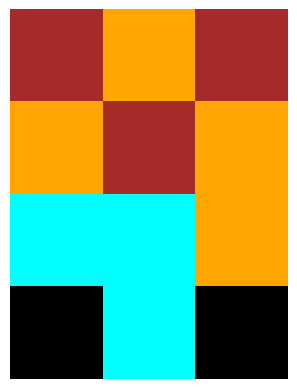

Processing Puzzle id:  7c008303
extracting solution
[[[0, 0, 0, 1, 0, 0], [2, 2, 0, 1, 0, 1], [0, 2, 0, 1, 0, 1], [0, 4, 4, 7, 0, 0], [0, 4, 0, 0, 0, 7], [0, 0, 4, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 1, 0, 0], [2, 2, 0, 1, 0, 1], [0, 2, 0, 1, 0, 1], [0, 4, 4, 7, 0, 0], [0, 4, 0, 0, 0, 7], [0, 0, 4, 0, 0, 0]]


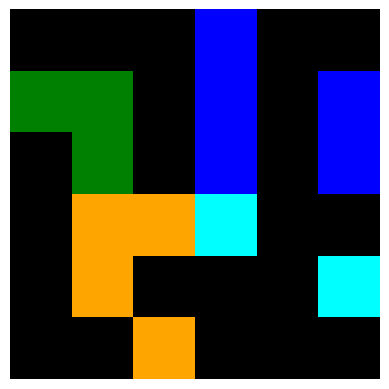

Processing Puzzle id:  7ddcd7ec
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 8, 0, 0, 0, 0], [0, 0, 0, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 0, 0, 0, 0, 0], [0, 0, 8, 0, 0, 8, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 8, 0, 0, 0], [8, 0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 8, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 8, 0, 0, 0, 0], [0, 0, 0, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 0, 0, 0, 0, 0], [0, 0, 8, 0, 0, 8, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 8, 0, 0, 0], [8, 0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 8, 0]]


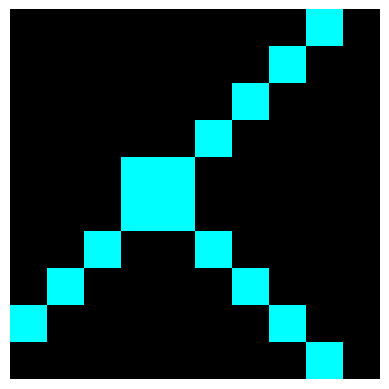

Processing Puzzle id:  7df24a62
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 4, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 4, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0

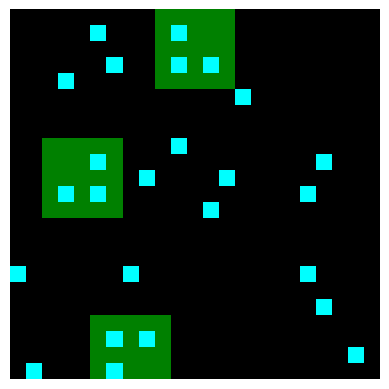

Processing Puzzle id:  7e0986d6
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0], [0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 0], [0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 0], [0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 0], [0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 0], [0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 0], [0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0], [0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 0], [0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 0], [0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 0]

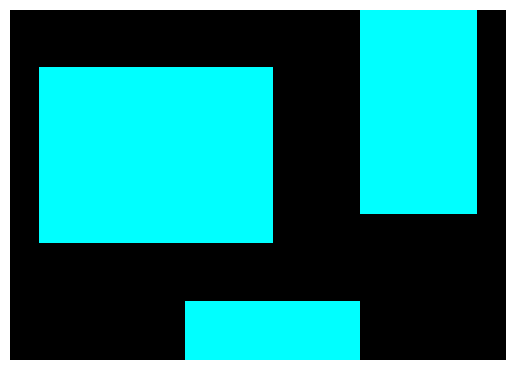

Processing Puzzle id:  7f4411dc
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 8, 8, 8, 0, 0, 0, 0, 0, 0], [0, 8, 8, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 8, 8, 8, 0], [0, 0, 0, 0, 8, 8, 8, 8, 8, 0], [0, 0, 0, 0, 8, 8, 8, 8, 8, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 8, 8, 8, 0, 0, 0, 0, 0, 0], [0, 8, 8, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 8, 8, 8, 0], [0, 0, 0, 0, 8, 8, 8, 8, 8, 0], [0, 0, 0, 0, 8, 8, 8, 8, 8, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


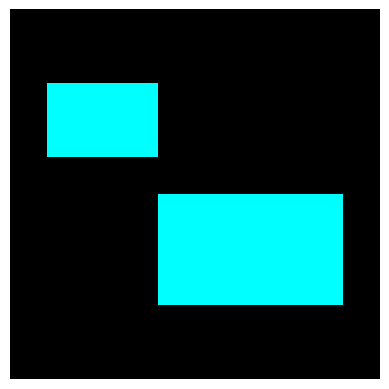

Processing Puzzle id:  7fe24cdd
extracting solution
[[[2, 5, 0, 3, 2, 2], [2, 5, 1, 1, 5, 5], [3, 1, 1, 1, 1, 0], [0, 1, 1, 1, 1, 3], [5, 5, 1, 1, 5, 2], [2, 2, 3, 0, 5, 2]]]
creating Dataframe
creating destination path
[[2, 5, 0, 3, 2, 2], [2, 5, 1, 1, 5, 5], [3, 1, 1, 1, 1, 0], [0, 1, 1, 1, 1, 3], [5, 5, 1, 1, 5, 2], [2, 2, 3, 0, 5, 2]]


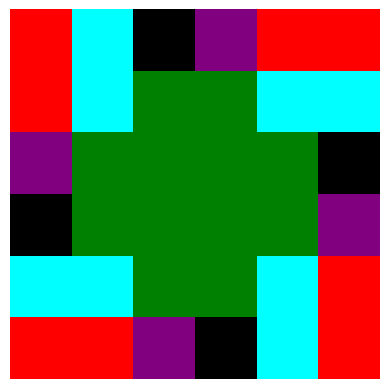

Processing Puzzle id:  80af3007
extracting solution
[[[5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 0, 5, 0, 0, 5, 0], [5, 0, 5, 5, 0, 5, 5, 0, 5], [0, 0, 0, 5, 5, 5, 0, 0, 0], [0, 0, 0, 0, 5, 0, 0, 0, 0], [0, 0, 0, 5, 0, 5, 0, 0, 0], [5, 5, 5, 0, 0, 0, 5, 5, 5], [0, 5, 0, 0, 0, 0, 0, 5, 0], [5, 0, 5, 0, 0, 0, 5, 0, 5]]]
creating Dataframe
creating destination path
[[5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 0, 5, 0, 0, 5, 0], [5, 0, 5, 5, 0, 5, 5, 0, 5], [0, 0, 0, 5, 5, 5, 0, 0, 0], [0, 0, 0, 0, 5, 0, 0, 0, 0], [0, 0, 0, 5, 0, 5, 0, 0, 0], [5, 5, 5, 0, 0, 0, 5, 5, 5], [0, 5, 0, 0, 0, 0, 0, 5, 0], [5, 0, 5, 0, 0, 0, 5, 0, 5]]


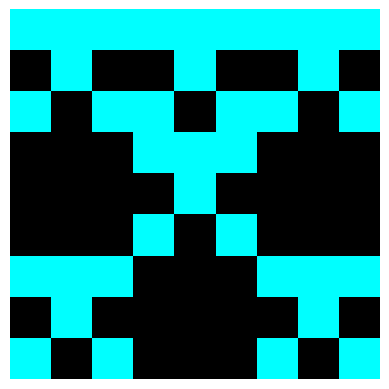

Processing Puzzle id:  810b9b61
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0, 1], [0, 3, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1], [0, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0], [0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 1], [0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [0, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0, 1], [0, 3, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1], [0, 3, 3, 3, 3, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0], [0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 1], [0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 

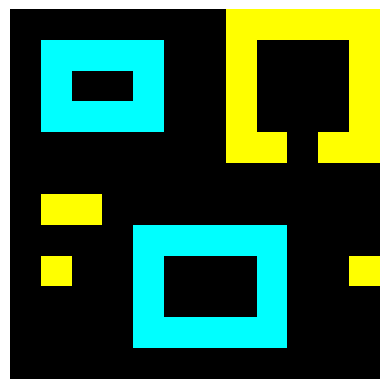

Processing Puzzle id:  82819916
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 1, 2, 1, 2, 1, 1, 2, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [8, 8, 3, 8, 3, 8, 3, 3, 8, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 4, 1, 4, 1, 4, 4, 1, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6, 6, 8, 6, 8, 6, 8, 8, 6, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 6, 1, 6, 1, 6, 6, 1, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 1, 2, 1, 2, 1, 1, 2, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [8, 8, 3, 8, 3, 8, 3, 3, 8, 3], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 4, 1, 4, 1, 4, 4, 1, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6, 6, 8, 6, 8, 6, 8, 8, 6, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 6, 1, 6, 1, 6, 6, 1, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


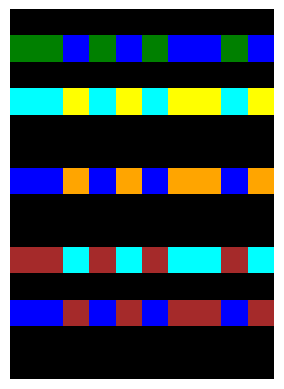

Processing Puzzle id:  83302e8f
extracting solution
[[[3, 3, 3, 5, 4, 4, 4, 5, 4, 4, 4, 5, 3, 3, 3, 5, 3, 3, 3, 5, 3, 3, 3, 5, 4, 4, 4], [3, 3, 3, 5, 4, 4, 4, 5, 4, 4, 4, 5, 3, 3, 3, 5, 3, 3, 3, 5, 3, 3, 3, 5, 4, 4, 4], [3, 3, 3, 5, 4, 4, 4, 4, 4, 4, 4, 5, 3, 3, 3, 5, 3, 3, 3, 5, 3, 3, 3, 5, 4, 4, 4], [5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4], [4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 3, 3, 3, 5, 4, 4, 4], [4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 3, 3, 3, 5, 4, 4, 4], [4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 3, 3, 3, 5, 4, 4, 4], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [3, 3, 3, 5, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 3, 3, 3, 5, 3, 3, 3, 5, 3, 3, 3], [3, 3, 3, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 3, 3, 3, 5, 3, 3, 3, 5, 3, 3, 3], [3, 3, 3, 5, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 3, 3, 3, 5, 3, 3, 3, 5, 3, 3, 3], [5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4,

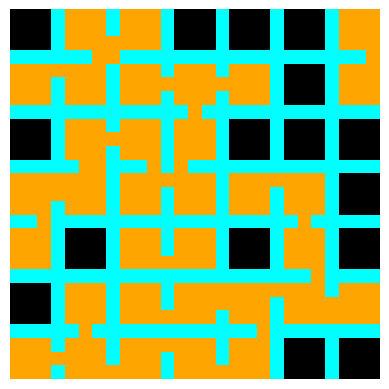

Processing Puzzle id:  834ec97d
extracting solution
[[[0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4], [0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4], [0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4], [0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4], [0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4], [0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4], [0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4], [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 

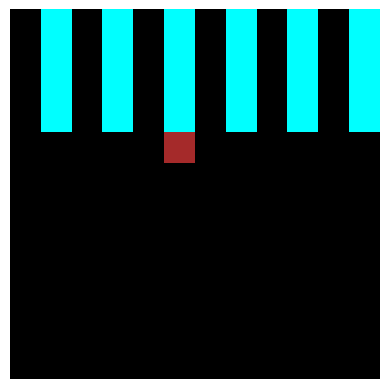

Processing Puzzle id:  8403a5d5
extracting solution
[[[0, 0, 1, 5, 1, 0, 1, 5, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 5, 1, 0, 1, 5]]]
creating Dataframe
creating destination path
[[0, 0, 1, 5, 1, 0, 1, 5, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 1, 0, 1, 5, 1, 0, 1, 5]]


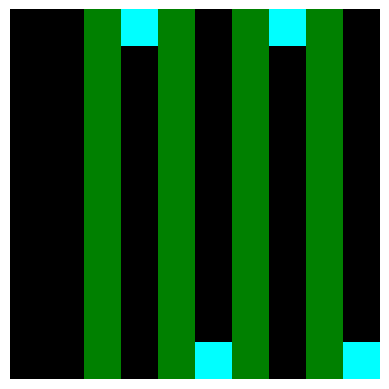

Processing Puzzle id:  846bdb03
extracting solution
[[[4, 0, 0, 0, 0, 0, 0, 4], [2, 0, 0, 2, 8, 0, 8, 8], [2, 2, 2, 2, 8, 8, 8, 8], [2, 0, 2, 0, 0, 0, 8, 8], [2, 2, 2, 0, 0, 0, 8, 8], [4, 0, 0, 0, 0, 0, 0, 4]]]
creating Dataframe
creating destination path
[[4, 0, 0, 0, 0, 0, 0, 4], [2, 0, 0, 2, 8, 0, 8, 8], [2, 2, 2, 2, 8, 8, 8, 8], [2, 0, 2, 0, 0, 0, 8, 8], [2, 2, 2, 0, 0, 0, 8, 8], [4, 0, 0, 0, 0, 0, 0, 4]]


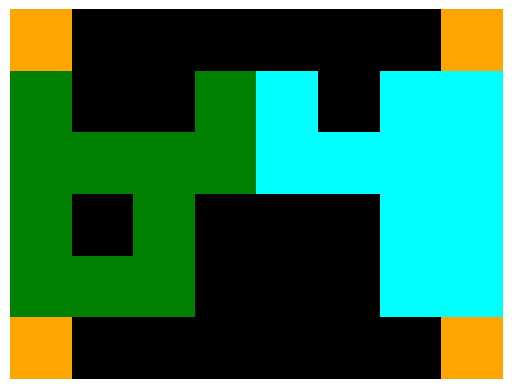

Processing Puzzle id:  855e0971
extracting solution
[[[8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8], [8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8], [8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8], [8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8], [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4], [2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]]
creating Dataframe
creating destination path
[[8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8], [8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8], [8, 8,

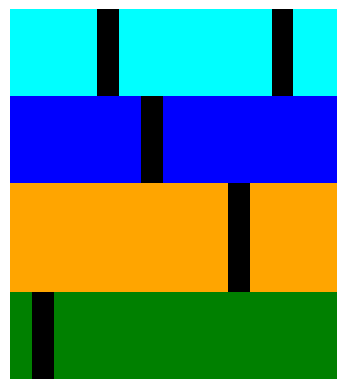

Processing Puzzle id:  85c4e7cd
extracting solution
[[[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5], [5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5], [5, 6, 7, 3, 3, 3, 3, 3, 3, 3, 3, 7, 6, 5], [5, 6, 7, 3, 4, 4, 4, 4, 4, 4, 3, 7, 6, 5], [5, 6, 7, 3, 4, 2, 2, 2, 2, 4, 3, 7, 6, 5], [5, 6, 7, 3, 4, 2, 8, 8, 2, 4, 3, 7, 6, 5], [5, 6, 7, 3, 4, 2, 8, 8, 2, 4, 3, 7, 6, 5], [5, 6, 7, 3, 4, 2, 2, 2, 2, 4, 3, 7, 6, 5], [5, 6, 7, 3, 4, 4, 4, 4, 4, 4, 3, 7, 6, 5], [5, 6, 7, 3, 3, 3, 3, 3, 3, 3, 3, 7, 6, 5], [5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5], [5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]]
creating Dataframe
creating destination path
[[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5], [5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5], [5, 6, 7, 3, 3, 3, 3, 3, 3, 3, 3, 7, 6, 5], [5, 6, 7, 3, 4, 4, 4, 4, 4, 4, 3, 7, 6, 5], [5, 6, 7, 3, 4, 2, 2, 2, 2, 4, 3, 7, 6, 5], [5, 6, 7, 3, 4, 2, 

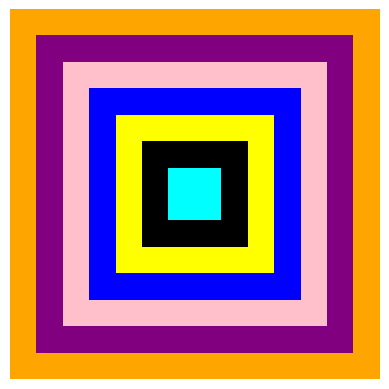

Processing Puzzle id:  868de0fa
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 7, 7, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 7, 7, 7, 1, 0, 0, 0], [0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 7, 7, 7, 1, 0, 0, 0], [0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], [0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1], [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1], [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1], [0, 1, 7, 7, 7, 7, 7, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1], [0, 1, 7, 7, 7, 7, 7, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1], [0, 1, 7, 7, 7, 7, 7, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1], [0, 1, 7, 7, 7, 

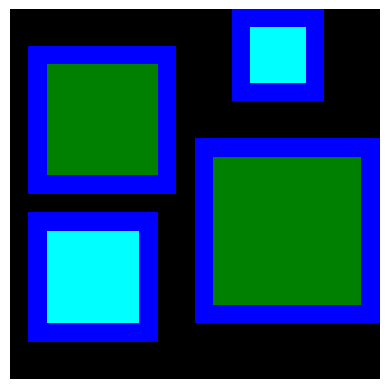

Processing Puzzle id:  8731374e
extracting solution
[[[8, 8, 1, 8, 8, 8, 1, 8], [8, 8, 1, 8, 8, 8, 1, 8], [1, 1, 1, 1, 1, 1, 1, 1], [8, 8, 1, 8, 8, 8, 1, 8], [8, 8, 1, 8, 8, 8, 1, 8], [1, 1, 1, 1, 1, 1, 1, 1], [8, 8, 1, 8, 8, 8, 1, 8], [8, 8, 1, 8, 8, 8, 1, 8], [8, 8, 1, 8, 8, 8, 1, 8], [8, 8, 1, 8, 8, 8, 1, 8]]]
creating Dataframe
creating destination path
[[8, 8, 1, 8, 8, 8, 1, 8], [8, 8, 1, 8, 8, 8, 1, 8], [1, 1, 1, 1, 1, 1, 1, 1], [8, 8, 1, 8, 8, 8, 1, 8], [8, 8, 1, 8, 8, 8, 1, 8], [1, 1, 1, 1, 1, 1, 1, 1], [8, 8, 1, 8, 8, 8, 1, 8], [8, 8, 1, 8, 8, 8, 1, 8], [8, 8, 1, 8, 8, 8, 1, 8], [8, 8, 1, 8, 8, 8, 1, 8]]


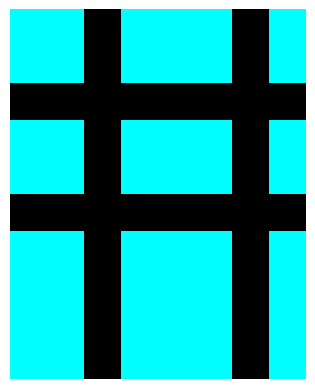

Processing Puzzle id:  88a10436
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0]]


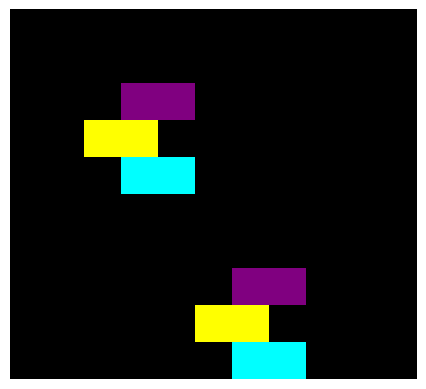

Processing Puzzle id:  88a62173
extracting solution
[[[5, 0], [0, 5]]]
creating Dataframe
creating destination path
[[5, 0], [0, 5]]


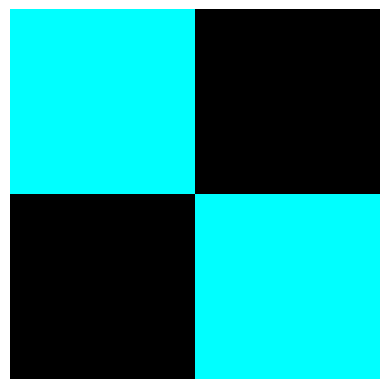

Processing Puzzle id:  890034e9
extracting solution
[[[0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2], [1, 1, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1], [1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1], [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 0, 1, 1, 1, 1], [0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 3, 0, 0, 3, 0, 1, 1, 1, 2], [1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 3, 0, 0, 3, 1, 0, 0, 2, 0], [0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 3, 0, 0, 3, 1, 0, 1, 1, 1], [1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 3, 0, 0, 3, 0, 1, 1, 1, 2], [1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 3, 0, 0, 3, 1, 1, 0, 1, 0], [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 1, 1, 0, 1], [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0], [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1], [1, 3, 3, 3, 3, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1], [2, 3, 0, 0, 3, 1, 0, 1, 0, 1, 0, 1,

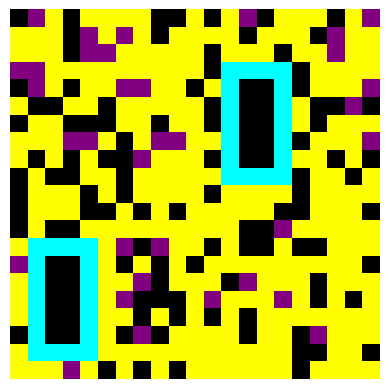

Processing Puzzle id:  8a004b2b
extracting solution
[[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0], [0, 0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0], [0, 0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0], [0, 0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [4, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 4]]]
creating Dataframe
creating destination path
[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0,

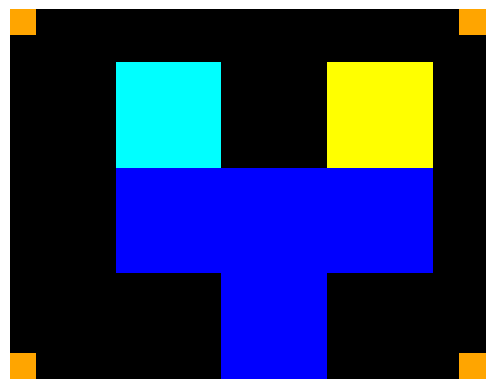

Processing Puzzle id:  8be77c9e
extracting solution
[[[0, 0, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 0]]


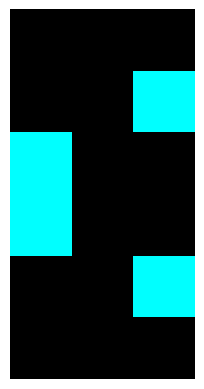

Processing Puzzle id:  8d5021e8
extracting solution
[[[3, 3, 3, 3], [0, 3, 3, 0], [3, 3, 3, 3], [3, 3, 3, 3], [0, 3, 3, 0], [3, 3, 3, 3], [3, 3, 3, 3], [0, 3, 3, 0], [3, 3, 3, 3]]]
creating Dataframe
creating destination path
[[3, 3, 3, 3], [0, 3, 3, 0], [3, 3, 3, 3], [3, 3, 3, 3], [0, 3, 3, 0], [3, 3, 3, 3], [3, 3, 3, 3], [0, 3, 3, 0], [3, 3, 3, 3]]


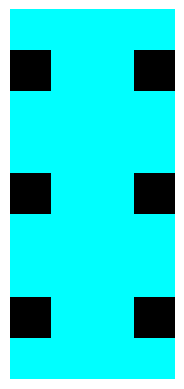

Processing Puzzle id:  8d510a79
extracting solution
[[[0, 0, 0, 1, 0, 0, 1, 0, 0, 0], [0, 2, 0, 1, 0, 0, 1, 0, 2, 0], [0, 2, 0, 0, 0, 0, 1, 0, 2, 0], [0, 2, 0, 0, 0, 0, 0, 0, 2, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [2, 0, 0, 0, 0, 2, 0, 0, 0, 0], [2, 0, 0, 0, 0, 2, 0, 0, 0, 0], [2, 0, 1, 0, 0, 2, 0, 0, 0, 0], [2, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 1, 0, 0, 1, 0, 0, 0], [0, 2, 0, 1, 0, 0, 1, 0, 2, 0], [0, 2, 0, 0, 0, 0, 1, 0, 2, 0], [0, 2, 0, 0, 0, 0, 0, 0, 2, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [2, 0, 0, 0, 0, 2, 0, 0, 0, 0], [2, 0, 0, 0, 0, 2, 0, 0, 0, 0], [2, 0, 1, 0, 0, 2, 0, 0, 0, 0], [2, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 0]]


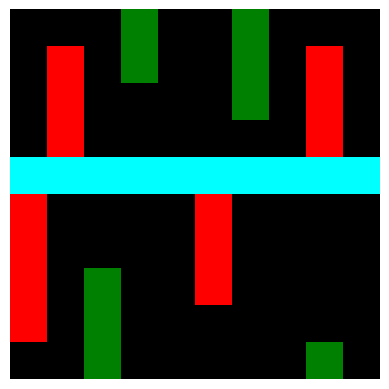

Processing Puzzle id:  8e1813be
extracting solution
[[[2, 2, 2, 2, 2, 2, 2], [3, 3, 3, 3, 3, 3, 3], [8, 8, 8, 8, 8, 8, 8], [4, 4, 4, 4, 4, 4, 4], [6, 6, 6, 6, 6, 6, 6], [1, 1, 1, 1, 1, 1, 1], [7, 7, 7, 7, 7, 7, 7]]]
creating Dataframe
creating destination path
[[2, 2, 2, 2, 2, 2, 2], [3, 3, 3, 3, 3, 3, 3], [8, 8, 8, 8, 8, 8, 8], [4, 4, 4, 4, 4, 4, 4], [6, 6, 6, 6, 6, 6, 6], [1, 1, 1, 1, 1, 1, 1], [7, 7, 7, 7, 7, 7, 7]]


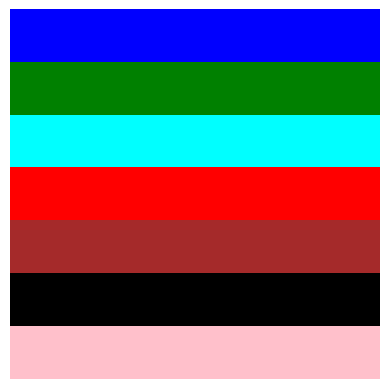

Processing Puzzle id:  8e5a5113
extracting solution
[[[3, 3, 9, 5, 2, 9, 3, 5, 9, 9, 2], [9, 9, 9, 5, 9, 9, 3, 5, 9, 9, 9], [2, 9, 9, 5, 9, 9, 9, 5, 9, 3, 3]]]
creating Dataframe
creating destination path
[[3, 3, 9, 5, 2, 9, 3, 5, 9, 9, 2], [9, 9, 9, 5, 9, 9, 3, 5, 9, 9, 9], [2, 9, 9, 5, 9, 9, 9, 5, 9, 3, 3]]


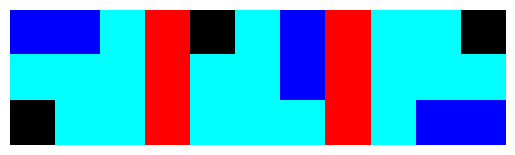

Processing Puzzle id:  8eb1be9a
extracting solution
[[[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]]]
creating Dataframe
creating destination path
[[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1

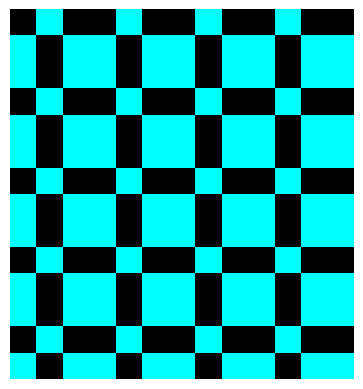

Processing Puzzle id:  8efcae92
extracting solution
[[[1, 1, 1, 1, 2, 1, 1, 2, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 2, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 2, 1, 1, 2, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 2, 1, 2, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 2, 1, 1], [1, 1, 2, 1, 2, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]]
creating Dataframe
creating destination path
[[1, 1, 1, 1, 2, 1, 1, 2, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 2, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 2, 1, 1, 2, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 2, 1, 2, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 2, 1, 1], [1, 1, 2, 1, 2, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


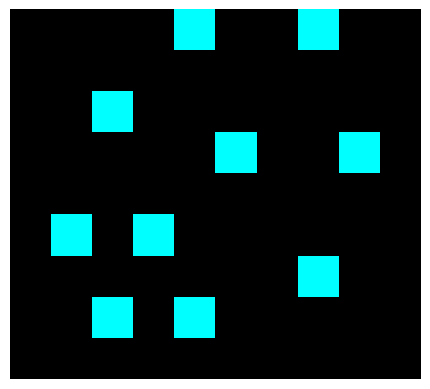

Processing Puzzle id:  8f2ea7aa
extracting solution
[[[2, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 0, 0, 0, 0, 0, 0], [2, 0, 0, 2, 0, 0, 0, 0, 0], [2, 2, 0, 2, 2, 0, 0, 0, 0], [0, 2, 2, 0, 2, 2, 0, 0, 0], [0, 0, 0, 2, 0, 0, 2, 0, 0], [0, 0, 0, 2, 2, 0, 2, 2, 0], [0, 0, 0, 0, 2, 2, 0, 2, 2]]]
creating Dataframe
creating destination path
[[2, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 0, 0, 0, 0, 0, 0], [2, 0, 0, 2, 0, 0, 0, 0, 0], [2, 2, 0, 2, 2, 0, 0, 0, 0], [0, 2, 2, 0, 2, 2, 0, 0, 0], [0, 0, 0, 2, 0, 0, 2, 0, 0], [0, 0, 0, 2, 2, 0, 2, 2, 0], [0, 0, 0, 0, 2, 2, 0, 2, 2]]


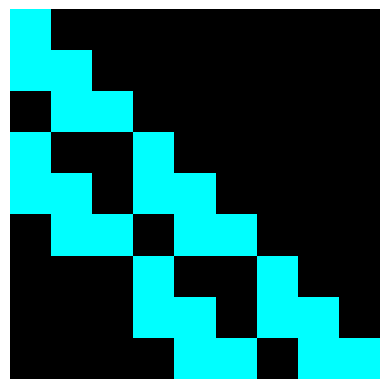

Processing Puzzle id:  90c28cc7
extracting solution
[[[2, 4, 1], [8, 3, 8], [2, 4, 2]]]
creating Dataframe
creating destination path
[[2, 4, 1], [8, 3, 8], [2, 4, 2]]


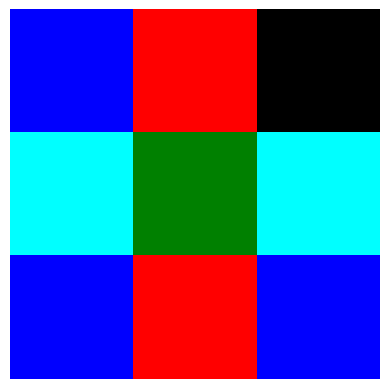

Processing Puzzle id:  90f3ed37
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 8, 8, 8, 8, 8, 8, 8, 8], [8, 8, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 1, 1, 1, 1, 1], [8, 8, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 8, 8, 8, 8, 8, 8, 8, 8], [8, 8, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 1, 1, 1, 1, 1], [8, 8, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0,

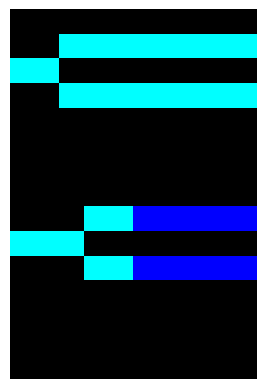

Processing Puzzle id:  913fb3ed
extracting solution
[[[6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 8, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

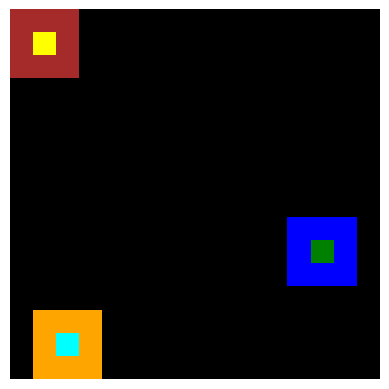

Processing Puzzle id:  91413438
extracting solution
[[[0, 0, 8, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

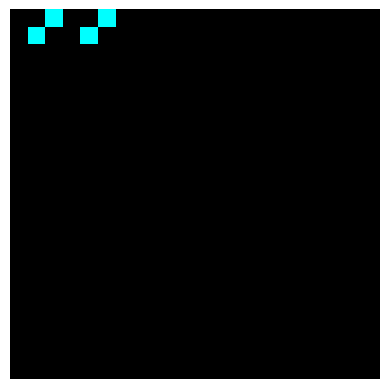

Processing Puzzle id:  91714a58
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

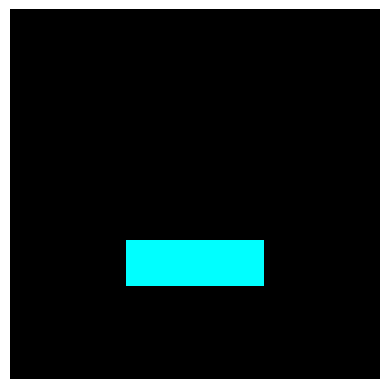

Processing Puzzle id:  9172f3a0
extracting solution
[[[0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 6, 6, 6], [0, 0, 0, 0, 0, 0, 6, 6, 6], [0, 0, 0, 0, 0, 0, 6, 6, 6], [6, 6, 6, 1, 1, 1, 0, 0, 0], [6, 6, 6, 1, 1, 1, 0, 0, 0], [6, 6, 6, 1, 1, 1, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 6, 6, 6], [0, 0, 0, 0, 0, 0, 6, 6, 6], [0, 0, 0, 0, 0, 0, 6, 6, 6], [6, 6, 6, 1, 1, 1, 0, 0, 0], [6, 6, 6, 1, 1, 1, 0, 0, 0], [6, 6, 6, 1, 1, 1, 0, 0, 0]]


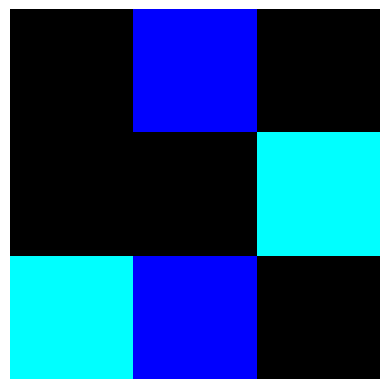

Processing Puzzle id:  928ad970
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 8, 0, 8, 8, 8, 8, 0, 0, 8, 0, 0, 0], [0, 0, 5, 8, 0, 8, 0, 0, 8, 0, 0, 8, 0, 0, 0], [0, 0, 0, 8, 0, 8, 8, 8, 8, 0, 0, 8, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 5, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0], [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0,

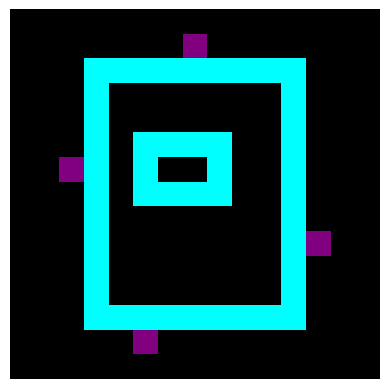

Processing Puzzle id:  93b581b8
extracting solution
[[[0, 0, 0, 0, 0, 0], [5, 5, 0, 0, 2, 2], [5, 5, 0, 0, 2, 2], [0, 0, 3, 1, 0, 0], [0, 0, 2, 5, 0, 0], [1, 1, 0, 0, 3, 3]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0], [5, 5, 0, 0, 2, 2], [5, 5, 0, 0, 2, 2], [0, 0, 3, 1, 0, 0], [0, 0, 2, 5, 0, 0], [1, 1, 0, 0, 3, 3]]


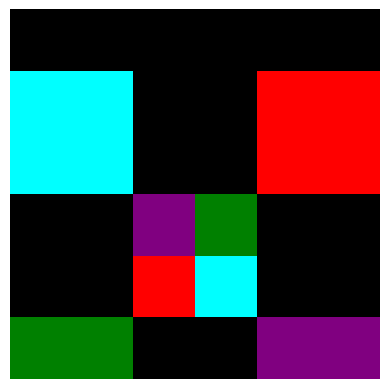

Processing Puzzle id:  941d9a10
extracting solution
[[[1, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 2, 2, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 3]]]
creating Dataframe
creating destination path
[[1, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 2, 2, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 0], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [0, 5, 0, 5, 0, 0, 5, 0, 5, 3]]


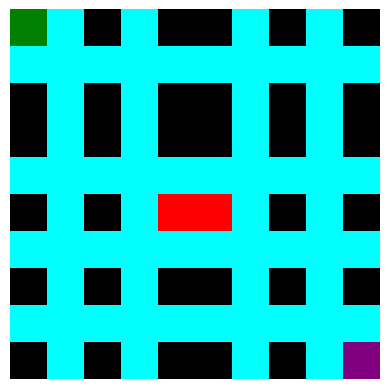

Processing Puzzle id:  94f9d214
extracting solution
[[[2, 0, 0, 0], [0, 0, 0, 0], [2, 0, 2, 0], [0, 0, 0, 2]]]
creating Dataframe
creating destination path
[[2, 0, 0, 0], [0, 0, 0, 0], [2, 0, 2, 0], [0, 0, 0, 2]]


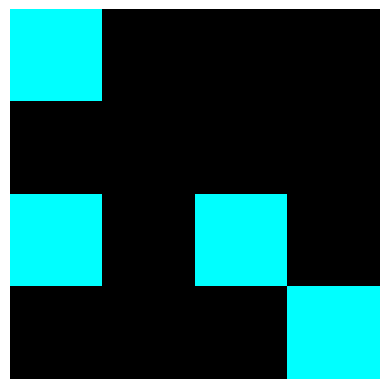

Processing Puzzle id:  952a094c
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0, 0, 0, 8, 0], [0, 0, 3, 3, 3, 3, 3, 3, 0, 0], [0, 0, 3, 0, 0, 0, 0, 3, 0, 0], [0, 0, 3, 0, 0, 0, 0, 3, 0, 0], [0, 0, 3, 0, 0, 0, 0, 3, 0, 0], [0, 0, 3, 3, 3, 3, 3, 3, 0, 0], [0, 4, 0, 0, 0, 0, 0, 0, 6, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0, 0, 0, 8, 0], [0, 0, 3, 3, 3, 3, 3, 3, 0, 0], [0, 0, 3, 0, 0, 0, 0, 3, 0, 0], [0, 0, 3, 0, 0, 0, 0, 3, 0, 0], [0, 0, 3, 0, 0, 0, 0, 3, 0, 0], [0, 0, 3, 3, 3, 3, 3, 3, 0, 0], [0, 4, 0, 0, 0, 0, 0, 0, 6, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


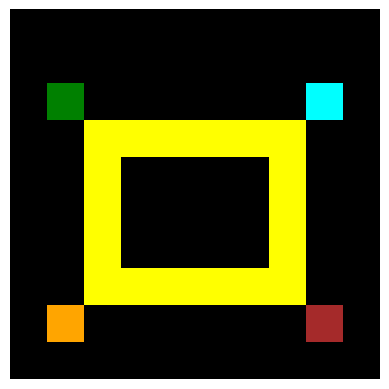

Processing Puzzle id:  9565186b
extracting solution
[[[5, 3, 5], [3, 3, 5], [5, 3, 5]]]
creating Dataframe
creating destination path
[[5, 3, 5], [3, 3, 5], [5, 3, 5]]


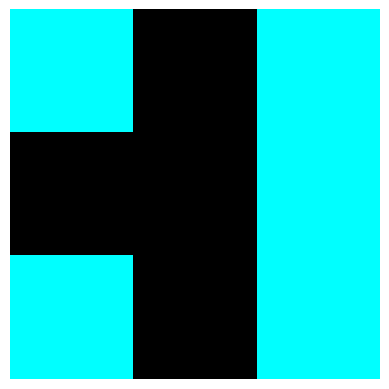

Processing Puzzle id:  95990924
extracting solution
[[[1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0], [0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0], [0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0], [3, 0, 0, 4, 1, 0, 0, 2, 0, 0, 3, 0, 0, 4, 0], [0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 1, 0, 0, 2], [0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 5, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4], [0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 5, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0], [0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0], [0, 3, 0, 0, 4, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0], [0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0], [0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0], [3, 0, 0, 4, 1, 0, 0, 2, 0, 0, 3, 0, 0, 4, 0], [0, 0,

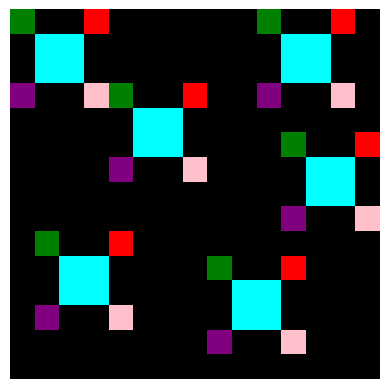

Processing Puzzle id:  963e52fc
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1], [3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1], [3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


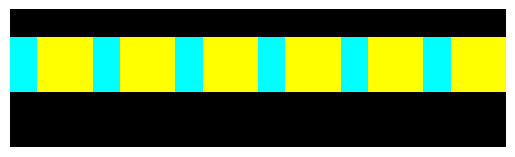

Processing Puzzle id:  97999447
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 5, 3, 5, 3], [0, 0, 4, 5, 4, 5, 4, 5], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 5, 8, 5], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 5, 2, 5, 2], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 5, 3, 5, 3], [0, 0, 4, 5, 4, 5, 4, 5], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 5, 8, 5], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 5, 2, 5, 2], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]


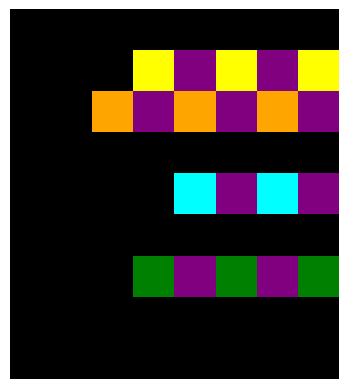

Processing Puzzle id:  97a05b5b
extracting solution
[[[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1], [2, 2, 8, 8, 3, 3, 2, 2, 2, 1, 2, 1], [2, 2, 2, 8, 3, 2, 2, 2, 2, 1, 1, 1], [2, 8, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2]]]
creating Dataframe
creating destination path
[[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1], [2, 2, 8, 8, 3, 3, 2, 2, 2, 1, 2, 1], [2, 2, 2, 8, 3, 2, 2, 2, 2, 1, 1, 1], [2, 8, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2]]


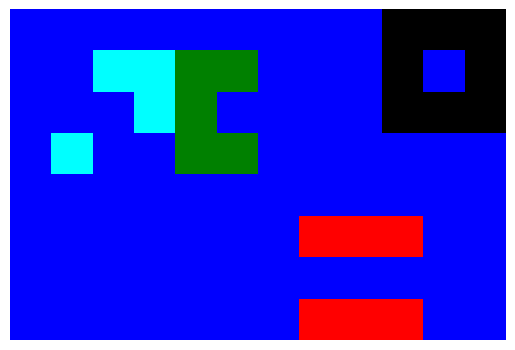

Processing Puzzle id:  98cf29f8
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 3, 3, 3, 3, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0], [0, 3, 3, 3, 3, 3, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0], [0, 3, 3, 3, 3, 3, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0], [0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 3, 3, 3, 3, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0]

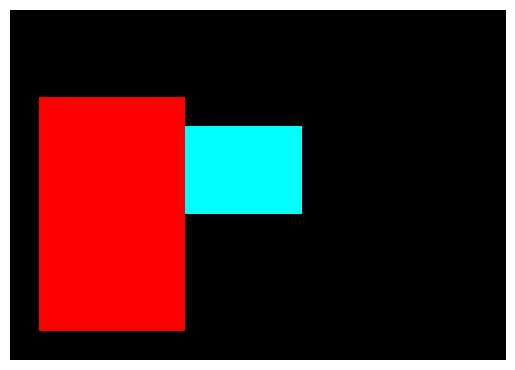

Processing Puzzle id:  995c5fa3
extracting solution
[[[4, 4, 4], [3, 3, 3], [8, 8, 8]]]
creating Dataframe
creating destination path
[[4, 4, 4], [3, 3, 3], [8, 8, 8]]


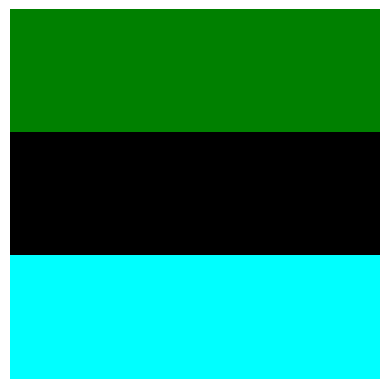

Processing Puzzle id:  99b1bc43
extracting solution
[[[0, 3, 3, 0], [0, 3, 0, 3], [3, 0, 3, 3], [3, 3, 3, 0]]]
creating Dataframe
creating destination path
[[0, 3, 3, 0], [0, 3, 0, 3], [3, 0, 3, 3], [3, 3, 3, 0]]


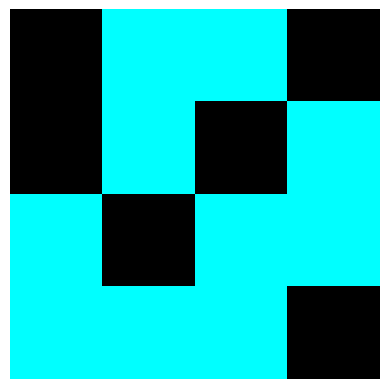

Processing Puzzle id:  99fa7670
extracting solution
[[[0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 0, 0, 8], [0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 0, 0, 0, 7], [0, 0, 0, 0, 0, 2, 2, 2], [0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 0, 2]]]
creating Dataframe
creating destination path
[[0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 0, 0, 8], [0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 0, 0, 0, 7], [0, 0, 0, 0, 0, 2, 2, 2], [0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 0, 2]]


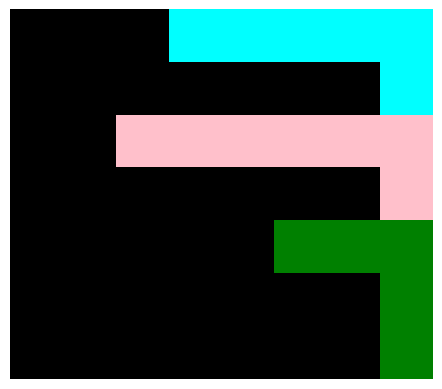

Processing Puzzle id:  9aec4887
extracting solution
[[[0, 1, 1, 1, 1, 1, 0], [2, 8, 1, 0, 1, 8, 4], [2, 2, 0, 1, 8, 0, 4], [2, 0, 2, 8, 4, 4, 4], [2, 0, 0, 3, 0, 0, 4], [2, 8, 3, 0, 3, 8, 4], [0, 3, 3, 3, 3, 3, 0]]]
creating Dataframe
creating destination path
[[0, 1, 1, 1, 1, 1, 0], [2, 8, 1, 0, 1, 8, 4], [2, 2, 0, 1, 8, 0, 4], [2, 0, 2, 8, 4, 4, 4], [2, 0, 0, 3, 0, 0, 4], [2, 8, 3, 0, 3, 8, 4], [0, 3, 3, 3, 3, 3, 0]]


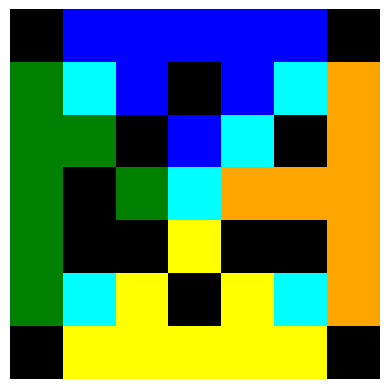

Processing Puzzle id:  9af7a82c
extracting solution
[[[1, 8, 2, 3, 4], [1, 8, 2, 3, 0], [1, 8, 2, 0, 0], [1, 8, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[1, 8, 2, 3, 4], [1, 8, 2, 3, 0], [1, 8, 2, 0, 0], [1, 8, 0, 0, 0], [1, 0, 0, 0, 0], [1, 0, 0, 0, 0]]


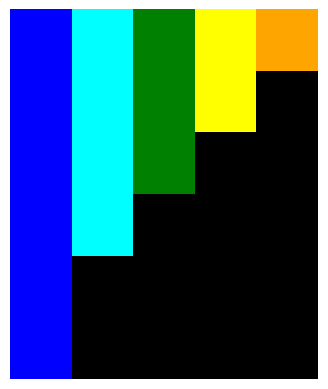

Processing Puzzle id:  9d9215db
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 4, 0, 8, 0, 8, 0, 8, 0, 4, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 4, 0, 8, 0, 8, 0, 8, 0, 4, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0], [0

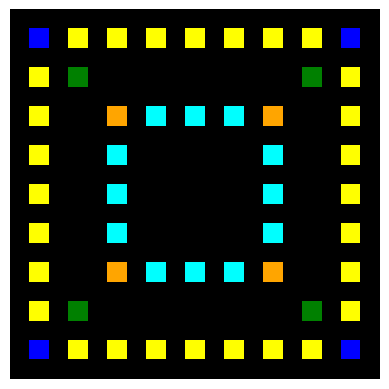

Processing Puzzle id:  9dfd6313
extracting solution
[[[5, 0, 3, 0, 2, 2], [0, 5, 3, 0, 0, 0], [0, 0, 5, 0, 8, 6], [0, 0, 0, 5, 8, 0], [0, 0, 0, 0, 5, 0], [0, 0, 0, 0, 0, 5]]]
creating Dataframe
creating destination path
[[5, 0, 3, 0, 2, 2], [0, 5, 3, 0, 0, 0], [0, 0, 5, 0, 8, 6], [0, 0, 0, 5, 8, 0], [0, 0, 0, 0, 5, 0], [0, 0, 0, 0, 0, 5]]


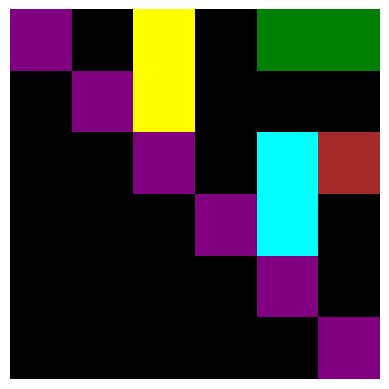

Processing Puzzle id:  9ecd008a
extracting solution
[[[7, 1, 5], [1, 5, 5], [5, 5, 9]]]
creating Dataframe
creating destination path
[[7, 1, 5], [1, 5, 5], [5, 5, 9]]


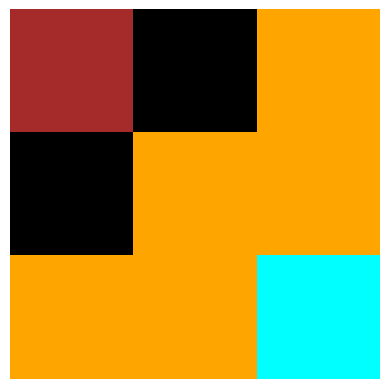

Processing Puzzle id:  9edfc990
extracting solution
[[[0, 0, 0, 8, 0, 5, 1, 1, 9, 0, 6, 0, 0, 0, 0, 5], [6, 7, 6, 0, 4, 0, 2, 1, 1, 8, 3, 6, 2, 0, 0, 0], [0, 0, 0, 7, 0, 0, 5, 4, 1, 1, 1, 7, 6, 0, 0, 0], [0, 5, 8, 0, 9, 0, 0, 2, 2, 1, 8, 0, 4, 0, 0, 7], [4, 1, 1, 4, 2, 2, 7, 3, 2, 1, 6, 4, 9, 9, 9, 0], [1, 1, 8, 0, 5, 1, 1, 1, 2, 1, 1, 8, 1, 9, 6, 6], [9, 9, 1, 2, 8, 1, 1, 3, 1, 1, 2, 1, 1, 5, 8, 0], [1, 3, 1, 1, 6, 1, 1, 1, 1, 8, 1, 1, 1, 4, 0, 0], [1, 1, 4, 1, 7, 4, 1, 1, 4, 1, 1, 5, 8, 1, 4, 0], [1, 1, 1, 6, 0, 6, 1, 1, 1, 1, 1, 8, 1, 1, 4, 4], [1, 9, 1, 1, 9, 1, 1, 1, 1, 1, 1, 5, 1, 6, 0, 0], [6, 1, 7, 5, 9, 1, 7, 1, 1, 1, 4, 6, 1, 2, 8, 0], [5, 1, 1, 1, 1, 1, 2, 4, 8, 1, 1, 3, 1, 9, 0, 8], [1, 1, 1, 2, 4, 1, 1, 1, 1, 7, 1, 1, 1, 1, 5, 0], [6, 9, 1, 1, 7, 7, 1, 1, 2, 1, 1, 9, 1, 1, 3, 0], [1, 8, 3, 1, 1, 9, 7, 1, 2, 7, 2, 0, 8, 9, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 8, 0, 5, 1, 1, 9, 0, 6, 0, 0, 0, 0, 5], [6, 7, 6, 0, 4, 0, 2, 1, 1, 8, 3, 6, 2, 0, 0, 0],

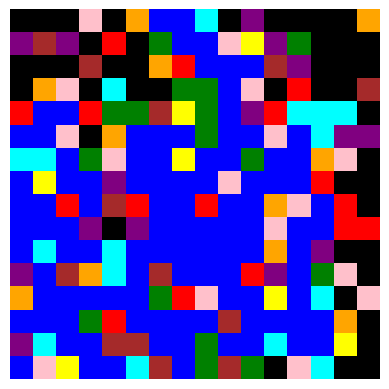

Processing Puzzle id:  9f236235
extracting solution
[[[1, 1, 3, 1], [0, 0, 3, 0], [2, 0, 3, 2], [0, 0, 3, 0]]]
creating Dataframe
creating destination path
[[1, 1, 3, 1], [0, 0, 3, 0], [2, 0, 3, 2], [0, 0, 3, 0]]


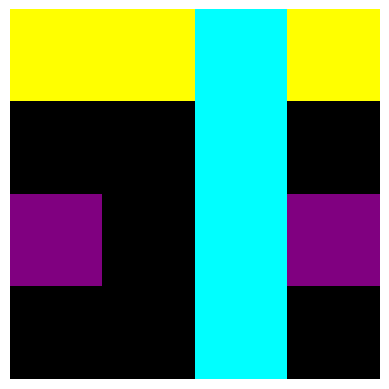

Processing Puzzle id:  a1570a43
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0], [3, 0, 0, 0, 0, 0, 3, 0], [0, 2, 0, 0, 0, 0, 0, 0], [0, 2, 2, 0, 0, 0, 0, 0], [0, 2, 2, 2, 0, 0, 0, 0], [0, 2, 2, 2, 2, 2, 0, 0], [0, 2, 0, 0, 0, 0, 0, 0], [3, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0], [3, 0, 0, 0, 0, 0, 3, 0], [0, 2, 0, 0, 0, 0, 0, 0], [0, 2, 2, 0, 0, 0, 0, 0], [0, 2, 2, 2, 0, 0, 0, 0], [0, 2, 2, 2, 2, 2, 0, 0], [0, 2, 0, 0, 0, 0, 0, 0], [3, 0, 0, 0, 0, 0, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]


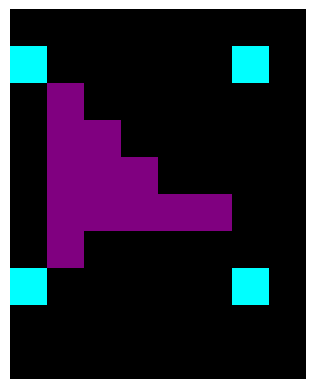

Processing Puzzle id:  a2fd1cf0
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 

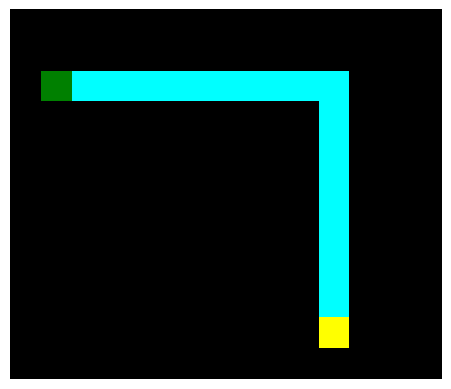

Processing Puzzle id:  a3325580
extracting solution
[[[5, 2, 1], [5, 2, 1], [5, 2, 1], [5, 2, 1]]]
creating Dataframe
creating destination path
[[5, 2, 1], [5, 2, 1], [5, 2, 1], [5, 2, 1]]


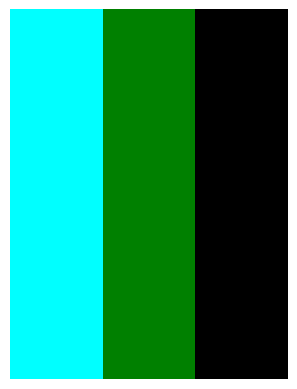

Processing Puzzle id:  a3df8b1e
extracting solution
[[[0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0]]


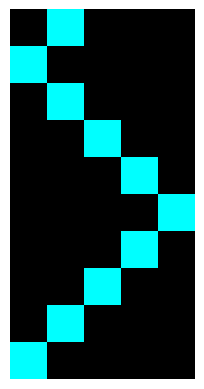

Processing Puzzle id:  a416b8f3
extracting solution
[[[4, 0, 0, 0, 4, 0, 0, 0], [4, 5, 0, 0, 4, 5, 0, 0], [0, 5, 6, 0, 0, 5, 6, 0], [6, 6, 1, 0, 6, 6, 1, 0], [0, 0, 0, 1, 0, 0, 0, 1]]]
creating Dataframe
creating destination path
[[4, 0, 0, 0, 4, 0, 0, 0], [4, 5, 0, 0, 4, 5, 0, 0], [0, 5, 6, 0, 0, 5, 6, 0], [6, 6, 1, 0, 6, 6, 1, 0], [0, 0, 0, 1, 0, 0, 0, 1]]


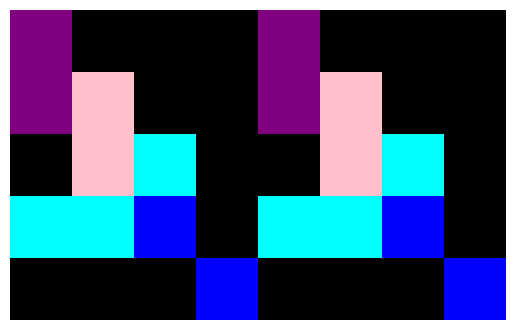

Processing Puzzle id:  a48eeaf7
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 5, 0, 0, 0, 0, 0], [0, 0, 2, 2, 5, 0, 0, 0, 0, 0], [0, 0, 2, 2, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 5, 0, 0, 0, 0, 0], [0, 0, 2, 2, 5, 0, 0, 0, 0, 0], [0, 0, 2, 2, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


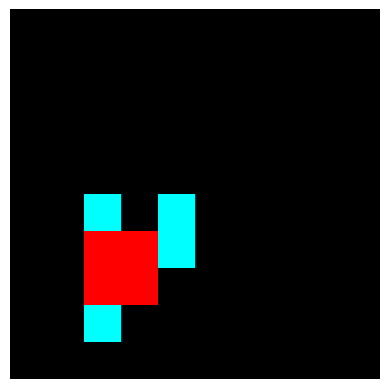

Processing Puzzle id:  a5313dff
extracting solution
[[[0, 0, 2, 2, 2, 2, 2, 0, 0], [0, 0, 2, 1, 1, 1, 2, 0, 0], [0, 0, 2, 1, 1, 1, 2, 0, 0], [2, 2, 2, 2, 2, 2, 2, 0, 0], [2, 1, 1, 1, 2, 0, 0, 0, 0], [2, 1, 2, 1, 2, 0, 0, 0, 0], [2, 1, 1, 1, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 2, 2, 2, 2, 2, 0, 0], [0, 0, 2, 1, 1, 1, 2, 0, 0], [0, 0, 2, 1, 1, 1, 2, 0, 0], [2, 2, 2, 2, 2, 2, 2, 0, 0], [2, 1, 1, 1, 2, 0, 0, 0, 0], [2, 1, 2, 1, 2, 0, 0, 0, 0], [2, 1, 1, 1, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0]]


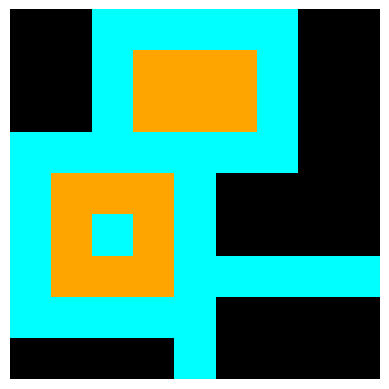

Processing Puzzle id:  a5f85a15
extracting solution
[[[0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0], [6, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0, 4, 0, 0, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 0, 0], [0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 6, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4], [6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 6, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0], [6, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0, 4, 0, 0, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 0, 0], [0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 6, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4], [6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 

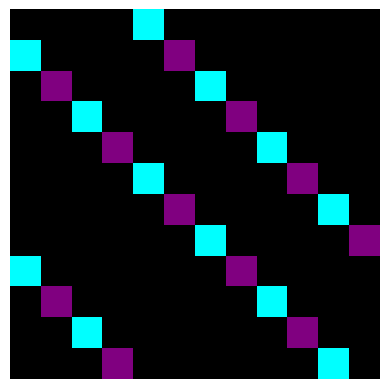

Processing Puzzle id:  a61ba2ce
extracting solution
[[[3, 3, 8, 8], [3, 0, 0, 8], [1, 0, 0, 6], [1, 1, 6, 6]]]
creating Dataframe
creating destination path
[[3, 3, 8, 8], [3, 0, 0, 8], [1, 0, 0, 6], [1, 1, 6, 6]]


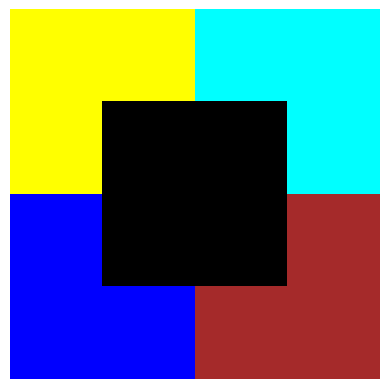

Processing Puzzle id:  a61f2674
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 2, 0, 0, 0, 0, 0, 1, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 2, 0, 0, 0, 0, 0, 1, 0]]


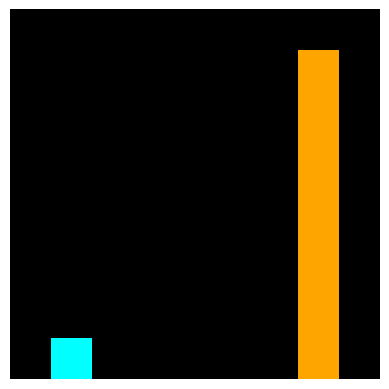

Processing Puzzle id:  a64e4611
extracting solution
[[[0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 3, 3, 0, 4, 4, 4, 4, 4, 0, 3, 0, 4, 0, 4, 4, 4, 0, 0, 0], [4, 4, 4, 0, 0, 4, 4, 0, 0, 0, 0, 3, 3, 0, 0, 4, 4, 0, 4, 0, 3, 0, 0, 0, 0, 4, 4, 0, 4, 4], [0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0, 3, 3, 0, 0, 4, 0, 4, 4, 0, 3, 0, 4, 4, 0, 0, 4, 0, 0, 4], [4, 0, 0, 0, 4, 4, 4, 0, 4, 0, 0, 3, 3, 0, 4, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 4], [4, 0, 4, 4, 4, 0, 4, 0, 0, 4, 0, 3, 3, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 4, 0, 4, 4, 0, 4, 0], [0, 0, 4, 0, 4, 0, 0, 0, 4, 4, 0, 3, 3, 0, 4, 0, 0, 4, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0], [4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 3, 3, 0, 4, 0, 4, 4, 0, 0, 3, 0, 4, 0, 0, 4, 4, 0, 4, 4], [0, 4, 0, 4, 4, 4, 0, 4, 0, 0, 0, 3, 3, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0], [0, 0, 4, 0, 0, 0, 4, 4, 4, 0, 0, 3, 3, 0, 4, 4, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 4, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3, 3, 3, 3, 3, 3, 3, 3, 3

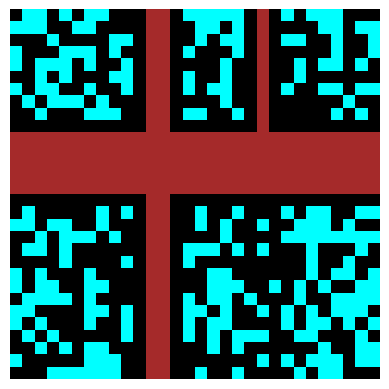

Processing Puzzle id:  a65b410d
extracting solution
[[[3, 3, 3, 3, 3, 3, 3, 0, 0], [3, 3, 3, 3, 3, 3, 0, 0, 0], [2, 2, 2, 2, 2, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[3, 3, 3, 3, 3, 3, 3, 0, 0], [3, 3, 3, 3, 3, 3, 0, 0, 0], [2, 2, 2, 2, 2, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


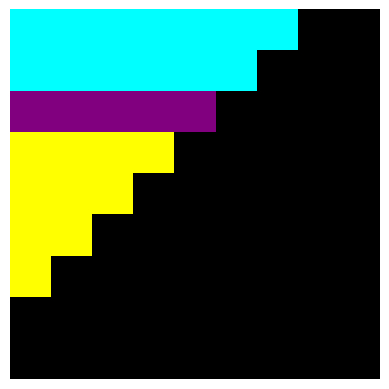

Processing Puzzle id:  a68b268e
extracting solution
[[[7, 7, 7, 8], [4, 7, 7, 4], [7, 7, 7, 7], [7, 8, 4, 8]]]
creating Dataframe
creating destination path
[[7, 7, 7, 8], [4, 7, 7, 4], [7, 7, 7, 7], [7, 8, 4, 8]]


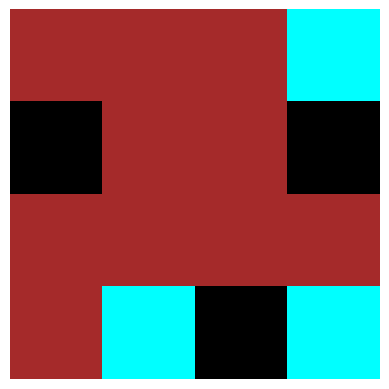

Processing Puzzle id:  a699fb00
extracting solution
[[[0, 1, 2, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 2, 1, 2, 1, 2, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 2, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 2, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 1, 2, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 2, 1, 2, 1, 2, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 2, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 2, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


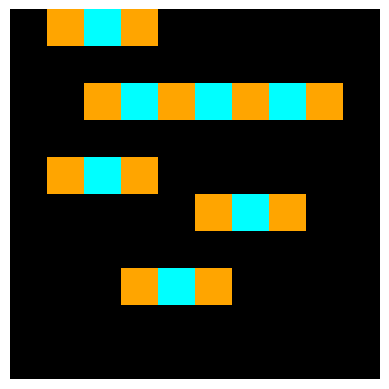

Processing Puzzle id:  a740d043
extracting solution
[[[0, 2], [2, 3]]]
creating Dataframe
creating destination path
[[0, 2], [2, 3]]


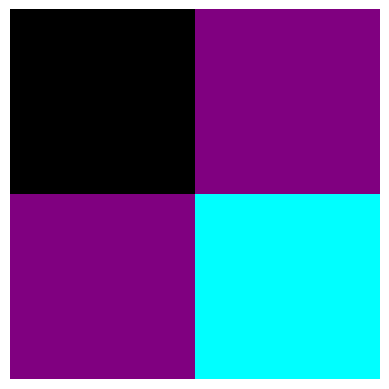

Processing Puzzle id:  a78176bb
extracting solution
[[[0, 1, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 1, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]]


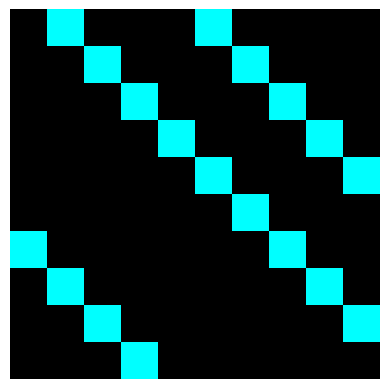

Processing Puzzle id:  a79310a0
extracting solution
[[[0, 0, 0, 0, 0], [0, 0, 2, 0, 0], [0, 2, 2, 0, 0], [0, 0, 2, 0, 0], [0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0], [0, 0, 2, 0, 0], [0, 2, 2, 0, 0], [0, 0, 2, 0, 0], [0, 0, 0, 0, 0]]


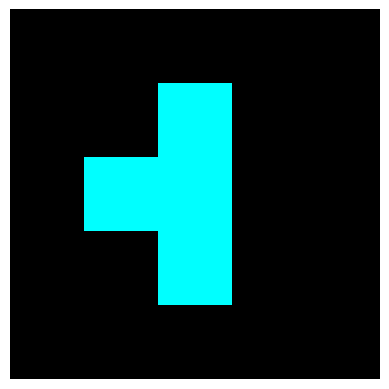

Processing Puzzle id:  a85d4709
extracting solution
[[[3, 3, 3], [2, 2, 2], [4, 4, 4]]]
creating Dataframe
creating destination path
[[3, 3, 3], [2, 2, 2], [4, 4, 4]]


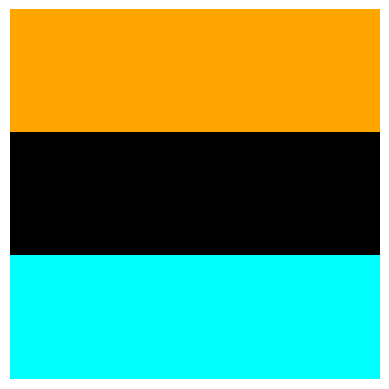

Processing Puzzle id:  a87f7484
extracting solution
[[[6, 0, 6], [6, 6, 0], [6, 0, 6]]]
creating Dataframe
creating destination path
[[6, 0, 6], [6, 6, 0], [6, 0, 6]]


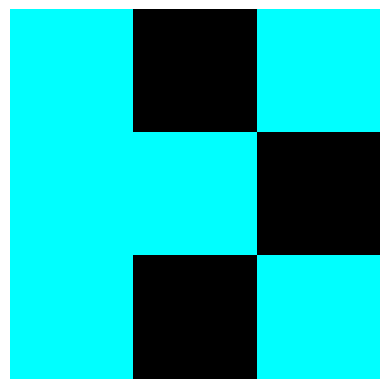

Processing Puzzle id:  a8c38be5
extracting solution
[[[3, 3, 5, 2, 2, 2, 5, 4, 4], [3, 5, 5, 5, 2, 5, 5, 5, 4], [5, 5, 5, 5, 5, 5, 5, 5, 5], [1, 5, 5, 5, 5, 5, 5, 5, 1], [1, 1, 5, 5, 5, 5, 5, 1, 1], [1, 5, 5, 5, 5, 5, 5, 5, 1], [5, 5, 5, 5, 5, 5, 5, 5, 5], [6, 5, 5, 5, 8, 5, 5, 5, 7], [6, 6, 5, 8, 8, 8, 5, 7, 7]]]
creating Dataframe
creating destination path
[[3, 3, 5, 2, 2, 2, 5, 4, 4], [3, 5, 5, 5, 2, 5, 5, 5, 4], [5, 5, 5, 5, 5, 5, 5, 5, 5], [1, 5, 5, 5, 5, 5, 5, 5, 1], [1, 1, 5, 5, 5, 5, 5, 1, 1], [1, 5, 5, 5, 5, 5, 5, 5, 1], [5, 5, 5, 5, 5, 5, 5, 5, 5], [6, 5, 5, 5, 8, 5, 5, 5, 7], [6, 6, 5, 8, 8, 8, 5, 7, 7]]


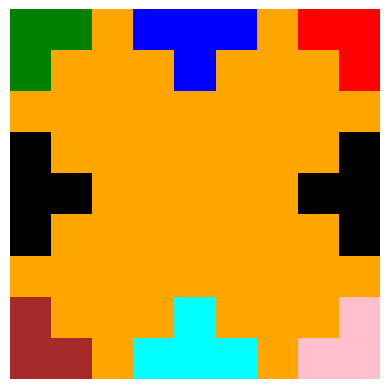

Processing Puzzle id:  a8d7556c
extracting solution
[[[2, 2, 0, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 5, 5, 5, 0, 0], [2, 2, 5, 5, 0, 5, 0, 5, 2, 2, 0, 5, 5, 5, 5, 0, 5, 5], [5, 0, 0, 0, 5, 5, 0, 5, 2, 2, 5, 0, 5, 0, 5, 5, 0, 5], [0, 5, 5, 5, 0, 5, 5, 0, 5, 5, 0, 2, 2, 5, 5, 0, 5, 5], [5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 5, 2, 2, 0, 0, 5, 5, 5], [0, 5, 5, 5, 5, 0, 5, 5, 5, 0, 5, 2, 2, 5, 5, 0, 5, 0], [5, 5, 0, 5, 5, 5, 5, 5, 5, 0, 0, 5, 0, 0, 5, 0, 5, 5], [5, 5, 5, 5, 0, 0, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 5, 0], [5, 0, 5, 0, 0, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0], [0, 0, 0, 0, 5, 0, 0, 0, 5, 5, 5, 5, 0, 0, 5, 0, 5, 5], [5, 0, 5, 5, 0, 5, 5, 5, 0, 0, 5, 0, 5, 5, 5, 5, 5, 0], [0, 0, 0, 5, 5, 0, 5, 0, 0, 5, 5, 0, 5, 5, 5, 5, 5, 5], [0, 5, 5, 5, 5, 0, 0, 5, 0, 0, 0, 5, 5, 5, 5, 5, 0, 5], [5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 2, 2, 5], [5, 5, 0, 5, 5, 5, 0, 5, 0, 5, 5, 5, 5, 0, 5, 2, 2, 5], [5, 0, 5, 5, 5, 5, 0, 5, 5, 0, 0, 0, 5, 5, 5, 5, 0, 5], [0, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5

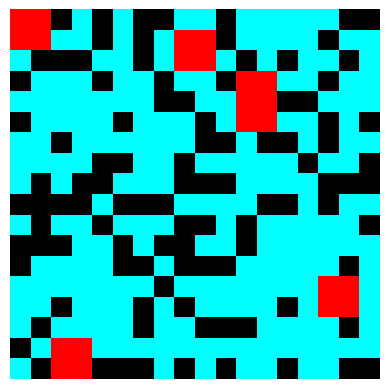

Processing Puzzle id:  a9f96cdd
extracting solution
[[[0, 0, 0, 3, 0], [0, 0, 0, 0, 0], [0, 0, 0, 8, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 3, 0], [0, 0, 0, 0, 0], [0, 0, 0, 8, 0]]


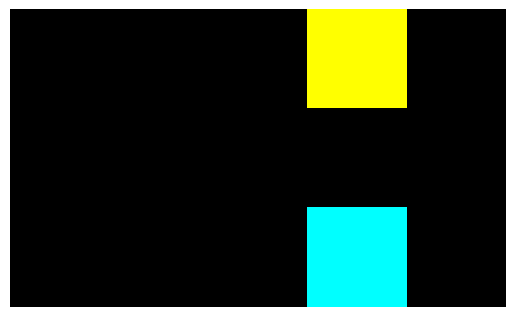

Processing Puzzle id:  aabf363d
extracting solution
[[[0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 2, 0, 0, 0], [0, 2, 2, 2, 2, 2, 0], [0, 0, 0, 2, 2, 0, 0], [0, 0, 2, 2, 0, 0, 0], [0, 0, 2, 2, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 2, 0, 0, 0], [0, 2, 2, 2, 2, 2, 0], [0, 0, 0, 2, 2, 0, 0], [0, 0, 2, 2, 0, 0, 0], [0, 0, 2, 2, 2, 0, 0], [0, 0, 0, 0, 0, 0, 0]]


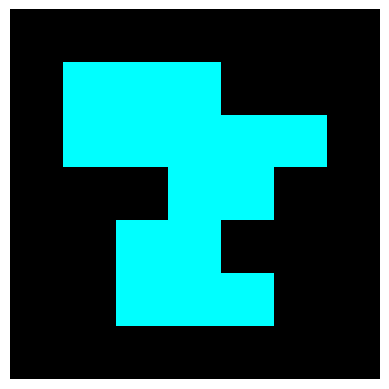

Processing Puzzle id:  aba27056
extracting solution
[[[0, 2, 2, 2, 2, 0, 4, 0, 0, 0], [0, 2, 4, 4, 2, 4, 0, 0, 0, 0], [0, 2, 4, 4, 4, 4, 4, 4, 4, 4], [0, 2, 4, 4, 4, 4, 4, 4, 4, 4], [0, 2, 4, 4, 4, 4, 4, 4, 4, 4], [0, 2, 4, 4, 4, 4, 4, 4, 4, 4], [0, 2, 4, 4, 4, 4, 4, 4, 4, 4], [0, 2, 4, 4, 2, 4, 0, 0, 0, 0], [0, 2, 2, 2, 2, 0, 4, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 4, 0, 0]]]
creating Dataframe
creating destination path
[[0, 2, 2, 2, 2, 0, 4, 0, 0, 0], [0, 2, 4, 4, 2, 4, 0, 0, 0, 0], [0, 2, 4, 4, 4, 4, 4, 4, 4, 4], [0, 2, 4, 4, 4, 4, 4, 4, 4, 4], [0, 2, 4, 4, 4, 4, 4, 4, 4, 4], [0, 2, 4, 4, 4, 4, 4, 4, 4, 4], [0, 2, 4, 4, 4, 4, 4, 4, 4, 4], [0, 2, 4, 4, 2, 4, 0, 0, 0, 0], [0, 2, 2, 2, 2, 0, 4, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 4, 0, 0]]


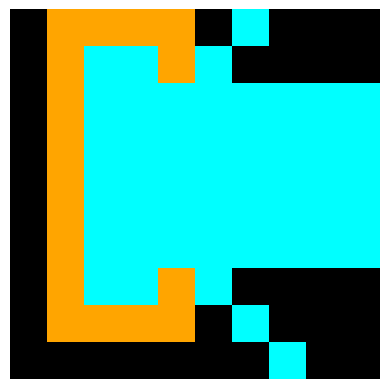

Processing Puzzle id:  ac0a08a4
extracting solution
[[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 9, 9, 9, 9, 6, 6, 6, 6], [0, 0, 0, 0, 9, 9, 9, 9, 6, 6, 6, 6], [0, 0, 0, 0, 9, 9, 9, 9, 6, 6, 6, 6], [0, 0, 0, 0, 9, 9, 9, 9, 6, 6, 6, 6], [8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 9, 9, 9, 9, 6, 6, 6, 6], [0, 0, 0, 0, 9, 9, 9, 9, 6, 6, 6, 6], [0, 0, 0, 0, 9, 9, 9, 9, 6, 6, 6, 6], [0, 0, 0, 0, 9, 9, 9, 9, 6, 6, 6, 6], [8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 0, 0, 0, 0, 

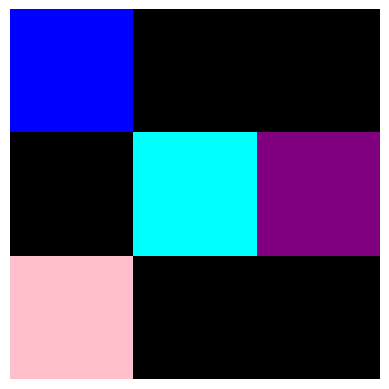

Processing Puzzle id:  ae3edfdc
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 7, 1, 7, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0], [0, 0,

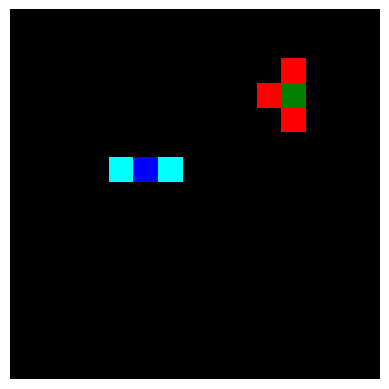

Processing Puzzle id:  ae4f1146
extracting solution
[[[1, 1, 8], [8, 1, 1], [1, 1, 8]]]
creating Dataframe
creating destination path
[[1, 1, 8], [8, 1, 1], [1, 1, 8]]


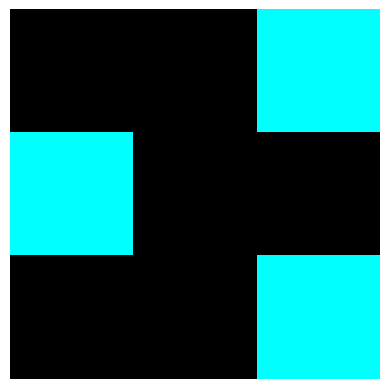

Processing Puzzle id:  aedd82e4
extracting solution
[[[2, 2, 0, 1], [0, 2, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 2, 2]]]
creating Dataframe
creating destination path
[[2, 2, 0, 1], [0, 2, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 2, 2]]


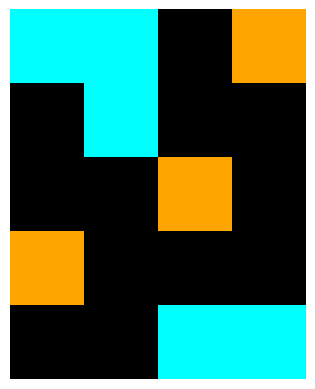

Processing Puzzle id:  af902bf9
extracting solution
[[[0, 0, 0, 0, 0, 4, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 2, 2, 2, 0], [0, 0, 0, 0, 0, 0, 2, 2, 2, 0], [0, 0, 0, 0, 0, 0, 2, 2, 2, 0], [0, 0, 0, 0, 0, 4, 0, 0, 0, 4], [4, 0, 0, 4, 0, 0, 0, 0, 0, 0], [0, 2, 2, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 0, 0, 0, 0, 0, 0, 0], [4, 0, 0, 4, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 4, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 2, 2, 2, 0], [0, 0, 0, 0, 0, 0, 2, 2, 2, 0], [0, 0, 0, 0, 0, 0, 2, 2, 2, 0], [0, 0, 0, 0, 0, 4, 0, 0, 0, 4], [4, 0, 0, 4, 0, 0, 0, 0, 0, 0], [0, 2, 2, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 0, 0, 0, 0, 0, 0, 0], [4, 0, 0, 4, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


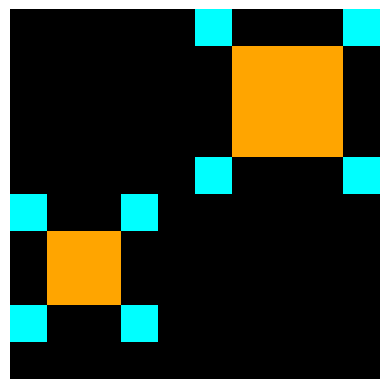

Processing Puzzle id:  b0c4d837
extracting solution
[[[8, 0, 0], [0, 0, 0], [0, 0, 0]]]
creating Dataframe
creating destination path
[[8, 0, 0], [0, 0, 0], [0, 0, 0]]


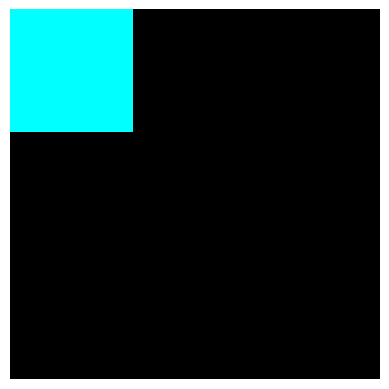

Processing Puzzle id:  b190f7f5
extracting solution
[[[0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], [3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], [3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0], [0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0], [3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3], [3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3], [3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3]]]
creating Dataframe
creating destination path
[[0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], [3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],

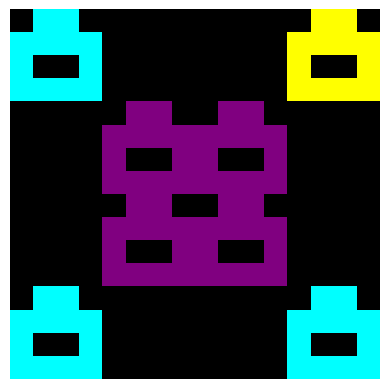

Processing Puzzle id:  b1948b0a
extracting solution
[[[2, 7, 7, 2], [2, 7, 2, 7], [7, 7, 7, 2], [7, 2, 7, 2]]]
creating Dataframe
creating destination path
[[2, 7, 7, 2], [2, 7, 2, 7], [7, 7, 7, 2], [7, 2, 7, 2]]


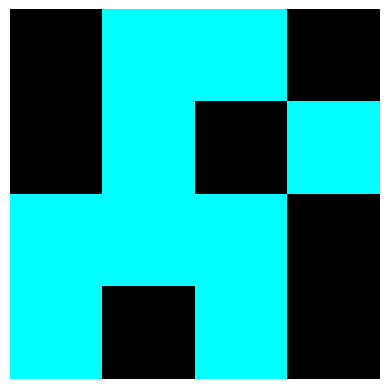

Processing Puzzle id:  b230c067
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 0, 0, 0, 1, 1, 1, 0], [0, 0, 2, 0, 0, 0, 0, 0, 1, 0], [0, 2, 0, 0, 0, 0, 0, 1, 0, 0], [0, 2, 2, 2, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 0, 0, 0, 1, 1, 1, 0], [0, 0, 2, 0, 0, 0, 0, 0, 1, 0], [0, 2, 0, 0, 0, 0, 0, 1, 0, 0], [0, 2, 2, 2, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1, 0, 0, 0]]


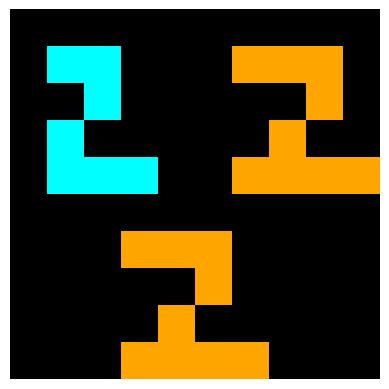

Processing Puzzle id:  b27ca6d3
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 2, 0, 2], [0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 2, 0, 0, 0], [0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3], [0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 3], [2, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 0, 0, 3, 3, 3], [0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 2, 0, 0, 0, 0], [0, 0, 2, 0, 2, 3, 3, 3, 3, 2, 3, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 3, 2, 2, 3, 3, 3, 2, 0, 2, 0, 0], [0, 0, 0, 2, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],

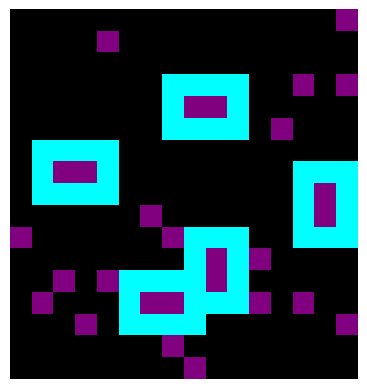

Processing Puzzle id:  b2862040
extracting solution
[[[1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9], [9, 9, 9, 8, 8, 8, 8, 8, 9, 9, 9, 1, 9, 9, 9], [9, 9, 9, 9, 8, 9, 9, 8, 9, 9, 9, 1, 9, 9, 9], [9, 9, 9, 9, 8, 9, 9, 8, 9, 9, 9, 1, 9, 9, 9], [9, 9, 9, 9, 8, 8, 8, 8, 9, 9, 9, 1, 9, 9, 1], [9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 1, 1, 1, 1], [1, 1, 1, 1, 9, 9, 9, 8, 9, 9, 9, 1, 9, 9, 1], [1, 9, 9, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1], [1, 9, 9, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 1], [1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [9, 9, 9, 8, 8, 8, 8, 8, 8, 9, 9, 9, 1, 1, 9], [9, 9, 9, 8, 9, 9, 9, 9, 8, 9, 9, 9, 9, 1, 9], [9, 9, 9, 8, 9, 9, 9, 9, 8, 9, 9, 9, 9, 1, 9], [9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 1, 9]]]
creating Dataframe
creating destination path
[[1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9], [9, 9, 9, 8, 8, 8, 8, 8, 9, 9, 9, 1, 9, 9, 9], [9, 9,

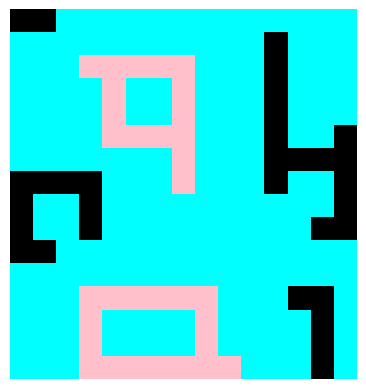

Processing Puzzle id:  b527c5c6
extracting solution
[[[0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0], [0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0], [0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0], [3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0], [3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0], [2, 2, 2, 2, 2, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0], [3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0], [3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0], [0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0], [0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0], [0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0], [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3], [0, 0, 0, 0, 0, 

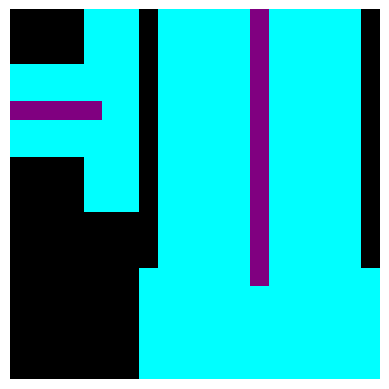

Processing Puzzle id:  b548a754
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 4, 4, 4, 6, 0, 0, 0, 0, 0

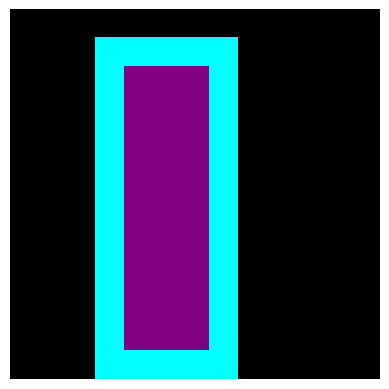

Processing Puzzle id:  b60334d2
extracting solution
[[[5, 1, 5, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0], [5, 1, 5, 5, 1, 5, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 5, 1, 5, 5, 1, 5], [0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 5, 1, 5, 0, 0, 5, 1, 5], [0, 1, 0, 1, 0, 0, 0, 0, 0], [0, 5, 1, 5, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[5, 1, 5, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0], [5, 1, 5, 5, 1, 5, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 5, 1, 5, 5, 1, 5], [0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 5, 1, 5, 0, 0, 5, 1, 5], [0, 1, 0, 1, 0, 0, 0, 0, 0], [0, 5, 1, 5, 0, 0, 0, 0, 0]]


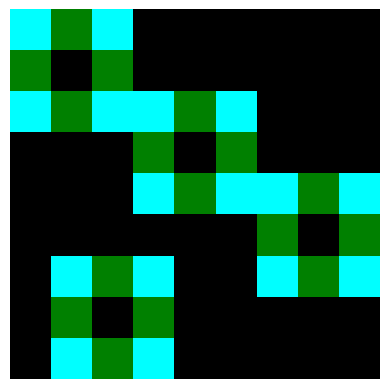

Processing Puzzle id:  b6afb2da
extracting solution
[[[0, 1, 4, 4, 1, 0, 0, 0, 0, 0], [0, 4, 2, 2, 4, 0, 0, 0, 0, 0], [0, 4, 2, 2, 4, 0, 0, 0, 0, 0], [0, 4, 2, 2, 4, 0, 0, 0, 0, 0], [0, 4, 2, 2, 4, 0, 0, 0, 0, 0], [0, 1, 4, 4, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 4, 4, 4, 4, 1], [0, 0, 0, 0, 4, 2, 2, 2, 2, 4], [0, 0, 0, 0, 1, 4, 4, 4, 4, 1]]]
creating Dataframe
creating destination path
[[0, 1, 4, 4, 1, 0, 0, 0, 0, 0], [0, 4, 2, 2, 4, 0, 0, 0, 0, 0], [0, 4, 2, 2, 4, 0, 0, 0, 0, 0], [0, 4, 2, 2, 4, 0, 0, 0, 0, 0], [0, 4, 2, 2, 4, 0, 0, 0, 0, 0], [0, 1, 4, 4, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 4, 4, 4, 4, 1], [0, 0, 0, 0, 4, 2, 2, 2, 2, 4], [0, 0, 0, 0, 1, 4, 4, 4, 4, 1]]


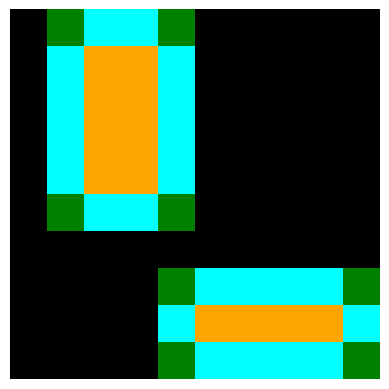

Processing Puzzle id:  b7249182
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 7, 0, 0, 0, 0, 0], [0, 0, 0, 7, 0, 0, 0, 0, 0], [0, 0, 0, 7, 0, 0, 0, 0, 0], [0, 0, 0, 7, 0, 0, 0, 0, 0], [0, 0, 0, 7, 0, 0, 0, 0, 0], [0, 0, 0, 7, 0, 0, 0, 0, 0], [0, 7, 7, 7, 7, 7, 0, 0, 0], [0, 7, 0, 0, 0, 7, 0, 0, 0], [0, 6, 0, 0, 0, 6, 0, 0, 0], [0, 6, 6, 6, 6, 6, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 7, 0, 0, 0, 0, 0], [0, 0, 0, 7, 0, 0, 0, 0, 0], [0, 0, 0, 7, 0, 0, 0, 0, 0], [0, 0, 0, 7, 0, 0, 0, 0, 0], [0, 0, 0, 7, 0, 0, 0, 0, 0], [0, 0, 0, 7, 0, 0, 0, 0, 0], [0, 7, 7, 7, 7, 7, 0, 0, 0], [0, 7, 0, 0, 0, 7, 0, 0, 0], [0, 6, 0, 0, 0, 6, 0, 0, 0], [0, 6, 6, 6, 6, 6, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 0, 0], 

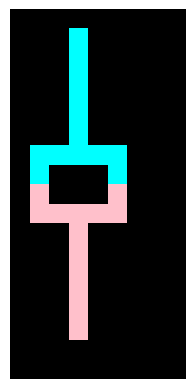

Processing Puzzle id:  b775ac94
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 8, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 8, 0, 8, 2, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 8, 8, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 4, 4, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 8, 8, 8, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0, 4, 3, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 8, 0, 0, 0, 0], [0, 0, 0, 0, 4, 4, 4, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

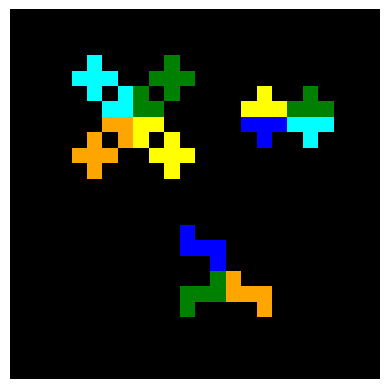

Processing Puzzle id:  b782dc8a
extracting solution
[[[8, 8, 4, 8, 0, 0, 8, 3, 4, 3, 4, 3, 4, 3, 4], [0, 8, 3, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8], [0, 8, 4, 3, 4, 3, 4, 3, 8, 0, 0, 0, 0, 0, 8], [0, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 0, 8, 8, 8], [0, 0, 0, 0, 0, 0, 8, 3, 4, 3, 8, 0, 8, 0, 0], [8, 8, 8, 8, 8, 0, 8, 8, 8, 4, 8, 0, 8, 0, 8], [4, 3, 4, 3, 8, 0, 0, 0, 8, 3, 8, 0, 8, 0, 8], [8, 8, 8, 4, 8, 8, 8, 0, 8, 4, 8, 0, 8, 8, 8], [0, 0, 8, 3, 4, 3, 8, 0, 8, 3, 8, 0, 0, 0, 0], [8, 0, 8, 8, 8, 4, 8, 8, 8, 4, 8, 8, 8, 0, 8], [8, 0, 0, 0, 8, 3, 4, 3, 4, 3, 4, 3, 8, 0, 8], [8, 8, 8, 0, 8, 4, 8, 8, 8, 8, 8, 8, 8, 0, 8], [4, 3, 8, 0, 8, 3, 8, 0, 0, 0, 0, 0, 0, 0, 8], [8, 4, 8, 8, 8, 4, 8, 0, 8, 8, 8, 8, 8, 8, 8], [8, 3, 4, 3, 4, 3, 8, 0, 8, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[8, 8, 4, 8, 0, 0, 8, 3, 4, 3, 4, 3, 4, 3, 4], [0, 8, 3, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8], [0, 8, 4, 3, 4, 3, 4, 3, 8, 0, 0, 0, 0, 0, 8], [0, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 0, 8, 8, 8], [0, 0,

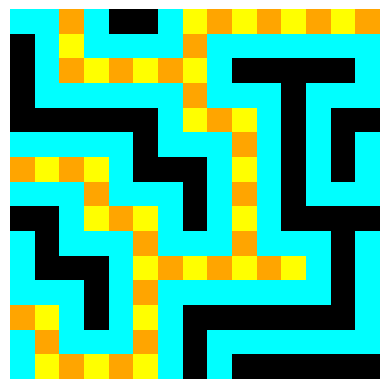

Processing Puzzle id:  b8825c91
extracting solution
[[[7, 7, 8, 1, 9, 8, 2, 6, 6, 2, 8, 9, 1, 8, 7, 7], [7, 1, 1, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 1, 1, 7], [8, 1, 6, 9, 2, 6, 6, 1, 1, 6, 6, 2, 9, 6, 1, 8], [1, 8, 9, 1, 6, 6, 1, 1, 1, 1, 6, 6, 1, 9, 8, 1], [9, 8, 2, 6, 8, 7, 6, 6, 6, 6, 7, 8, 6, 2, 8, 9], [8, 8, 6, 6, 7, 7, 6, 5, 5, 6, 7, 7, 6, 6, 8, 8], [2, 6, 6, 1, 6, 6, 5, 5, 5, 5, 6, 6, 1, 6, 6, 2], [6, 6, 1, 1, 6, 5, 5, 7, 7, 5, 5, 6, 1, 1, 6, 6], [6, 6, 1, 1, 6, 5, 5, 7, 7, 5, 5, 6, 1, 1, 6, 6], [2, 6, 6, 1, 6, 6, 5, 5, 5, 5, 6, 6, 1, 6, 6, 2], [8, 8, 6, 6, 7, 7, 6, 5, 5, 6, 7, 7, 6, 6, 8, 8], [9, 8, 2, 6, 8, 7, 6, 6, 6, 6, 7, 8, 6, 2, 8, 9], [1, 8, 9, 1, 6, 6, 1, 1, 1, 1, 6, 6, 1, 9, 8, 1], [8, 1, 6, 9, 2, 6, 6, 1, 1, 6, 6, 2, 9, 6, 1, 8], [7, 1, 1, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 1, 1, 7], [7, 7, 8, 1, 9, 8, 2, 6, 6, 2, 8, 9, 1, 8, 7, 7]]]
creating Dataframe
creating destination path
[[7, 7, 8, 1, 9, 8, 2, 6, 6, 2, 8, 9, 1, 8, 7, 7], [7, 1, 1, 8, 8, 8, 6, 6, 6, 6, 8, 8, 8, 1, 1, 7],

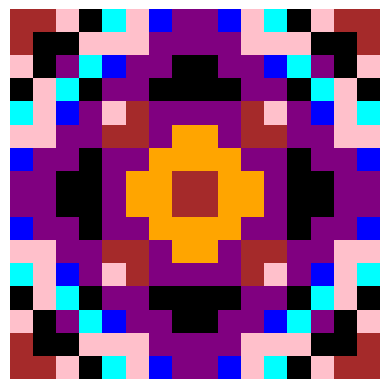

Processing Puzzle id:  b8cdaf2b
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 0, 2], [0, 2, 0, 0, 0, 0, 0, 2, 0], [0, 0, 2, 0, 0, 0, 2, 0, 0], [0, 0, 0, 8, 8, 8, 0, 0, 0], [8, 8, 8, 2, 2, 2, 8, 8, 8]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 0, 2], [0, 2, 0, 0, 0, 0, 0, 2, 0], [0, 0, 2, 0, 0, 0, 2, 0, 0], [0, 0, 0, 8, 8, 8, 0, 0, 0], [8, 8, 8, 2, 2, 2, 8, 8, 8]]


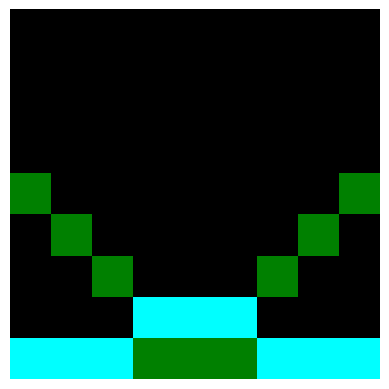

Processing Puzzle id:  b91ae062
extracting solution
[[[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 8, 8, 7, 7, 7, 7], [0, 0, 0, 0, 8, 8, 8, 8, 7, 7, 7, 7], [0, 0, 0, 0, 8, 8, 8, 8, 7, 7, 7, 7], [0, 0, 0, 0, 8, 8, 8, 8, 7, 7, 7, 7], [9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0], [9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0], [9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0], [9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 8, 8, 8, 8, 7, 7, 7, 7], [0, 0, 0, 0, 8, 8, 8, 8, 7, 7, 7, 7], [0, 0, 0, 0, 8, 8, 8, 8, 7, 7, 7, 7], [0, 0, 0, 0, 8, 8, 8, 8, 7, 7, 7, 7], [9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0], [9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0], [9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0], [9, 9, 9, 9, 9, 9, 9, 9, 

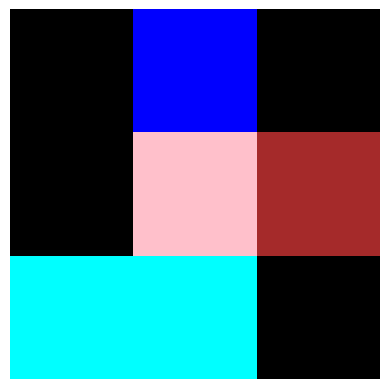

Processing Puzzle id:  b94a9452
extracting solution
[[[8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8], [8, 8, 3, 3, 8, 8], [8, 8, 3, 3, 8, 8], [8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8]]]
creating Dataframe
creating destination path
[[8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8], [8, 8, 3, 3, 8, 8], [8, 8, 3, 3, 8, 8], [8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8]]


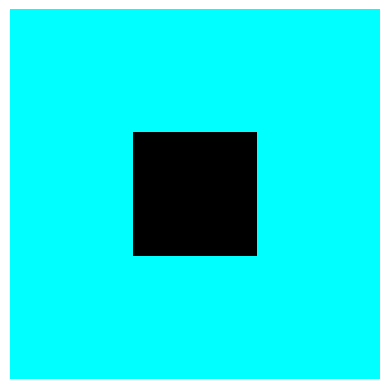

Processing Puzzle id:  b9b7f026
extracting solution
[[[7]]]
creating Dataframe
creating destination path
[[7]]


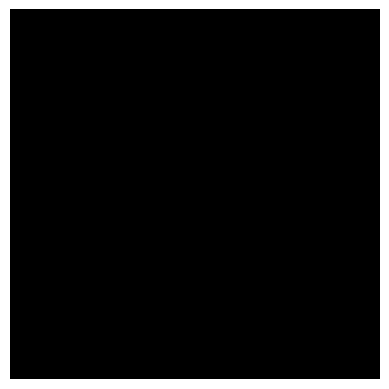

Processing Puzzle id:  ba26e723
extracting solution
[[[0, 4, 0, 6, 0, 4, 0, 4, 0, 6, 0, 4, 0, 4, 0, 6, 0], [6, 4, 4, 6, 4, 4, 6, 4, 4, 6, 4, 4, 6, 4, 4, 6, 4], [6, 0, 4, 0, 4, 0, 6, 0, 4, 0, 4, 0, 6, 0, 4, 0, 4]]]
creating Dataframe
creating destination path
[[0, 4, 0, 6, 0, 4, 0, 4, 0, 6, 0, 4, 0, 4, 0, 6, 0], [6, 4, 4, 6, 4, 4, 6, 4, 4, 6, 4, 4, 6, 4, 4, 6, 4], [6, 0, 4, 0, 4, 0, 6, 0, 4, 0, 4, 0, 6, 0, 4, 0, 4]]


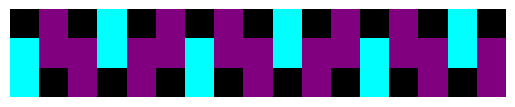

Processing Puzzle id:  ba97ae07
extracting solution
[[[0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0], [5, 5, 5, 5, 5, 5], [5, 5, 5, 5, 5, 5], [0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0], [5, 5, 5, 5, 5, 5], [5, 5, 5, 5, 5, 5], [0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0]]


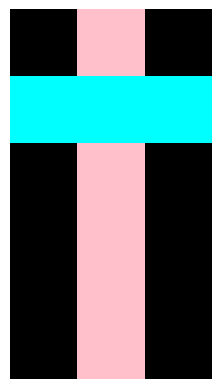

Processing Puzzle id:  bb43febb
extracting solution
[[[5, 5, 5, 5, 5, 5, 0, 0, 0, 0], [5, 2, 2, 2, 2, 5, 0, 0, 0, 0], [5, 5, 5, 5, 5, 5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 2, 2, 2, 2, 2, 5], [0, 0, 0, 5, 2, 2, 2, 2, 2, 5], [0, 0, 0, 5, 2, 2, 2, 2, 2, 5], [0, 0, 0, 5, 2, 2, 2, 2, 2, 5], [0, 0, 0, 5, 5, 5, 5, 5, 5, 5]]]
creating Dataframe
creating destination path
[[5, 5, 5, 5, 5, 5, 0, 0, 0, 0], [5, 2, 2, 2, 2, 5, 0, 0, 0, 0], [5, 5, 5, 5, 5, 5, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 5, 5, 5, 5, 5, 5, 5], [0, 0, 0, 5, 2, 2, 2, 2, 2, 5], [0, 0, 0, 5, 2, 2, 2, 2, 2, 5], [0, 0, 0, 5, 2, 2, 2, 2, 2, 5], [0, 0, 0, 5, 2, 2, 2, 2, 2, 5], [0, 0, 0, 5, 5, 5, 5, 5, 5, 5]]


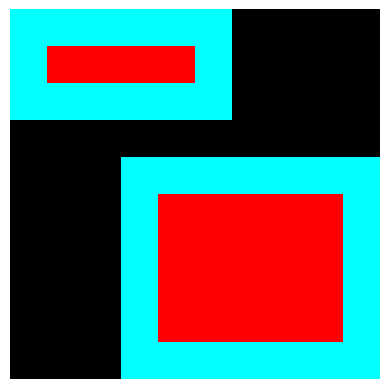

Processing Puzzle id:  bbc9ae5d
extracting solution
[[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]]


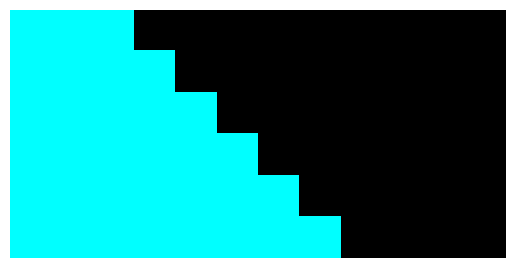

Processing Puzzle id:  bc1d5164
extracting solution
[[[0, 1, 1], [1, 0, 0], [0, 1, 1]]]
creating Dataframe
creating destination path
[[0, 1, 1], [1, 0, 0], [0, 1, 1]]


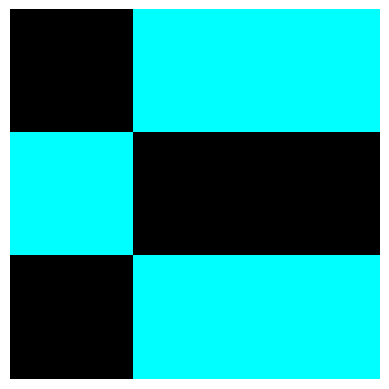

Processing Puzzle id:  bd4472b8
extracting solution
[[[1, 2, 3, 4, 8], [5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]]
creating Dataframe
creating destination path
[[1, 2, 3, 4, 8], [5, 5, 5, 5, 5], [1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8], [1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4], [8, 8, 8, 8, 8]]


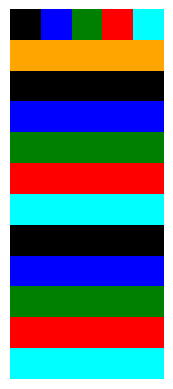

Processing Puzzle id:  bda2d7a6
extracting solution
[[[1, 1, 1, 1, 1, 1], [1, 9, 9, 9, 9, 1], [1, 9, 0, 0, 9, 1], [1, 9, 0, 0, 9, 1], [1, 9, 9, 9, 9, 1], [1, 1, 1, 1, 1, 1]], [[6, 6, 6, 6, 6, 6, 6, 6], [6, 3, 3, 3, 3, 3, 3, 6], [6, 3, 7, 7, 7, 7, 3, 6], [6, 3, 7, 6, 6, 7, 3, 6], [6, 3, 7, 6, 6, 7, 3, 6], [6, 3, 7, 7, 7, 7, 3, 6], [6, 3, 3, 3, 3, 3, 3, 6], [6, 6, 6, 6, 6, 6, 6, 6]]]
creating Dataframe
creating destination path
[[1, 1, 1, 1, 1, 1], [1, 9, 9, 9, 9, 1], [1, 9, 0, 0, 9, 1], [1, 9, 0, 0, 9, 1], [1, 9, 9, 9, 9, 1], [1, 1, 1, 1, 1, 1]]
[[6, 6, 6, 6, 6, 6, 6, 6], [6, 3, 3, 3, 3, 3, 3, 6], [6, 3, 7, 7, 7, 7, 3, 6], [6, 3, 7, 6, 6, 7, 3, 6], [6, 3, 7, 6, 6, 7, 3, 6], [6, 3, 7, 7, 7, 7, 3, 6], [6, 3, 3, 3, 3, 3, 3, 6], [6, 6, 6, 6, 6, 6, 6, 6]]


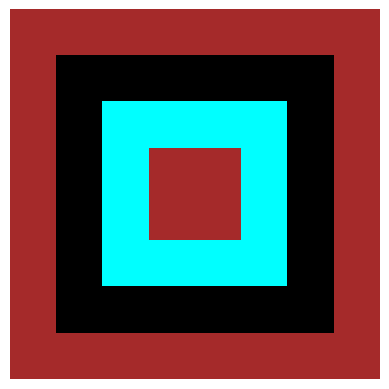

Processing Puzzle id:  bdad9b1f
extracting solution
[[[0, 0, 0, 8, 0, 0], [0, 0, 0, 8, 0, 0], [0, 0, 0, 8, 0, 0], [0, 0, 0, 8, 0, 0], [2, 2, 2, 4, 2, 2], [0, 0, 0, 8, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 8, 0, 0], [0, 0, 0, 8, 0, 0], [0, 0, 0, 8, 0, 0], [0, 0, 0, 8, 0, 0], [2, 2, 2, 4, 2, 2], [0, 0, 0, 8, 0, 0]]


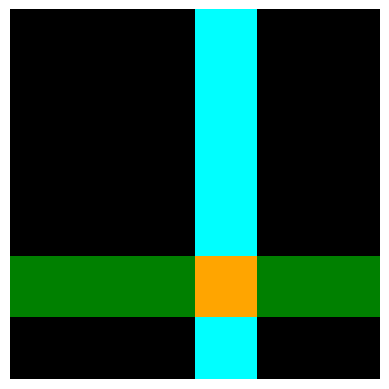

Processing Puzzle id:  be94b721
extracting solution
[[[3, 3, 3], [3, 3, 3], [3, 0, 3], [3, 0, 3]]]
creating Dataframe
creating destination path
[[3, 3, 3], [3, 3, 3], [3, 0, 3], [3, 0, 3]]


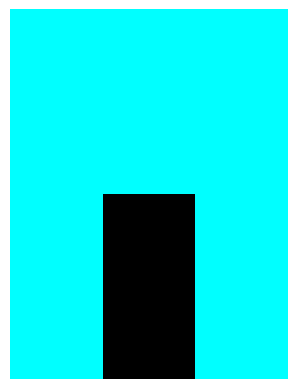

Processing Puzzle id:  beb8660c
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 9], [0, 0, 0, 0, 0, 0, 7, 7], [0, 0, 0, 0, 0, 6, 6, 6], [0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 4, 4, 4, 4, 4], [0, 0, 3, 3, 3, 3, 3, 3], [0, 2, 2, 2, 2, 2, 2, 2], [8, 8, 8, 8, 8, 8, 8, 8]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 9], [0, 0, 0, 0, 0, 0, 7, 7], [0, 0, 0, 0, 0, 6, 6, 6], [0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 4, 4, 4, 4, 4], [0, 0, 3, 3, 3, 3, 3, 3], [0, 2, 2, 2, 2, 2, 2, 2], [8, 8, 8, 8, 8, 8, 8, 8]]


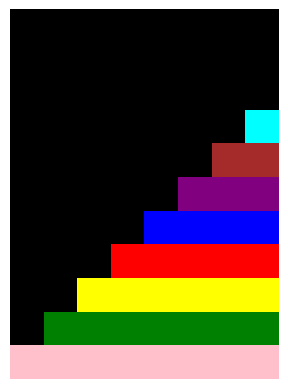

Processing Puzzle id:  c0f76784
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0], [0, 5, 8, 8, 8, 5, 0, 0, 0, 0, 0, 0], [0, 5, 8, 8, 8, 5, 0, 0, 0, 0, 0, 0], [0, 5, 8, 8, 8, 5, 0, 0, 5, 5, 5, 0], [0, 5, 5, 5, 5, 5, 0, 0, 5, 6, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 7, 7, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 7, 7, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0], [0, 5, 8, 8, 8, 5, 0, 0, 0, 0, 0, 0], [0, 5, 8, 8, 8, 5, 0, 0, 0, 0, 0, 0], [0, 5, 8, 8, 8, 5, 0, 0, 5, 5, 5, 0], [0, 5, 5, 5, 5, 5, 0, 0, 5, 6, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 7, 7, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 7, 7, 5, 0, 0, 0, 0], [0, 0, 0, 0, 5, 5, 5, 5, 

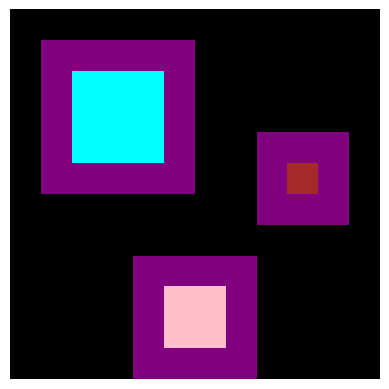

Processing Puzzle id:  c1d99e64
extracting solution
[[[4, 0, 4, 0, 4, 4, 2, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 2, 4, 0, 0], [4, 4, 4, 0, 0, 4, 2, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 2, 4, 0, 0], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [4, 0, 4, 4, 4, 0, 2, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 0], [4, 4, 0, 4, 4, 4, 2, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 2, 4, 4, 4], [4, 4, 4, 0, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 2, 4, 0, 4], [4, 0, 0, 4, 0, 4, 2, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 0, 4, 2, 4, 4, 4], [4, 4, 4, 4, 4, 0, 2, 4, 0, 4, 0, 0, 4, 4, 0, 0, 4, 4, 4, 0, 0, 2, 0, 4, 0], [0, 4, 4, 0, 4, 4, 2, 4, 4, 0, 4, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 2, 4, 0, 4], [4, 4, 4, 0, 4, 4, 2, 0, 4, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 4, 0, 2, 4, 4, 4], [4, 0, 4, 4, 4, 0, 2, 4, 0, 4, 4, 0, 4, 4, 0, 4, 4, 0, 4, 4, 0, 2, 0, 0, 4], [4, 4, 0, 4, 0, 0, 2, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 2, 4, 4, 4], [2, 2, 2, 2, 2, 2, 2, 

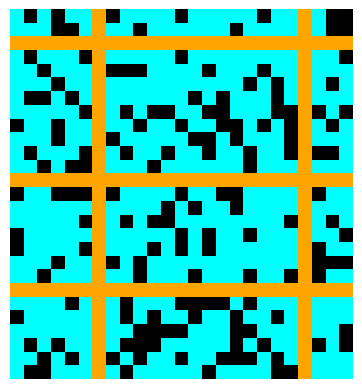

Processing Puzzle id:  c3e719e8
extracting solution
[[[1, 1, 7, 1, 1, 7, 0, 0, 0], [7, 4, 1, 7, 4, 1, 0, 0, 0], [5, 1, 7, 5, 1, 7, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 7], [0, 0, 0, 0, 0, 0, 7, 4, 1], [0, 0, 0, 0, 0, 0, 5, 1, 7], [0, 0, 0, 1, 1, 7, 0, 0, 0], [0, 0, 0, 7, 4, 1, 0, 0, 0], [0, 0, 0, 5, 1, 7, 0, 0, 0]]]
creating Dataframe
creating destination path
[[1, 1, 7, 1, 1, 7, 0, 0, 0], [7, 4, 1, 7, 4, 1, 0, 0, 0], [5, 1, 7, 5, 1, 7, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 1, 7], [0, 0, 0, 0, 0, 0, 7, 4, 1], [0, 0, 0, 0, 0, 0, 5, 1, 7], [0, 0, 0, 1, 1, 7, 0, 0, 0], [0, 0, 0, 7, 4, 1, 0, 0, 0], [0, 0, 0, 5, 1, 7, 0, 0, 0]]


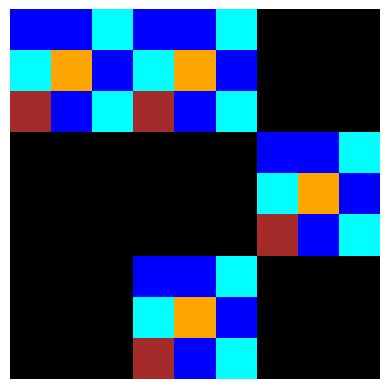

Processing Puzzle id:  c3f564a4
extracting solution
[[[1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8], [2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1], [3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2], [4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3], [5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4], [6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5], [7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6], [8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8], [2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1], [3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2], [4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3], [5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4], [6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5], [7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6], [8, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7]]]
creating Dataframe
creating destination path
[[1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8], [2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 1],

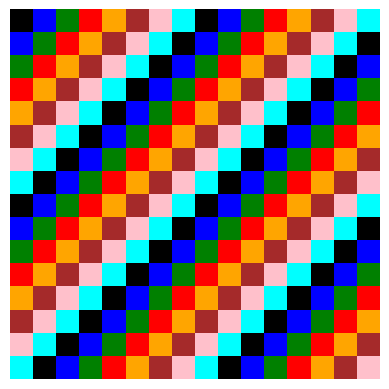

Processing Puzzle id:  c444b776
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0, 0, 2, 0, 4, 0, 2, 0, 0, 0, 0, 0, 2, 0, 4, 0, 2, 0, 0, 0, 0, 0, 2, 0], [0, 3, 0, 0, 0, 0, 0, 2, 0, 4, 0, 3, 0, 0, 0, 0, 0, 2, 0, 4, 0, 3, 0, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 6, 0, 0, 0, 0, 0, 0, 4, 0, 0, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0, 4, 0, 0, 0, 0, 0, 0, 6, 0, 0, 4, 0, 0, 0, 0, 0, 0, 6, 0, 0], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0

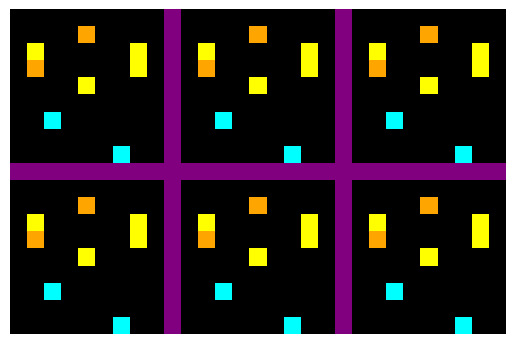

Processing Puzzle id:  c59eb873
extracting solution
[[[2, 2, 0, 0, 0, 0, 7, 7, 8, 8], [2, 2, 0, 0, 0, 0, 7, 7, 8, 8], [2, 2, 1, 1, 1, 1, 0, 0, 0, 0], [2, 2, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 5, 5, 6, 6, 6, 6, 0, 0], [0, 0, 5, 5, 6, 6, 6, 6, 0, 0], [3, 3, 5, 5, 6, 6, 0, 0, 0, 0], [3, 3, 5, 5, 6, 6, 0, 0, 0, 0], [0, 0, 5, 5, 0, 0, 0, 0, 0, 0], [0, 0, 5, 5, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[2, 2, 0, 0, 0, 0, 7, 7, 8, 8], [2, 2, 0, 0, 0, 0, 7, 7, 8, 8], [2, 2, 1, 1, 1, 1, 0, 0, 0, 0], [2, 2, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 5, 5, 6, 6, 6, 6, 0, 0], [0, 0, 5, 5, 6, 6, 6, 6, 0, 0], [3, 3, 5, 5, 6, 6, 0, 0, 0, 0], [3, 3, 5, 5, 6, 6, 0, 0, 0, 0], [0, 0, 5, 5, 0, 0, 0, 0, 0, 0], [0, 0, 5, 5, 0, 0, 0, 0, 0, 0]]


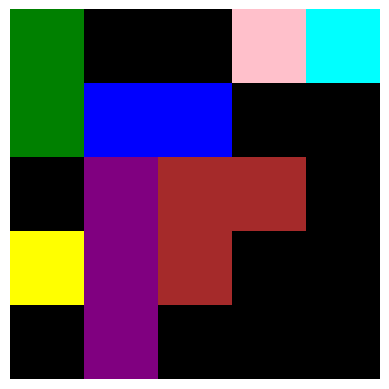

Processing Puzzle id:  c8cbb738
extracting solution
[[[3, 8, 6, 1, 6, 8, 3], [8, 8, 8, 8, 8, 8, 8], [2, 8, 8, 8, 8, 8, 2], [1, 8, 8, 8, 8, 8, 1], [2, 8, 8, 8, 8, 8, 2], [8, 8, 8, 8, 8, 8, 8], [3, 8, 6, 1, 6, 8, 3]]]
creating Dataframe
creating destination path
[[3, 8, 6, 1, 6, 8, 3], [8, 8, 8, 8, 8, 8, 8], [2, 8, 8, 8, 8, 8, 2], [1, 8, 8, 8, 8, 8, 1], [2, 8, 8, 8, 8, 8, 2], [8, 8, 8, 8, 8, 8, 8], [3, 8, 6, 1, 6, 8, 3]]


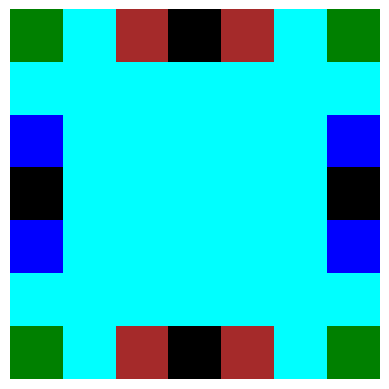

Processing Puzzle id:  c8f0f002
extracting solution
[[[1, 5, 5, 1, 5], [8, 1, 5, 5, 5], [8, 5, 1, 5, 8]]]
creating Dataframe
creating destination path
[[1, 5, 5, 1, 5], [8, 1, 5, 5, 5], [8, 5, 1, 5, 8]]


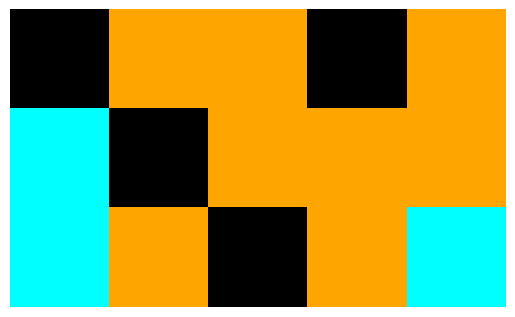

Processing Puzzle id:  c909285e
extracting solution
[[[8, 8, 8, 8, 8, 8], [8, 2, 2, 4, 2, 8], [8, 2, 0, 4, 0, 8], [8, 4, 4, 4, 4, 8], [8, 2, 0, 4, 0, 8], [8, 8, 8, 8, 8, 8]]]
creating Dataframe
creating destination path
[[8, 8, 8, 8, 8, 8], [8, 2, 2, 4, 2, 8], [8, 2, 0, 4, 0, 8], [8, 4, 4, 4, 4, 8], [8, 2, 0, 4, 0, 8], [8, 8, 8, 8, 8, 8]]


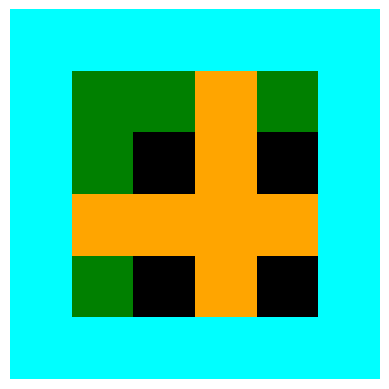

Processing Puzzle id:  c9e6f938
extracting solution
[[[7, 7, 0, 0, 7, 7], [0, 7, 0, 0, 7, 0], [0, 0, 7, 7, 0, 0]]]
creating Dataframe
creating destination path
[[7, 7, 0, 0, 7, 7], [0, 7, 0, 0, 7, 0], [0, 0, 7, 7, 0, 0]]


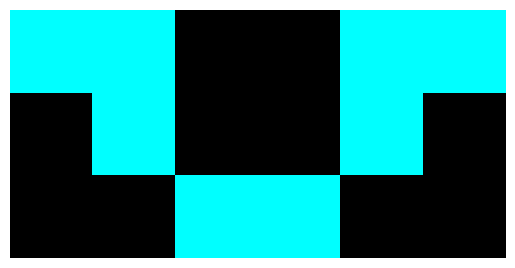

Processing Puzzle id:  c9f8e694
extracting solution
[[[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [8, 0, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0], [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], [7, 0, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7], [7, 0, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7], [7, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7], [7, 0, 0, 0, 0, 0, 7, 7, 7, 0, 0, 0], [8, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0], [8, 0, 8, 8, 8, 0, 8, 8, 8, 0, 0, 0], [8, 0, 8, 8, 8, 0, 8, 8, 8, 0, 0, 0], [8, 0, 8, 8, 8, 0, 8, 8, 8, 0, 0, 0]]]
creating Dataframe
creating destination path
[[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [8, 0, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0], [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], [7, 0, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7], [7, 0, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7], [7, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7], [7, 0, 0, 0, 0, 0, 7, 7, 7, 0, 0, 0], [8, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0], [8, 0, 8, 8, 8, 0, 8, 8, 8, 0, 0, 0], [8, 0, 8, 8, 8, 0, 8, 8, 8, 0, 0, 0], [8, 0, 8, 8, 8, 0, 8, 8, 

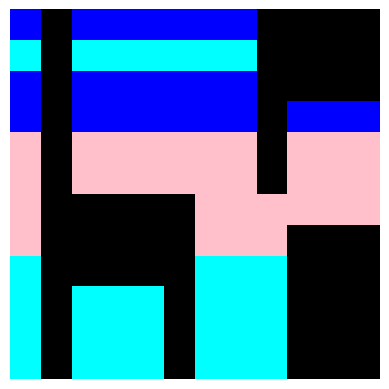

Processing Puzzle id:  caa06a1f
extracting solution
[[[5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8], [7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5], [5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8], [7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5], [5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8], [7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5], [5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8], [7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5], [5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8], [7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5], [5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8], [7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5], [5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8], [7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5], [5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8], [7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5], [5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7, 8, 5, 7

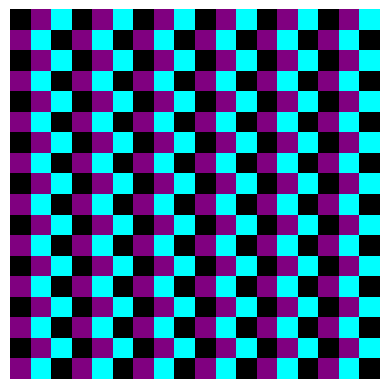

Processing Puzzle id:  cbded52d
extracting solution
[[[1, 1, 0, 1, 1, 0, 1, 1], [1, 8, 0, 1, 8, 0, 1, 8], [0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 0, 1, 1], [1, 1, 0, 1, 1, 0, 1, 8], [0, 0, 0, 0, 0, 0, 0, 0], [6, 1, 0, 6, 1, 0, 6, 1], [1, 1, 0, 1, 1, 0, 1, 8]]]
creating Dataframe
creating destination path
[[1, 1, 0, 1, 1, 0, 1, 1], [1, 8, 0, 1, 8, 0, 1, 8], [0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 0, 1, 1], [1, 1, 0, 1, 1, 0, 1, 8], [0, 0, 0, 0, 0, 0, 0, 0], [6, 1, 0, 6, 1, 0, 6, 1], [1, 1, 0, 1, 1, 0, 1, 8]]


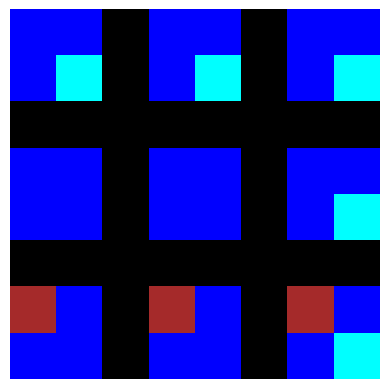

Processing Puzzle id:  cce03e0d
extracting solution
[[[0, 0, 0, 1, 2, 2, 1, 2, 2], [0, 0, 0, 2, 0, 1, 2, 0, 1], [0, 0, 0, 1, 2, 0, 1, 2, 0], [1, 2, 2, 0, 0, 0, 0, 0, 0], [2, 0, 1, 0, 0, 0, 0, 0, 0], [1, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 2, 2, 0, 0, 0], [0, 0, 0, 2, 0, 1, 0, 0, 0], [0, 0, 0, 1, 2, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 1, 2, 2, 1, 2, 2], [0, 0, 0, 2, 0, 1, 2, 0, 1], [0, 0, 0, 1, 2, 0, 1, 2, 0], [1, 2, 2, 0, 0, 0, 0, 0, 0], [2, 0, 1, 0, 0, 0, 0, 0, 0], [1, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 2, 2, 0, 0, 0], [0, 0, 0, 2, 0, 1, 0, 0, 0], [0, 0, 0, 1, 2, 0, 0, 0, 0]]


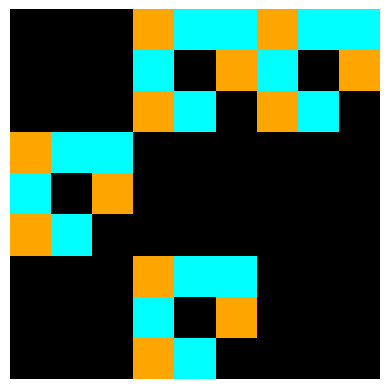

Processing Puzzle id:  cdecee7f
extracting solution
[[[5, 2, 9], [4, 5, 3], [9, 6, 1]]]
creating Dataframe
creating destination path
[[5, 2, 9], [4, 5, 3], [9, 6, 1]]


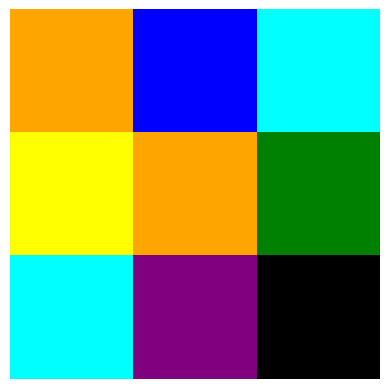

Processing Puzzle id:  ce22a75a
extracting solution
[[[0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, 1, 1, 1], [1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0]]


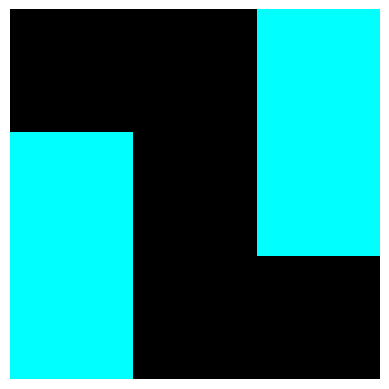

Processing Puzzle id:  ce4f8723
extracting solution
[[[3, 3, 3, 0], [3, 0, 3, 0], [0, 3, 0, 3], [3, 3, 3, 0]]]
creating Dataframe
creating destination path
[[3, 3, 3, 0], [3, 0, 3, 0], [0, 3, 0, 3], [3, 3, 3, 0]]


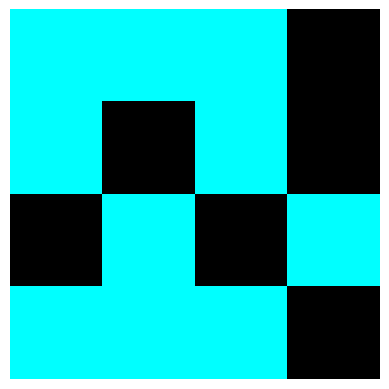

Processing Puzzle id:  ce602527
extracting solution
[[[3, 6, 3], [6, 6, 6], [3, 6, 3], [6, 6, 6]]]
creating Dataframe
creating destination path
[[3, 6, 3], [6, 6, 6], [3, 6, 3], [6, 6, 6]]


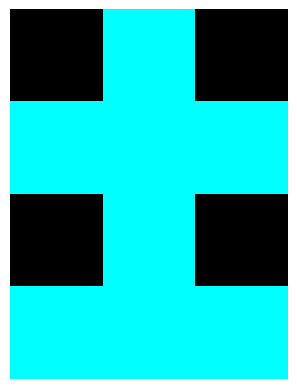

Processing Puzzle id:  ce9e57f2
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 8, 0, 2, 0, 0, 0, 2, 0], [0, 8, 0, 8, 0, 0, 0, 2, 0], [0, 8, 0, 8, 0, 0, 0, 2, 0], [0, 8, 0, 8, 0, 2, 0, 8, 0], [0, 8, 0, 8, 0, 8, 0, 8, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 2, 0, 2, 0, 0, 0, 0, 0], [0, 8, 0, 2, 0, 0, 0, 2, 0], [0, 8, 0, 8, 0, 0, 0, 2, 0], [0, 8, 0, 8, 0, 0, 0, 2, 0], [0, 8, 0, 8, 0, 2, 0, 8, 0], [0, 8, 0, 8, 0, 8, 0, 8, 0]]


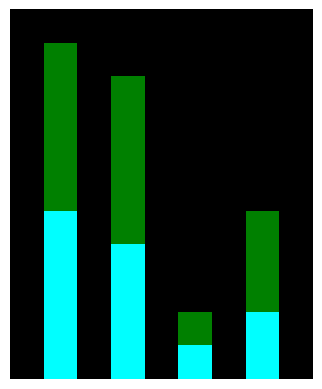

Processing Puzzle id:  cf98881b
extracting solution
[[[9, 1, 4, 0], [4, 4, 9, 4], [1, 9, 9, 9], [9, 4, 4, 9]]]
creating Dataframe
creating destination path
[[9, 1, 4, 0], [4, 4, 9, 4], [1, 9, 9, 9], [9, 4, 4, 9]]


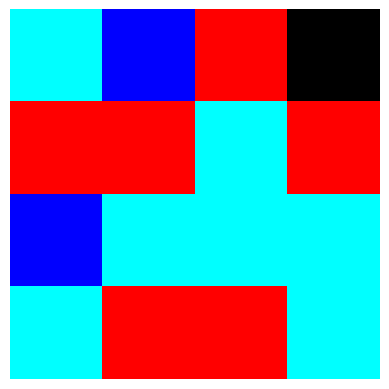

Processing Puzzle id:  d037b0a7
extracting solution
[[[4, 0, 8], [4, 0, 8], [4, 7, 8]]]
creating Dataframe
creating destination path
[[4, 0, 8], [4, 0, 8], [4, 7, 8]]


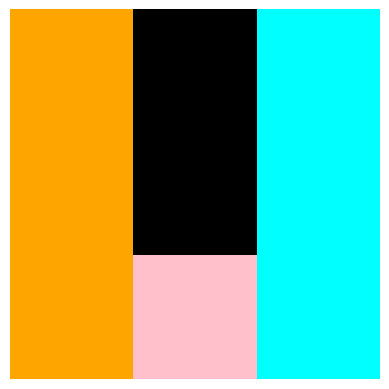

Processing Puzzle id:  d06dbe63
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0

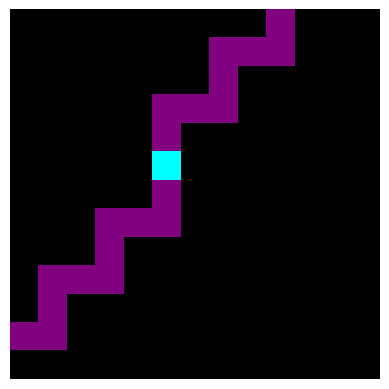

Processing Puzzle id:  d07ae81c
extracting solution
[[[8, 8, 4, 3, 3, 3, 3, 3, 3, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8], [8, 8, 8, 1, 3, 3, 3, 3, 3, 4, 8, 4, 8, 8, 8, 8, 8, 8, 8], [8, 8, 8, 3, 1, 3, 3, 3, 1, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8], [8, 8, 8, 3, 3, 1, 3, 1, 3, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8], [3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3], [3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3], [3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3], [8, 8, 8, 1, 3, 3, 3, 3, 3, 4, 8, 8, 8, 8, 8, 8, 8, 4, 8], [8, 8, 4, 3, 3, 3, 3, 3, 3, 8, 4, 8, 8, 8, 8, 8, 8, 8, 4], [8, 4, 8, 3, 3, 3, 3, 3, 3, 8, 8, 4, 8, 8, 8, 8, 8, 4, 8], [4, 8, 8, 3, 3, 3, 3, 3, 3, 8, 8, 8, 4, 8, 8, 8, 4, 8, 8], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3], [8, 8, 8, 3, 3, 3, 3, 3, 3, 8, 8, 4, 8, 8, 8, 8, 8, 4, 8], [8

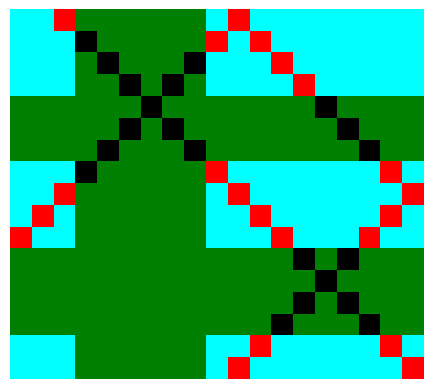

Processing Puzzle id:  d0f5fe59
extracting solution
[[[8, 0, 0, 0, 0], [0, 8, 0, 0, 0], [0, 0, 8, 0, 0], [0, 0, 0, 8, 0], [0, 0, 0, 0, 8]]]
creating Dataframe
creating destination path
[[8, 0, 0, 0, 0], [0, 8, 0, 0, 0], [0, 0, 8, 0, 0], [0, 0, 0, 8, 0], [0, 0, 0, 0, 8]]


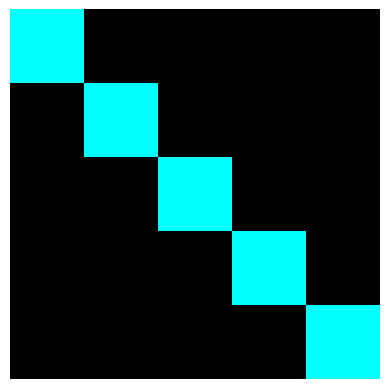

Processing Puzzle id:  d10ecb37
extracting solution
[[[9, 6], [2, 9]]]
creating Dataframe
creating destination path
[[9, 6], [2, 9]]


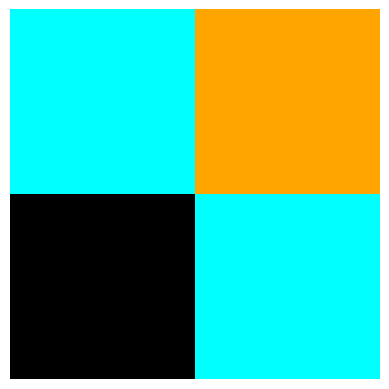

Processing Puzzle id:  d13f3404
extracting solution
[[[0, 0, 3, 0, 0, 0], [0, 0, 0, 3, 0, 0], [0, 4, 9, 0, 3, 0], [0, 0, 4, 9, 0, 3], [0, 0, 0, 4, 9, 0], [0, 0, 0, 0, 4, 9]]]
creating Dataframe
creating destination path
[[0, 0, 3, 0, 0, 0], [0, 0, 0, 3, 0, 0], [0, 4, 9, 0, 3, 0], [0, 0, 4, 9, 0, 3], [0, 0, 0, 4, 9, 0], [0, 0, 0, 0, 4, 9]]


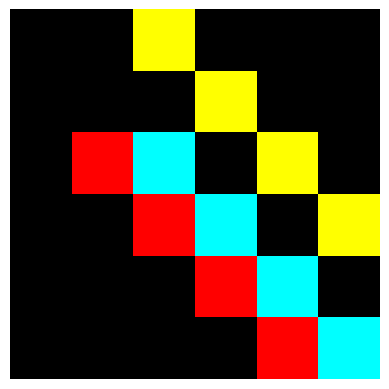

Processing Puzzle id:  d22278a0
extracting solution
[[[4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0], [0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0], [4, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0, 1, 1], [0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0], [4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0], [4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 0, 8, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 8, 0, 8, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [8, 8, 8, 0, 8, 0, 8, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1], [0, 0, 8, 0, 8, 0, 8, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0], [8, 0, 8, 0, 8, 0, 8, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1]]]
creating Dataframe
creating destination path

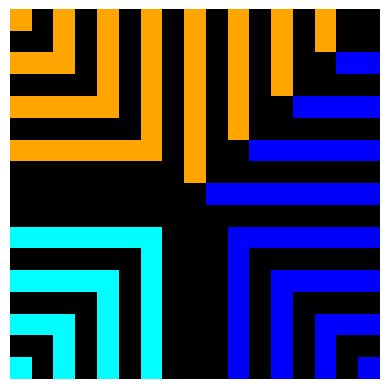

Processing Puzzle id:  d23f8c26
extracting solution
[[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0]]


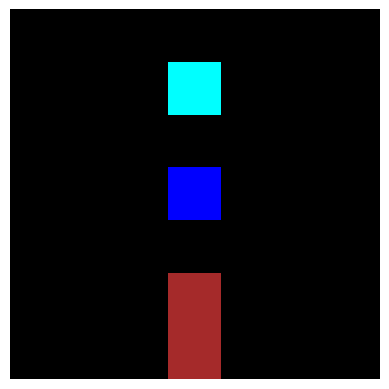

Processing Puzzle id:  d2abd087
extracting solution
[[[0, 1, 1, 0, 0, 0, 2, 2, 0, 0], [0, 1, 1, 0, 0, 0, 2, 2, 0, 0], [1, 1, 1, 1, 0, 2, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 0, 0, 0, 0, 1, 0, 0], [0, 2, 2, 2, 2, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 1, 1, 0, 0, 0, 2, 2, 0, 0], [0, 1, 1, 0, 0, 0, 2, 2, 0, 0], [1, 1, 1, 1, 0, 2, 2, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 0, 0, 0, 0, 1, 0, 0], [0, 2, 2, 2, 2, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


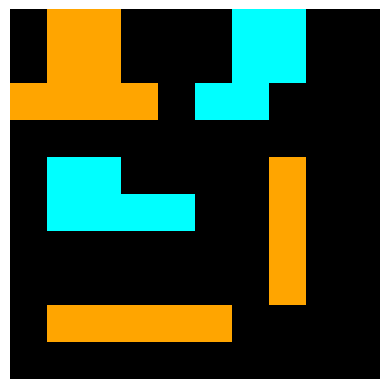

Processing Puzzle id:  d364b489
extracting solution
[[[7, 1, 6, 0, 0, 0, 0, 0, 7, 1], [0, 8, 0, 0, 0, 0, 0, 2, 0, 8], [0, 0, 0, 2, 0, 0, 7, 1, 6, 0], [0, 0, 7, 1, 6, 0, 0, 8, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 2, 0, 0], [1, 6, 0, 0, 0, 0, 7, 1, 6, 0], [8, 0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 7, 1, 6, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[7, 1, 6, 0, 0, 0, 0, 0, 7, 1], [0, 8, 0, 0, 0, 0, 0, 2, 0, 8], [0, 0, 0, 2, 0, 0, 7, 1, 6, 0], [0, 0, 7, 1, 6, 0, 0, 8, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 0, 0, 0, 2, 0, 0], [1, 6, 0, 0, 0, 0, 7, 1, 6, 0], [8, 0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 7, 1, 6, 0, 0, 0, 0]]


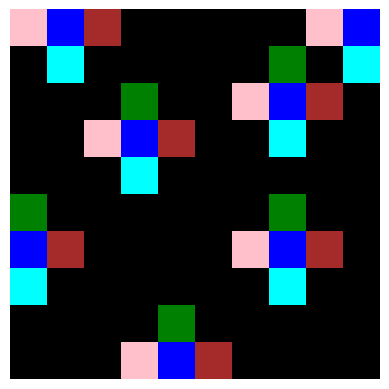

Processing Puzzle id:  d406998b
extracting solution
[[[0, 0, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 3, 0, 3, 0, 0], [3, 0, 3, 0, 0, 5, 0, 0, 3, 0, 0, 5, 0, 0, 0, 5, 0], [0, 5, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 5, 0, 0, 3]]]
creating Dataframe
creating destination path
[[0, 0, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 3, 0, 3, 0, 0], [3, 0, 3, 0, 0, 5, 0, 0, 3, 0, 0, 5, 0, 0, 0, 5, 0], [0, 5, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 5, 0, 0, 3]]


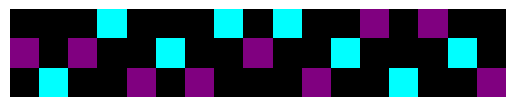

Processing Puzzle id:  d43fd935
extracting solution
[[[0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [2, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 2, 0, 0], [6, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 6, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [6, 6, 3, 3, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 2, 0, 0], [0, 0, 0, 6, 0, 6, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [2, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 2, 0, 0], [6, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 6, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [6, 6, 3, 3, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 2, 0, 0], [0, 0, 0, 6, 0, 6, 0, 0, 0, 0]]


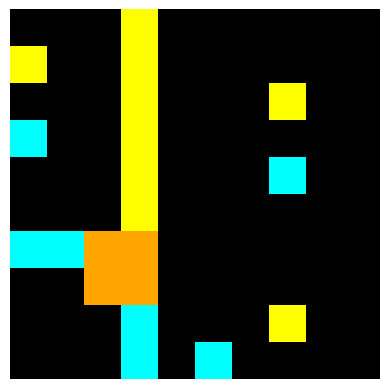

Processing Puzzle id:  d4469b4b
extracting solution
[[[0, 5, 0], [5, 5, 5], [0, 5, 0]], [[0, 0, 5], [0, 0, 5], [5, 5, 5]]]
creating Dataframe
creating destination path
[[0, 5, 0], [5, 5, 5], [0, 5, 0]]
[[0, 0, 5], [0, 0, 5], [5, 5, 5]]


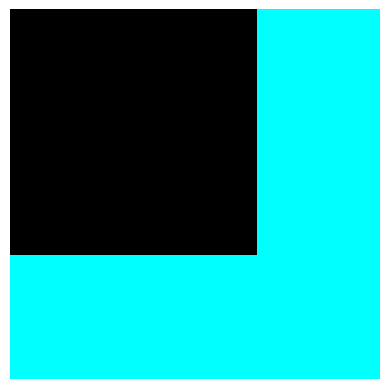

Processing Puzzle id:  d4a91cb9
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

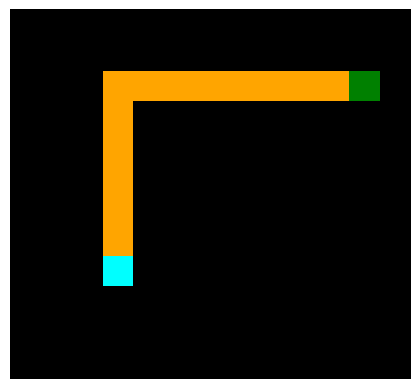

Processing Puzzle id:  d4f3cd78
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 0, 0, 0], [0, 0, 5, 8, 8, 8, 5, 0, 0, 0], [0, 0, 5, 8, 8, 8, 5, 0, 0, 0], [0, 0, 5, 8, 8, 8, 8, 8, 8, 8], [0, 0, 5, 8, 8, 8, 5, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 0, 0, 0], [0, 0, 5, 8, 8, 8, 5, 0, 0, 0], [0, 0, 5, 8, 8, 8, 5, 0, 0, 0], [0, 0, 5, 8, 8, 8, 8, 8, 8, 8], [0, 0, 5, 8, 8, 8, 5, 0, 0, 0], [0, 0, 5, 5, 5, 5, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


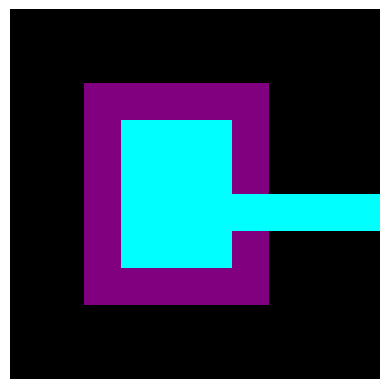

Processing Puzzle id:  d511f180
extracting solution
[[[5, 5, 4, 8], [3, 5, 7, 8], [3, 7, 1, 9], [6, 4, 5, 5]]]
creating Dataframe
creating destination path
[[5, 5, 4, 8], [3, 5, 7, 8], [3, 7, 1, 9], [6, 4, 5, 5]]


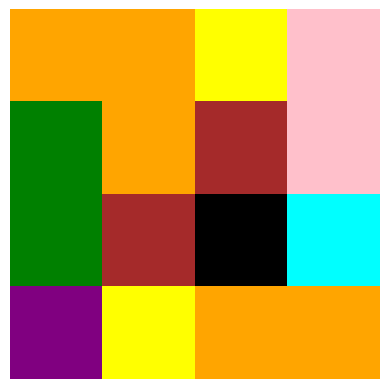

Processing Puzzle id:  d5d6de2d
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 3, 3, 3, 3, 0, 0], [0, 0, 3, 3, 3, 3, 3, 3, 0, 0], [0, 0, 3, 3, 3, 3, 3, 3, 0, 0], [0, 0, 3, 3, 3, 3, 3, 3, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0

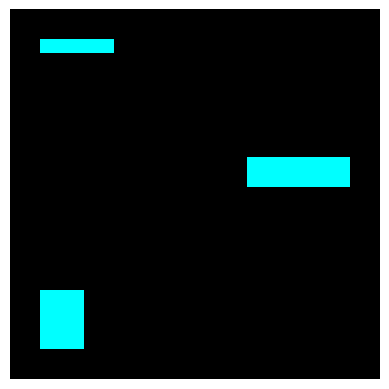

Processing Puzzle id:  d631b094
extracting solution
[[[4, 4, 4, 4, 4]]]
creating Dataframe
creating destination path
[[4, 4, 4, 4, 4]]


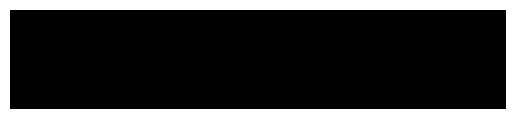

Processing Puzzle id:  d687bc17
extracting solution
[[[0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0], [1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 2], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 8, 0, 0, 2], [0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0]]]
creating Dataframe
creating destination path
[[0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0], [1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 2], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]

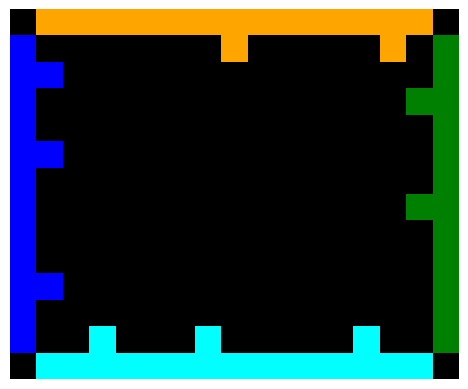

Processing Puzzle id:  d6ad076f
extracting solution
[[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 2, 2, 2], [1, 1, 1, 1, 8, 8, 8, 2, 2, 2], [1, 1, 1, 1, 8, 8, 8, 2, 2, 2], [1, 1, 1, 1, 8, 8, 8, 2, 2, 2], [1, 1, 1, 1, 8, 8, 8, 2, 2, 2], [1, 1, 1, 1, 0, 0, 0, 2, 2, 2], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 2, 2, 2], [1, 1, 1, 1, 8, 8, 8, 2, 2, 2], [1, 1, 1, 1, 8, 8, 8, 2, 2, 2], [1, 1, 1, 1, 8, 8, 8, 2, 2, 2], [1, 1, 1, 1, 8, 8, 8, 2, 2, 2], [1, 1, 1, 1, 0, 0, 0, 2, 2, 2], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


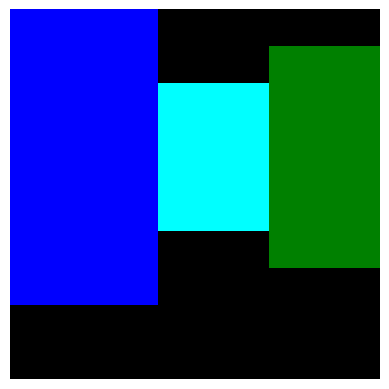

Processing Puzzle id:  d89b689b
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 4, 0, 0, 0, 0], [0, 0, 0, 0, 6, 7, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 4, 0, 0, 0, 0], [0, 0, 0, 0, 6, 7, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


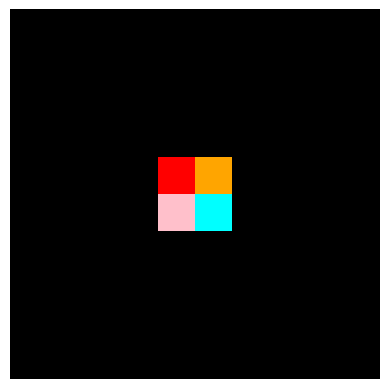

Processing Puzzle id:  d8c310e9
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2], [6, 2, 2, 0, 6, 2, 2, 0, 6, 2, 2, 0, 6, 2, 2], [6, 6, 2, 3, 6, 6, 2, 3, 6, 6, 2, 3, 6, 6, 2]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2], [6, 2, 2, 0, 6, 2, 2, 0, 6, 2, 2, 0, 6, 2, 2], [6, 6, 2, 3, 6, 6, 2, 3, 6, 6, 2, 3, 6, 6, 2]]


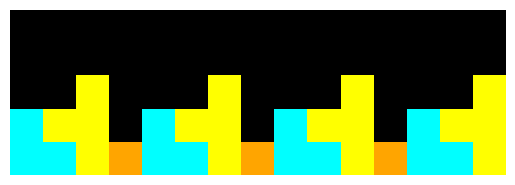

Processing Puzzle id:  d90796e8
extracting solution
[[[0, 0, 0, 0, 2, 0, 0, 0, 5], [0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 0, 0, 0, 2], [5, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 8, 0], [5, 3, 0, 0, 0, 5, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 2, 0, 0, 0, 5], [0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 5, 0, 0, 0, 2], [5, 0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 8, 0], [5, 3, 0, 0, 0, 5, 0, 0, 0]]


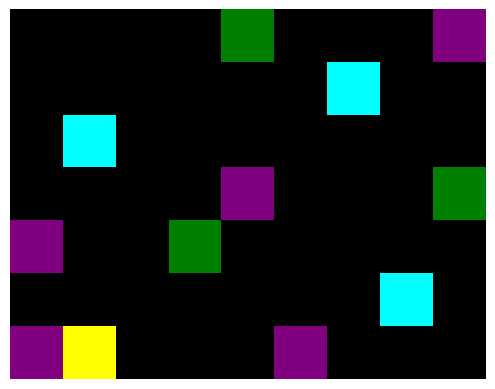

Processing Puzzle id:  d9f24cd1
extracting solution
[[[0, 0, 2, 0, 0, 2, 0, 0, 2, 0], [0, 0, 2, 0, 0, 2, 0, 0, 2, 0], [0, 0, 2, 0, 0, 2, 0, 5, 2, 0], [0, 0, 2, 0, 0, 2, 0, 0, 2, 0], [0, 5, 2, 0, 0, 2, 0, 0, 2, 0], [0, 2, 2, 0, 0, 2, 0, 0, 2, 0], [0, 2, 0, 0, 5, 2, 0, 0, 2, 0], [0, 2, 0, 0, 2, 2, 0, 0, 2, 0], [0, 2, 0, 0, 2, 0, 0, 0, 2, 0], [0, 2, 0, 0, 2, 0, 0, 0, 2, 0]]]
creating Dataframe
creating destination path
[[0, 0, 2, 0, 0, 2, 0, 0, 2, 0], [0, 0, 2, 0, 0, 2, 0, 0, 2, 0], [0, 0, 2, 0, 0, 2, 0, 5, 2, 0], [0, 0, 2, 0, 0, 2, 0, 0, 2, 0], [0, 5, 2, 0, 0, 2, 0, 0, 2, 0], [0, 2, 2, 0, 0, 2, 0, 0, 2, 0], [0, 2, 0, 0, 5, 2, 0, 0, 2, 0], [0, 2, 0, 0, 2, 2, 0, 0, 2, 0], [0, 2, 0, 0, 2, 0, 0, 0, 2, 0], [0, 2, 0, 0, 2, 0, 0, 0, 2, 0]]


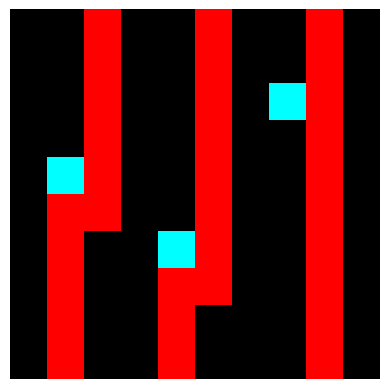

Processing Puzzle id:  d9fac9be
extracting solution
[[[4]]]
creating Dataframe
creating destination path
[[4]]


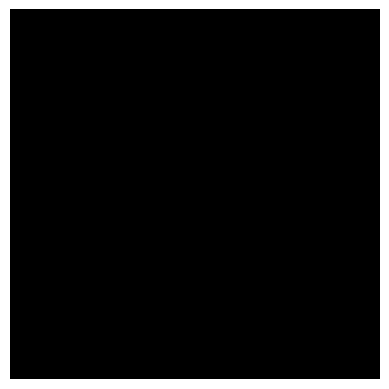

Processing Puzzle id:  dae9d2b5
extracting solution
[[[6, 6, 6], [6, 6, 0], [6, 6, 0]], [[0, 6, 6], [6, 6, 6], [6, 0, 0]]]
creating Dataframe
creating destination path
[[6, 6, 6], [6, 6, 0], [6, 6, 0]]
[[0, 6, 6], [6, 6, 6], [6, 0, 0]]


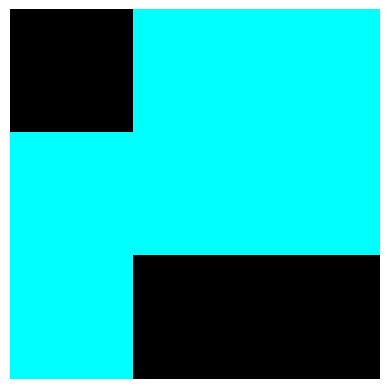

Processing Puzzle id:  db3e9e38
extracting solution
[[[8, 7, 8, 7, 8, 7, 8, 7, 8], [8, 7, 8, 7, 8, 7, 8, 7, 8], [0, 7, 8, 7, 8, 7, 8, 7, 8], [0, 0, 8, 7, 8, 7, 8, 7, 8], [0, 0, 0, 7, 8, 7, 8, 7, 0], [0, 0, 0, 0, 8, 7, 8, 0, 0], [0, 0, 0, 0, 0, 7, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[8, 7, 8, 7, 8, 7, 8, 7, 8], [8, 7, 8, 7, 8, 7, 8, 7, 8], [0, 7, 8, 7, 8, 7, 8, 7, 8], [0, 0, 8, 7, 8, 7, 8, 7, 8], [0, 0, 0, 7, 8, 7, 8, 7, 0], [0, 0, 0, 0, 8, 7, 8, 0, 0], [0, 0, 0, 0, 0, 7, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


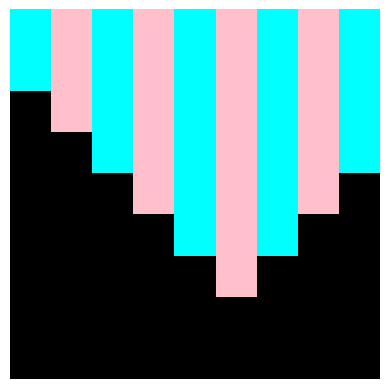

Processing Puzzle id:  db93a21d
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 9, 9, 9, 9, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 9, 9, 9, 9, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 9, 9, 9, 9, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 9, 9, 9, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 3, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 3, 9, 9, 9, 9, 3, 3, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 3, 9, 9, 9, 9, 3, 3, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 3, 3

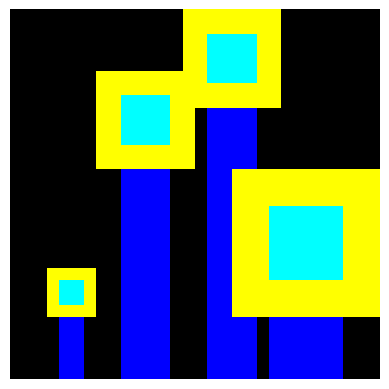

Processing Puzzle id:  dbc1a6ce
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 1, 8, 8, 1, 8, 8, 8, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 1, 0, 0, 8, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 8, 0, 0, 8, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 8, 0, 0, 8, 1, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 8, 0, 0, 8, 0, 1, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 8, 0, 0, 8, 0, 0, 0, 1, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 8, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 8, 0, 0, 1, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 1, 8, 8, 8, 8, 8,

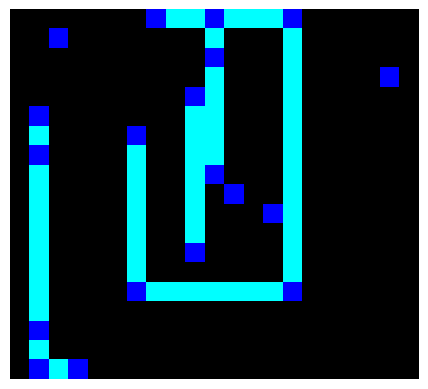

Processing Puzzle id:  dc0a314f
extracting solution
[[[9, 6, 6, 4, 5], [9, 9, 6, 6, 2], [9, 6, 9, 6, 5], [9, 9, 9, 9, 5], [9, 9, 9, 9, 5]]]
creating Dataframe
creating destination path
[[9, 6, 6, 4, 5], [9, 9, 6, 6, 2], [9, 6, 9, 6, 5], [9, 9, 9, 9, 5], [9, 9, 9, 9, 5]]


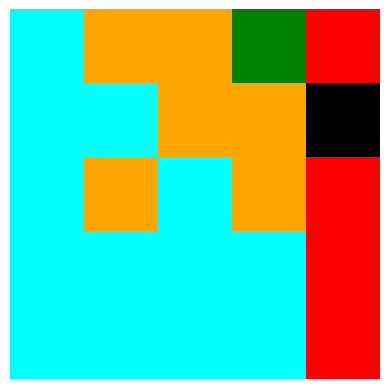

Processing Puzzle id:  dc1df850
extracting solution
[[[0, 1, 1, 1, 0, 0, 0, 0, 7, 0], [0, 1, 2, 1, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 1, 2, 1, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 0], [0, 7, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 1, 2, 1, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 5]]]
creating Dataframe
creating destination path
[[0, 1, 1, 1, 0, 0, 0, 0, 7, 0], [0, 1, 2, 1, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 1, 2, 1, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 0], [0, 7, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 1, 2, 1, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 5]]


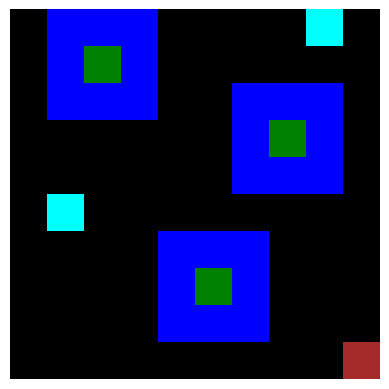

Processing Puzzle id:  dc433765
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[4, 0, 0], [0, 3, 0], [0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
[[4, 0, 0], [0, 3, 0], [0, 0, 0]]


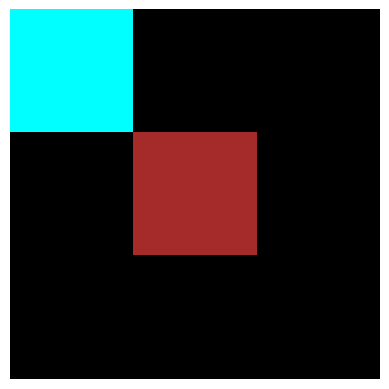

Processing Puzzle id:  ddf7fa4f
extracting solution
[[[3, 0, 0, 0, 6, 0, 0, 0, 9, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 6, 6, 6, 6, 6, 0, 9, 9], [0, 0, 6, 6, 6, 6, 6, 0, 9, 9], [0, 0, 6, 6, 6, 6, 6, 0, 9, 9], [0, 0, 6, 6, 6, 6, 6, 0, 9, 9], [0, 0, 0, 0, 0, 0, 0, 0, 9, 9], [3, 3, 3, 3, 0, 0, 0, 0, 9, 9], [3, 3, 3, 3, 0, 0, 0, 0, 9, 9], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[3, 0, 0, 0, 6, 0, 0, 0, 9, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 6, 6, 6, 6, 6, 0, 9, 9], [0, 0, 6, 6, 6, 6, 6, 0, 9, 9], [0, 0, 6, 6, 6, 6, 6, 0, 9, 9], [0, 0, 6, 6, 6, 6, 6, 0, 9, 9], [0, 0, 0, 0, 0, 0, 0, 0, 9, 9], [3, 3, 3, 3, 0, 0, 0, 0, 9, 9], [3, 3, 3, 3, 0, 0, 0, 0, 9, 9], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


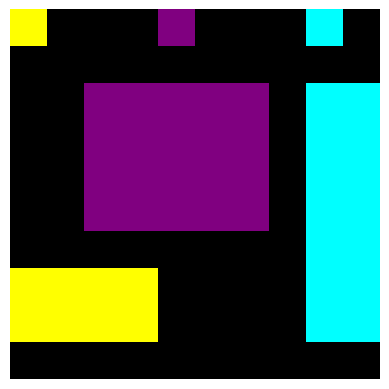

Processing Puzzle id:  de1cd16c
extracting solution
[[[2]]]
creating Dataframe
creating destination path
[[2]]


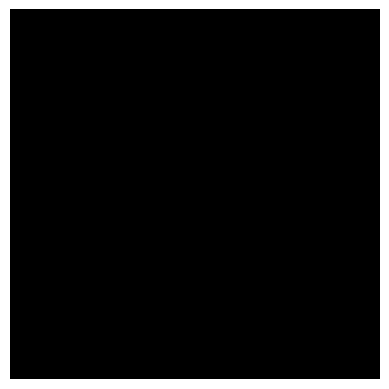

Processing Puzzle id:  ded97339
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 0, 0, 0, 0], [0, 8, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 0, 8, 0, 0], [0, 8, 0, 0, 0, 0, 0, 8, 0, 0], [0, 8, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 8, 8, 8, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 0, 0, 0, 0], [0, 8, 0, 8, 0, 0, 0, 0, 0, 0], [0, 8, 0, 0, 0, 0, 0, 8, 0, 0], [0, 8, 0, 0, 0, 0, 0, 8, 0, 0], [0, 8, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 8, 0, 0], [0, 0, 0, 0, 8, 8, 8, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


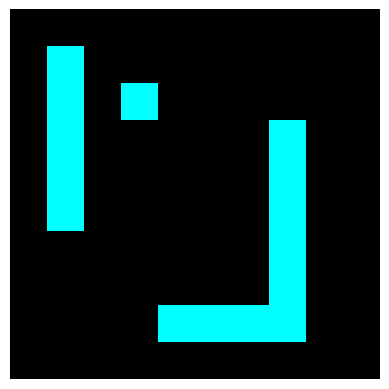

Processing Puzzle id:  e179c5f4
extracting solution
[[[8, 1, 8, 8, 8], [1, 8, 8, 8, 8], [8, 1, 8, 8, 8], [8, 8, 1, 8, 8], [8, 8, 8, 1, 8], [8, 8, 8, 8, 1], [8, 8, 8, 1, 8], [8, 8, 1, 8, 8], [8, 1, 8, 8, 8], [1, 8, 8, 8, 8]]]
creating Dataframe
creating destination path
[[8, 1, 8, 8, 8], [1, 8, 8, 8, 8], [8, 1, 8, 8, 8], [8, 8, 1, 8, 8], [8, 8, 8, 1, 8], [8, 8, 8, 8, 1], [8, 8, 8, 1, 8], [8, 8, 1, 8, 8], [8, 1, 8, 8, 8], [1, 8, 8, 8, 8]]


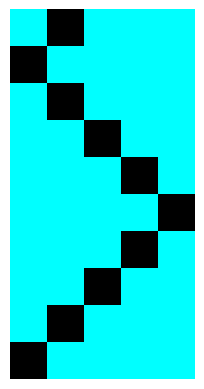

Processing Puzzle id:  e21d9049
extracting solution
[[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3], [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 

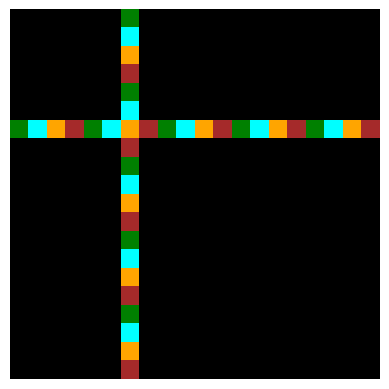

Processing Puzzle id:  e26a3af2
extracting solution
[[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]]]
creating Dataframe
creating destination path
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2,

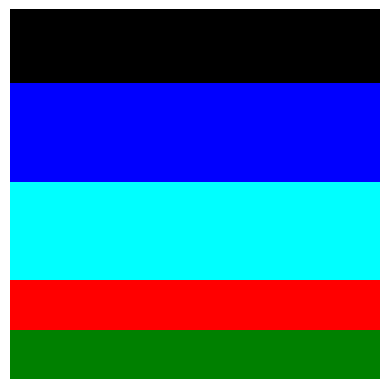

Processing Puzzle id:  e3497940
extracting solution
[[[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [6, 1, 1, 1], [0, 0, 6, 6], [0, 1, 1, 1], [0, 0, 0, 1], [0, 0, 6, 1], [0, 0, 0, 6], [0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1], [6, 1, 1, 1], [0, 0, 6, 6], [0, 1, 1, 1], [0, 0, 0, 1], [0, 0, 6, 1], [0, 0, 0, 6], [0, 0, 0, 0]]


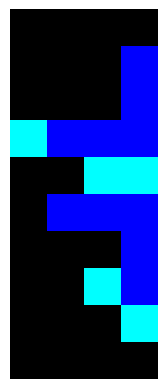

Processing Puzzle id:  e40b9e2f
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 3, 0, 0, 0, 0], [0, 0, 0, 3, 2, 3, 0, 0, 0, 0], [0, 3, 3, 3, 2, 3, 3, 3, 0, 0], [0, 0, 2, 2, 3, 2, 2, 0, 0, 0], [0, 3, 3, 3, 2, 3, 3, 3, 0, 0], [0, 0, 0, 3, 2, 3, 0, 0, 0, 0], [0, 0, 0, 3, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 3, 0, 0, 0, 0], [0, 0, 0, 3, 2, 3, 0, 0, 0, 0], [0, 3, 3, 3, 2, 3, 3, 3, 0, 0], [0, 0, 2, 2, 3, 2, 2, 0, 0, 0], [0, 3, 3, 3, 2, 3, 3, 3, 0, 0], [0, 0, 0, 3, 2, 3, 0, 0, 0, 0], [0, 0, 0, 3, 0, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


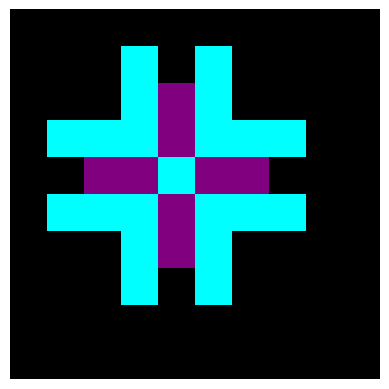

Processing Puzzle id:  e48d4e1a
extracting solution
[[[0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 0, 0, 0, 0, 0, 0]]


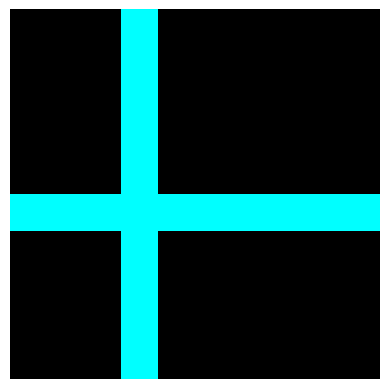

Processing Puzzle id:  e5062a87
extracting solution
[[[0, 5, 5, 5, 0, 5, 5, 5, 5, 0], [5, 5, 5, 0, 5, 5, 5, 5, 0, 5], [2, 2, 5, 5, 5, 5, 0, 5, 0, 0], [2, 2, 5, 5, 5, 5, 0, 5, 5, 5], [2, 2, 5, 5, 5, 2, 2, 0, 0, 5], [5, 5, 0, 0, 0, 2, 2, 5, 5, 5], [0, 0, 5, 5, 0, 2, 2, 5, 5, 5], [0, 5, 5, 5, 5, 5, 5, 0, 2, 2], [5, 5, 0, 0, 5, 5, 5, 0, 2, 2], [5, 0, 5, 0, 5, 0, 0, 5, 2, 2]]]
creating Dataframe
creating destination path
[[0, 5, 5, 5, 0, 5, 5, 5, 5, 0], [5, 5, 5, 0, 5, 5, 5, 5, 0, 5], [2, 2, 5, 5, 5, 5, 0, 5, 0, 0], [2, 2, 5, 5, 5, 5, 0, 5, 5, 5], [2, 2, 5, 5, 5, 2, 2, 0, 0, 5], [5, 5, 0, 0, 0, 2, 2, 5, 5, 5], [0, 0, 5, 5, 0, 2, 2, 5, 5, 5], [0, 5, 5, 5, 5, 5, 5, 0, 2, 2], [5, 5, 0, 0, 5, 5, 5, 0, 2, 2], [5, 0, 5, 0, 5, 0, 0, 5, 2, 2]]


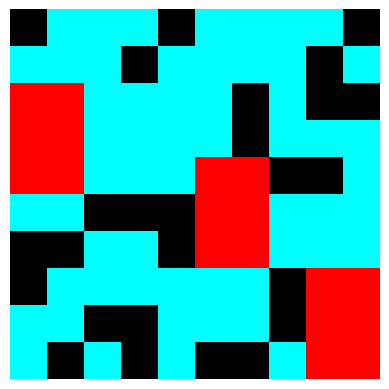

Processing Puzzle id:  e509e548
extracting solution
[[[0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0], [0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 6, 6, 6, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0],

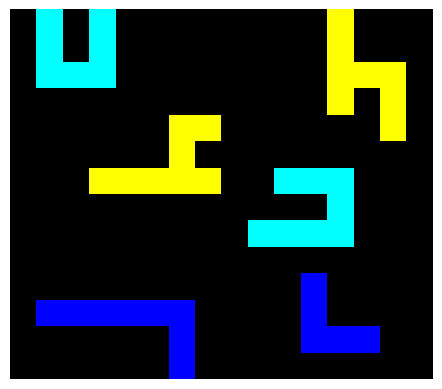

Processing Puzzle id:  e50d258f
extracting solution
[[[2, 8, 1], [8, 8, 8], [2, 1, 8], [8, 8, 2], [2, 8, 1], [1, 8, 8]]]
creating Dataframe
creating destination path
[[2, 8, 1], [8, 8, 8], [2, 1, 8], [8, 8, 2], [2, 8, 1], [1, 8, 8]]


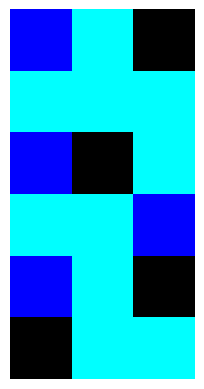

Processing Puzzle id:  e6721834
extracting solution
[[[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 8, 8, 8, 8, 8, 4, 4, 4], [4, 4, 4, 4, 8, 8, 8, 1, 8, 4, 4, 4], [4, 4, 4, 4, 8, 8, 8, 8, 1, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 8, 8, 1, 8, 8, 4, 4, 4, 4, 4, 4], [4, 1, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4], [4, 8, 8, 1, 8, 8, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]]]
creating Dataframe
creating destination path
[[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 8, 8, 8, 8, 8, 4, 4, 4], [4, 4, 4, 4, 8, 8, 8, 1, 8, 4, 4, 4], [4, 4, 4, 4, 8, 8, 8, 8, 1, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 8, 8, 1, 8, 8, 4, 4, 4, 4, 4, 4], [4, 1, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4], [4, 8, 8, 1, 8, 8, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 4, 4, 4, 

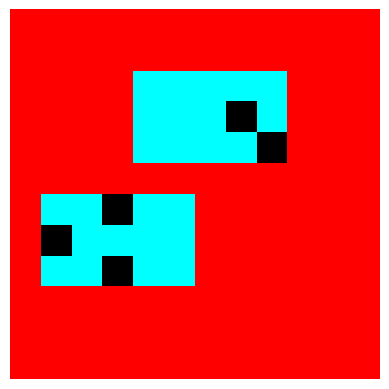

Processing Puzzle id:  e73095fd
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5, 5, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [5, 5, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0], [0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 5, 4, 4, 5, 0], [5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 4, 4, 5, 5], [0, 5, 0, 0, 0, 5, 4, 4, 4, 5, 0, 0, 0, 5, 4, 4, 5, 0], [0, 5, 0, 0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 0], [0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5, 5, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5, 4, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5, 5, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0,

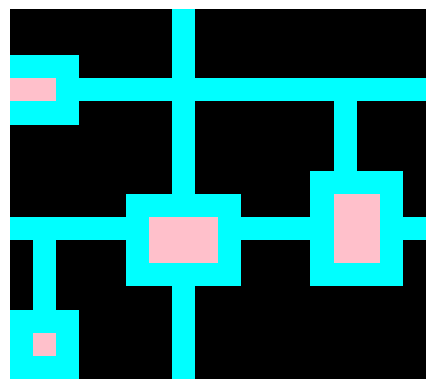

Processing Puzzle id:  e76a88a6
extracting solution
[[[0, 4, 4, 4, 0, 0, 0, 0, 0, 0], [0, 1, 4, 4, 0, 0, 4, 4, 4, 0], [0, 1, 4, 1, 0, 0, 1, 4, 4, 0], [0, 1, 1, 1, 0, 0, 1, 4, 1, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 0], [0, 0, 4, 4, 4, 0, 0, 0, 0, 0], [0, 0, 1, 4, 4, 0, 0, 4, 4, 4], [0, 0, 1, 4, 1, 0, 0, 1, 4, 4], [0, 0, 1, 1, 1, 0, 0, 1, 4, 1], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]]]
creating Dataframe
creating destination path
[[0, 4, 4, 4, 0, 0, 0, 0, 0, 0], [0, 1, 4, 4, 0, 0, 4, 4, 4, 0], [0, 1, 4, 1, 0, 0, 1, 4, 4, 0], [0, 1, 1, 1, 0, 0, 1, 4, 1, 0], [0, 0, 0, 0, 0, 0, 1, 1, 1, 0], [0, 0, 4, 4, 4, 0, 0, 0, 0, 0], [0, 0, 1, 4, 4, 0, 0, 4, 4, 4], [0, 0, 1, 4, 1, 0, 0, 1, 4, 4], [0, 0, 1, 1, 1, 0, 0, 1, 4, 1], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]]


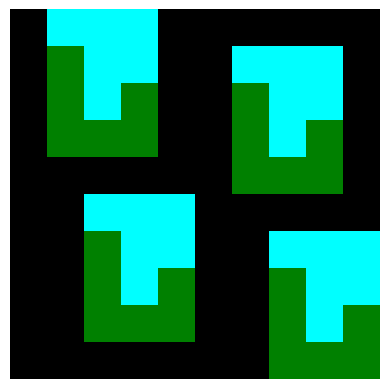

Processing Puzzle id:  e8593010
extracting solution
[[[3, 5, 5, 5, 5, 5, 1, 1, 5, 5], [5, 5, 5, 3, 5, 5, 1, 5, 2, 5], [5, 5, 1, 5, 5, 5, 5, 5, 2, 5], [5, 1, 1, 5, 5, 5, 5, 5, 5, 5], [2, 5, 5, 5, 5, 5, 2, 5, 5, 5], [2, 5, 5, 3, 5, 5, 2, 5, 1, 1], [5, 5, 2, 5, 5, 5, 5, 5, 1, 5], [5, 5, 2, 5, 5, 5, 5, 5, 5, 3], [2, 2, 5, 5, 5, 5, 1, 5, 5, 5], [5, 5, 5, 5, 3, 5, 1, 1, 5, 3]]]
creating Dataframe
creating destination path
[[3, 5, 5, 5, 5, 5, 1, 1, 5, 5], [5, 5, 5, 3, 5, 5, 1, 5, 2, 5], [5, 5, 1, 5, 5, 5, 5, 5, 2, 5], [5, 1, 1, 5, 5, 5, 5, 5, 5, 5], [2, 5, 5, 5, 5, 5, 2, 5, 5, 5], [2, 5, 5, 3, 5, 5, 2, 5, 1, 1], [5, 5, 2, 5, 5, 5, 5, 5, 1, 5], [5, 5, 2, 5, 5, 5, 5, 5, 5, 3], [2, 2, 5, 5, 5, 5, 1, 5, 5, 5], [5, 5, 5, 5, 3, 5, 1, 1, 5, 3]]


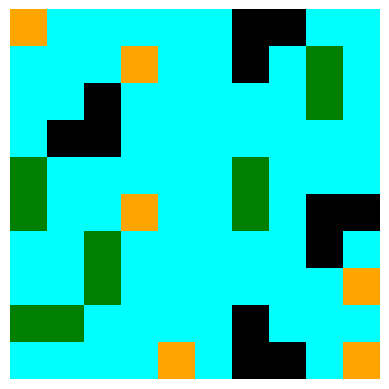

Processing Puzzle id:  e8dc4411
extracting solution
[[[6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 6, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 6, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]]]
creating Dataframe
creating destination path


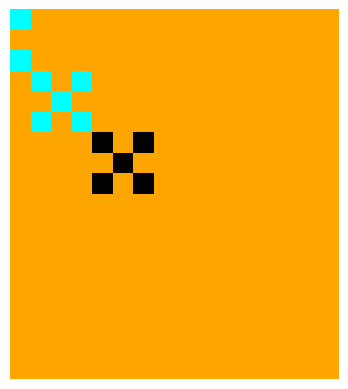

Processing Puzzle id:  e9614598
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 3, 3, 3, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0], [0, 0, 3, 3, 3, 0], [0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 3, 3, 3, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 

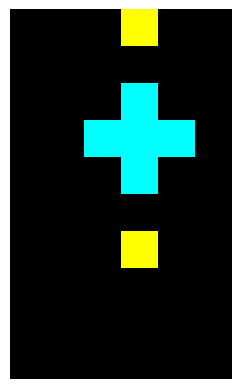

Processing Puzzle id:  e98196ab
extracting solution
[[[6, 0, 0, 0, 6, 0, 6, 0, 0, 0, 7], [0, 0, 7, 7, 0, 0, 0, 0, 7, 0, 6], [6, 0, 0, 0, 6, 0, 7, 0, 0, 0, 6], [0, 7, 0, 7, 0, 0, 0, 0, 0, 6, 7], [6, 0, 0, 6, 0, 0, 7, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[6, 0, 0, 0, 6, 0, 6, 0, 0, 0, 7], [0, 0, 7, 7, 0, 0, 0, 0, 7, 0, 6], [6, 0, 0, 0, 6, 0, 7, 0, 0, 0, 6], [0, 7, 0, 7, 0, 0, 0, 0, 0, 6, 7], [6, 0, 0, 6, 0, 0, 7, 0, 0, 0, 0]]


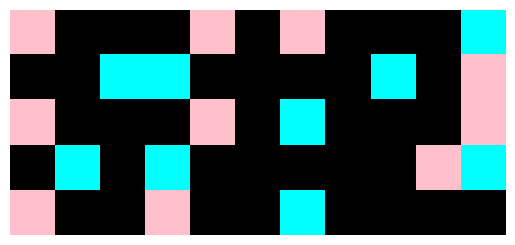

Processing Puzzle id:  e9afcf9a
extracting solution
[[[6, 2, 6, 2, 6, 2], [2, 6, 2, 6, 2, 6]]]
creating Dataframe
creating destination path
[[6, 2, 6, 2, 6, 2], [2, 6, 2, 6, 2, 6]]


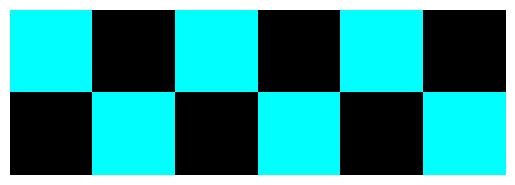

Processing Puzzle id:  ea32f347
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 4, 4, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 4, 4, 4, 4, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


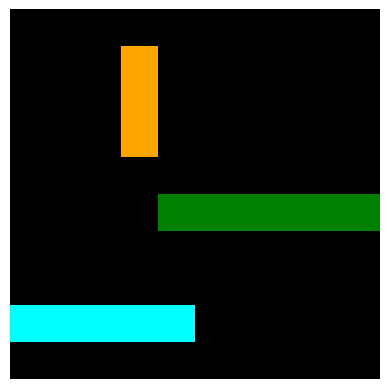

Processing Puzzle id:  ea786f4a
extracting solution
[[[0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0], [6, 0, 6, 6, 6, 6, 6, 6, 6, 0, 6], [6, 6, 0, 6, 6, 6, 6, 6, 0, 6, 6], [6, 6, 6, 0, 6, 6, 6, 0, 6, 6, 6], [6, 6, 6, 6, 0, 6, 0, 6, 6, 6, 6], [6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6], [6, 6, 6, 6, 0, 6, 0, 6, 6, 6, 6], [6, 6, 6, 0, 6, 6, 6, 0, 6, 6, 6], [6, 6, 0, 6, 6, 6, 6, 6, 0, 6, 6], [6, 0, 6, 6, 6, 6, 6, 6, 6, 0, 6], [0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0]]]
creating Dataframe
creating destination path
[[0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0], [6, 0, 6, 6, 6, 6, 6, 6, 6, 0, 6], [6, 6, 0, 6, 6, 6, 6, 6, 0, 6, 6], [6, 6, 6, 0, 6, 6, 6, 0, 6, 6, 6], [6, 6, 6, 6, 0, 6, 0, 6, 6, 6, 6], [6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6], [6, 6, 6, 6, 0, 6, 0, 6, 6, 6, 6], [6, 6, 6, 0, 6, 6, 6, 0, 6, 6, 6], [6, 6, 0, 6, 6, 6, 6, 6, 0, 6, 6], [6, 0, 6, 6, 6, 6, 6, 6, 6, 0, 6], [0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0]]


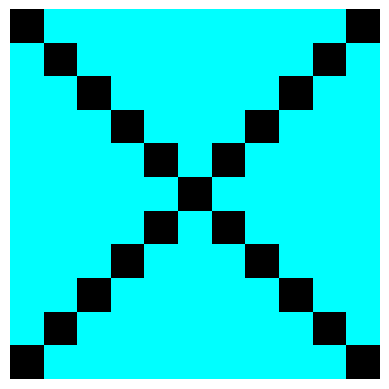

Processing Puzzle id:  eb281b96
extracting solution
[[[0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0], [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0], [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0], [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0], [3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3], [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0], [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0], [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0], [0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0], [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0], [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0], [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0], [3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3], [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0], [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0], [0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0], [0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0]]]
creating Dataframe
creating destination path

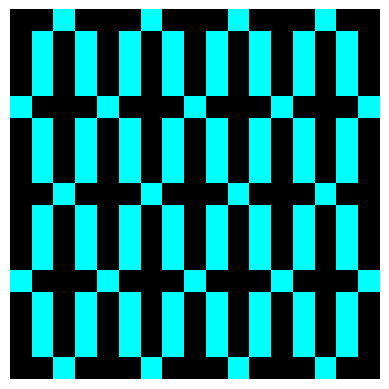

Processing Puzzle id:  eb5a1d5d
extracting solution
[[[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 1, 1, 1, 1, 1, 1, 1, 2], [2, 1, 3, 3, 3, 3, 3, 1, 2], [2, 1, 3, 8, 8, 8, 3, 1, 2], [2, 1, 3, 8, 2, 8, 3, 1, 2], [2, 1, 3, 8, 8, 8, 3, 1, 2], [2, 1, 3, 3, 3, 3, 3, 1, 2], [2, 1, 1, 1, 1, 1, 1, 1, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]]]
creating Dataframe
creating destination path
[[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 1, 1, 1, 1, 1, 1, 1, 2], [2, 1, 3, 3, 3, 3, 3, 1, 2], [2, 1, 3, 8, 8, 8, 3, 1, 2], [2, 1, 3, 8, 2, 8, 3, 1, 2], [2, 1, 3, 8, 8, 8, 3, 1, 2], [2, 1, 3, 3, 3, 3, 3, 1, 2], [2, 1, 1, 1, 1, 1, 1, 1, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]]


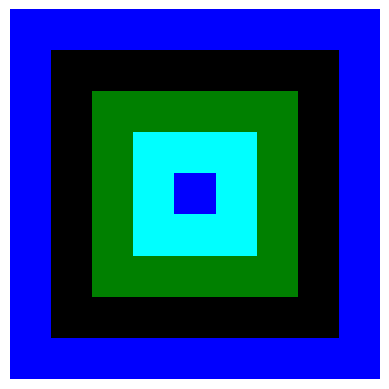

Processing Puzzle id:  ec883f72
extracting solution
[[[0, 0, 0, 0, 3, 0, 4, 4, 0, 3, 0, 0], [0, 0, 0, 0, 3, 0, 4, 4, 0, 3, 0, 0], [0, 0, 0, 0, 3, 0, 4, 4, 0, 3, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0], [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4], [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 3, 0, 4, 4, 0, 3, 0, 0], [0, 0, 0, 0, 3, 0, 4, 4, 0, 3, 0, 0], [0, 0, 0, 0, 3, 0, 4, 4, 0, 3, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0], [0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0], [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0], [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4], [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 

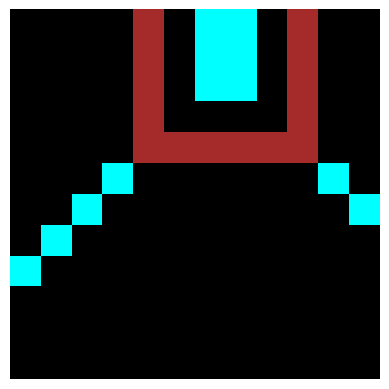

Processing Puzzle id:  ecdecbb3
extracting solution
[[[0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0, 8, 2, 8, 2, 2, 0, 0, 0], [0, 2, 2, 8, 2, 8, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 8, 2, 8, 2, 2, 2, 2, 2, 8, 2, 8, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 2, 8, 2, 2, 2, 0, 0], [0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0], [0

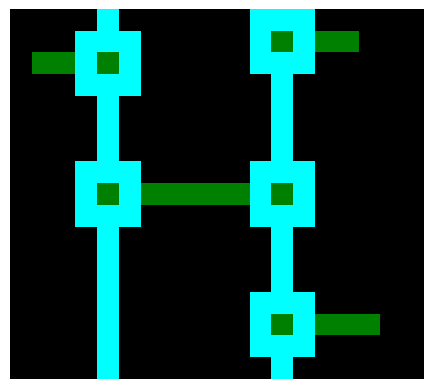

Processing Puzzle id:  ed36ccf7
extracting solution
[[[0, 0, 5], [0, 0, 5], [0, 5, 0]]]
creating Dataframe
creating destination path
[[0, 0, 5], [0, 0, 5], [0, 5, 0]]


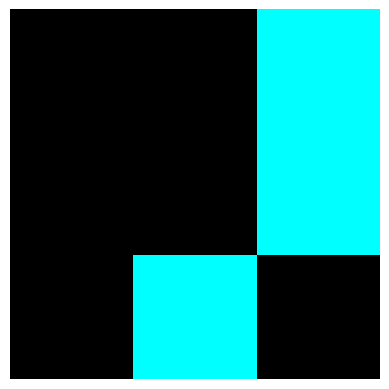

Processing Puzzle id:  ef135b50
extracting solution
[[[2, 2, 2, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 9, 9, 9, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 2, 2, 2, 2], [0, 2, 2, 2, 9, 9, 2, 2, 2, 2], [0, 2, 2, 2, 0, 0, 0, 0, 0, 0], [0, 2, 2, 2, 9, 2, 2, 2, 2, 0], [0, 2, 2, 2, 9, 2, 2, 2, 2, 0], [0, 2, 2, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[2, 2, 2, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 9, 9, 9, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 2, 2, 2, 2], [0, 2, 2, 2, 9, 9, 2, 2, 2, 2], [0, 2, 2, 2, 0, 0, 0, 0, 0, 0], [0, 2, 2, 2, 9, 2, 2, 2, 2, 0], [0, 2, 2, 2, 9, 2, 2, 2, 2, 0], [0, 2, 2, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


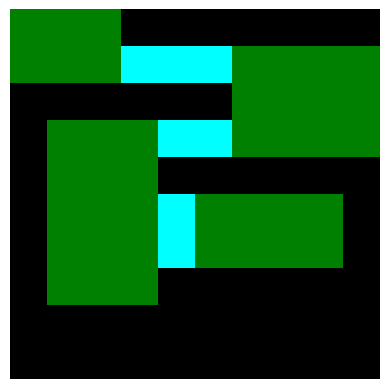

Processing Puzzle id:  f15e1fac
extracting solution
[[[0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0], [8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0], [8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [8, 8, 8, 0, 0, 0, 0, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0], [8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8], [0, 0, 0, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0]

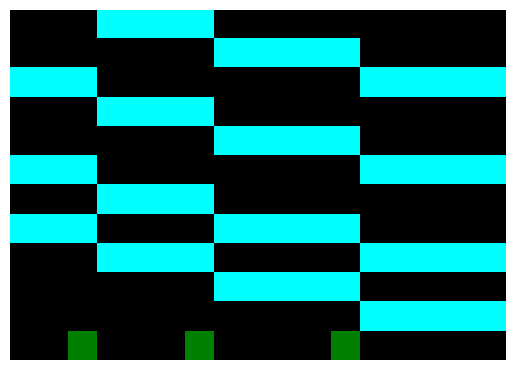

Processing Puzzle id:  f1cefba8
extracting solution
[[[0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [0, 1, 1, 8, 8, 8, 1, 8, 8, 8, 1, 8, 8, 1, 1, 0, 0, 0], [0, 1, 1, 8, 8, 8, 1, 8, 8, 8, 1, 8, 8, 1, 1, 0, 0, 0], [0, 1, 1, 8, 8, 8, 1, 8, 8, 8, 1, 8, 8, 1, 1, 0, 0, 0], [0, 1, 1, 8, 8, 8, 1, 8, 8, 8, 1, 8, 8, 1, 1, 0, 0, 0], [8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8, 8], [0, 1, 1, 8, 8, 8, 1, 8, 8, 8, 1, 8, 8, 1, 1, 0, 0, 0], [0, 1, 1, 8, 8, 8, 1, 8, 8, 8, 1, 8, 8, 1, 1, 0, 0, 0], [0, 1, 1, 8, 8, 8, 1, 8, 8, 8, 1, 8, 8, 1, 1, 0, 0, 0], [0, 1, 1, 8, 8, 8, 1, 8, 8, 8, 1, 8, 8, 1, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0

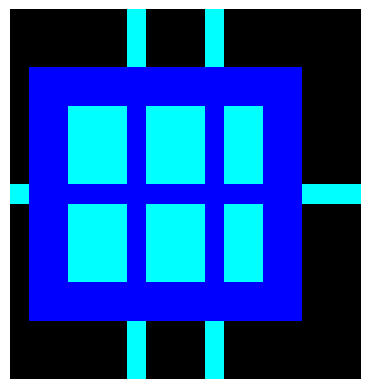

Processing Puzzle id:  f25fbde4
extracting solution
[[[0, 0, 4, 4, 0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0, 4, 4, 0, 0], [4, 4, 0, 0, 4, 4, 0, 0, 4, 4], [4, 4, 0, 0, 4, 4, 0, 0, 4, 4], [0, 0, 4, 4, 0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0, 4, 4, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 4, 4, 0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0, 4, 4, 0, 0], [4, 4, 0, 0, 4, 4, 0, 0, 4, 4], [4, 4, 0, 0, 4, 4, 0, 0, 4, 4], [0, 0, 4, 4, 0, 0, 4, 4, 0, 0], [0, 0, 4, 4, 0, 0, 4, 4, 0, 0]]


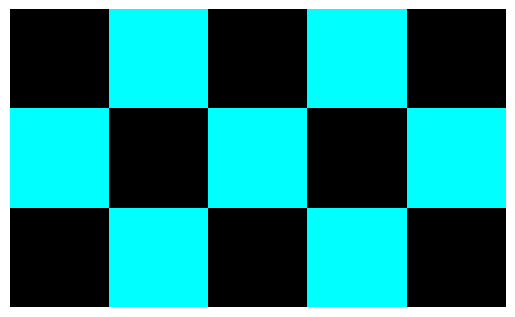

Processing Puzzle id:  f25ffba3
extracting solution
[[[7, 1, 4, 4], [7, 1, 3, 3], [7, 1, 3, 0], [7, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [7, 1, 0, 0], [7, 1, 3, 0], [7, 1, 3, 3], [7, 1, 4, 4]]]
creating Dataframe
creating destination path
[[7, 1, 4, 4], [7, 1, 3, 3], [7, 1, 3, 0], [7, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [7, 1, 0, 0], [7, 1, 3, 0], [7, 1, 3, 3], [7, 1, 4, 4]]


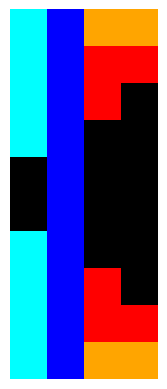

Processing Puzzle id:  f2829549
extracting solution
[[[3, 0, 3], [0, 0, 0], [0, 3, 3], [0, 0, 0]]]
creating Dataframe
creating destination path
[[3, 0, 3], [0, 0, 0], [0, 3, 3], [0, 0, 0]]


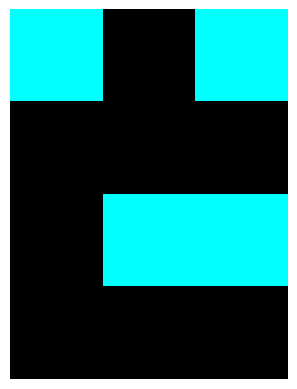

Processing Puzzle id:  f35d900a
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0], [0, 1, 4, 1, 5, 0, 5, 0, 5, 0, 5, 4, 1, 4, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0], [0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0], [0, 4, 1, 4, 5, 0, 5, 0, 5, 0, 5, 1, 4, 1, 0, 0, 0, 0], [0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0

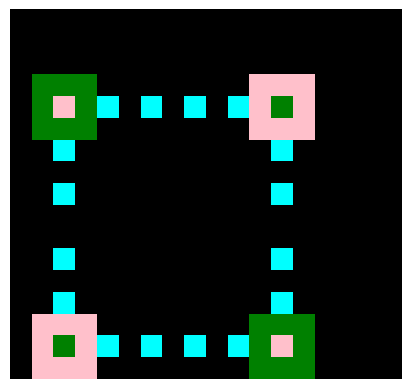

Processing Puzzle id:  f5b8619d
extracting solution
[[[8, 0, 3, 8, 8, 0, 3, 8], [8, 0, 8, 8, 8, 0, 8, 8], [8, 0, 8, 3, 8, 0, 8, 3], [3, 0, 8, 8, 3, 0, 8, 8], [8, 0, 3, 8, 8, 0, 3, 8], [8, 0, 8, 8, 8, 0, 8, 8], [8, 0, 8, 3, 8, 0, 8, 3], [3, 0, 8, 8, 3, 0, 8, 8]]]
creating Dataframe
creating destination path
[[8, 0, 3, 8, 8, 0, 3, 8], [8, 0, 8, 8, 8, 0, 8, 8], [8, 0, 8, 3, 8, 0, 8, 3], [3, 0, 8, 8, 3, 0, 8, 8], [8, 0, 3, 8, 8, 0, 3, 8], [8, 0, 8, 8, 8, 0, 8, 8], [8, 0, 8, 3, 8, 0, 8, 3], [3, 0, 8, 8, 3, 0, 8, 8]]


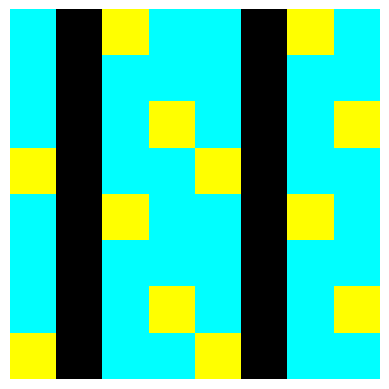

Processing Puzzle id:  f76d97a5
extracting solution
[[[0, 0, 0, 3, 0], [0, 3, 0, 0, 0], [0, 3, 3, 0, 3], [0, 0, 0, 3, 0], [3, 3, 3, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 3, 0], [0, 3, 0, 0, 0], [0, 3, 3, 0, 3], [0, 0, 0, 3, 0], [3, 3, 3, 0, 0]]


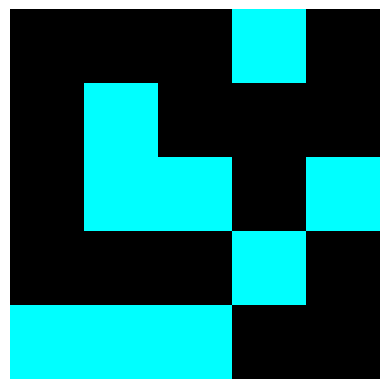

Processing Puzzle id:  f8a8fe49
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0], [0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0,

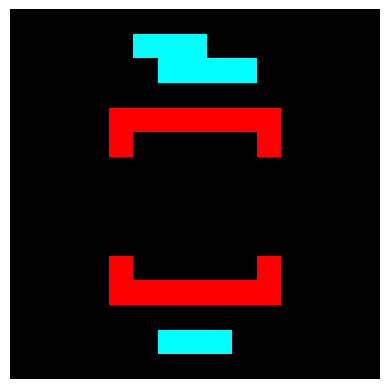

Processing Puzzle id:  f8b3ba0a
extracting solution
[[[4], [1], [8]]]
creating Dataframe
creating destination path
[[4], [1], [8]]


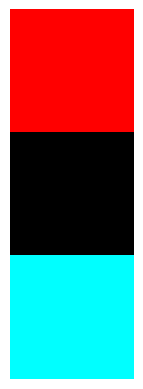

Processing Puzzle id:  f8c80d96
extracting solution
[[[4, 4, 4, 4, 4, 4, 5, 5, 4, 5], [5, 5, 5, 5, 5, 4, 5, 5, 4, 5], [5, 5, 5, 5, 5, 4, 5, 5, 4, 5], [4, 4, 4, 5, 5, 4, 5, 5, 4, 5], [5, 5, 4, 5, 5, 4, 5, 5, 4, 5], [5, 5, 4, 5, 5, 4, 5, 5, 4, 5], [4, 4, 4, 5, 5, 4, 5, 5, 4, 5], [5, 5, 5, 5, 5, 4, 5, 5, 4, 5], [5, 5, 5, 5, 5, 4, 5, 5, 4, 5], [4, 4, 4, 4, 4, 4, 5, 5, 4, 5]]]
creating Dataframe
creating destination path
[[4, 4, 4, 4, 4, 4, 5, 5, 4, 5], [5, 5, 5, 5, 5, 4, 5, 5, 4, 5], [5, 5, 5, 5, 5, 4, 5, 5, 4, 5], [4, 4, 4, 5, 5, 4, 5, 5, 4, 5], [5, 5, 4, 5, 5, 4, 5, 5, 4, 5], [5, 5, 4, 5, 5, 4, 5, 5, 4, 5], [4, 4, 4, 5, 5, 4, 5, 5, 4, 5], [5, 5, 5, 5, 5, 4, 5, 5, 4, 5], [5, 5, 5, 5, 5, 4, 5, 5, 4, 5], [4, 4, 4, 4, 4, 4, 5, 5, 4, 5]]


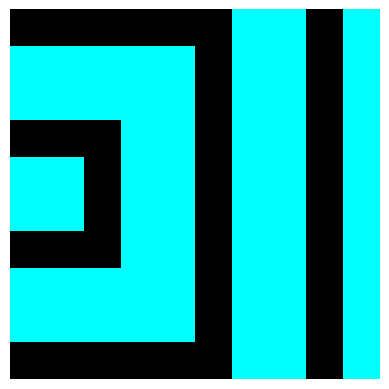

Processing Puzzle id:  f8ff0b80
extracting solution
[[[6], [1], [3]]]
creating Dataframe
creating destination path
[[6], [1], [3]]


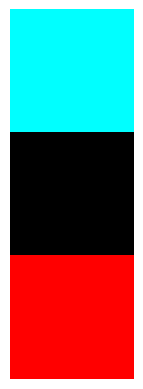

Processing Puzzle id:  f9012d9b
extracting solution
[[[1, 8, 8], [8, 8, 1], [8, 1, 8]]]
creating Dataframe
creating destination path
[[1, 8, 8], [8, 8, 1], [8, 1, 8]]


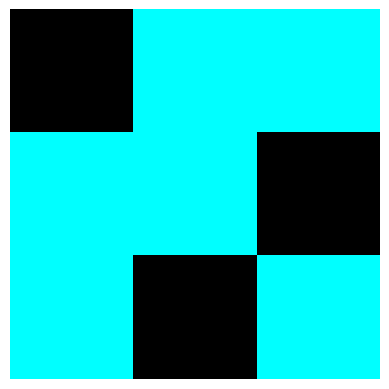

Processing Puzzle id:  fafffa47
extracting solution
[[[0, 0, 0], [2, 0, 0], [0, 2, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0], [2, 0, 0], [0, 2, 0]]


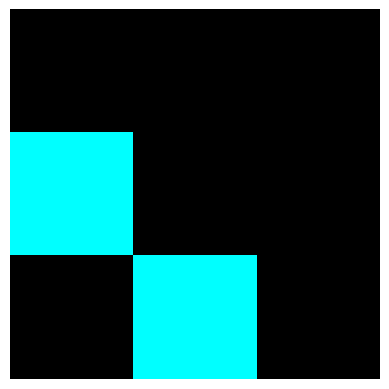

Processing Puzzle id:  fcb5c309
extracting solution
[[[8, 8, 8, 8, 8, 8, 8, 8], [8, 0, 8, 0, 8, 0, 0, 8], [8, 0, 0, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 0, 0, 8], [8, 0, 8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8, 0, 8], [8, 8, 8, 8, 8, 8, 8, 8]]]
creating Dataframe
creating destination path
[[8, 8, 8, 8, 8, 8, 8, 8], [8, 0, 8, 0, 8, 0, 0, 8], [8, 0, 0, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 0, 0, 8], [8, 0, 8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8, 0, 8], [8, 8, 8, 8, 8, 8, 8, 8]]


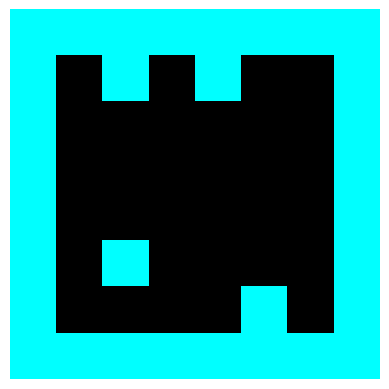

Processing Puzzle id:  fcc82909
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 2, 9, 0, 0], [2, 1, 0, 0, 0, 0, 1, 6, 0, 0], [3, 3, 0, 4, 7, 0, 3, 3, 0, 0], [3, 3, 0, 8, 4, 0, 3, 3, 0, 0], [0, 0, 0, 3, 3, 0, 3, 3, 0, 0], [0, 0, 0, 3, 3, 0, 3, 3, 0, 0], [0, 0, 0, 3, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]
creating Dataframe
creating destination path
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 2, 9, 0, 0], [2, 1, 0, 0, 0, 0, 1, 6, 0, 0], [3, 3, 0, 4, 7, 0, 3, 3, 0, 0], [3, 3, 0, 8, 4, 0, 3, 3, 0, 0], [0, 0, 0, 3, 3, 0, 3, 3, 0, 0], [0, 0, 0, 3, 3, 0, 3, 3, 0, 0], [0, 0, 0, 3, 3, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


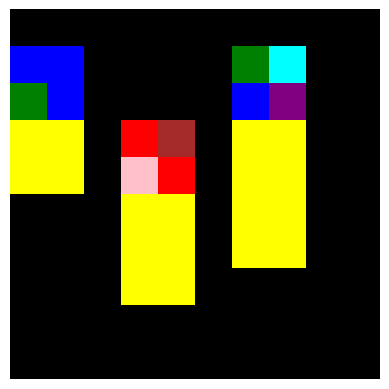

Processing Puzzle id:  feca6190
extracting solution
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 7], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 7, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 7, 8, 9], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 7, 8, 9, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 7, 8, 9, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 7, 8, 9, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 7, 8, 9, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 7, 8, 9, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 7, 8, 9, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 7, 8, 9, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 6, 7, 8, 9, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 6, 7, 8, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 6, 7, 8, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 

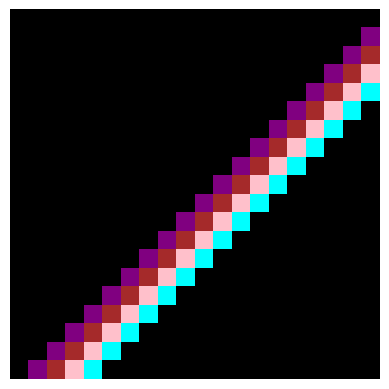

Processing Puzzle id:  ff28f65a
extracting solution
[[[1, 0, 1], [0, 1, 0], [0, 0, 0]], [[1, 0, 1], [0, 1, 0], [1, 0, 0]], [[1, 0, 1], [0, 1, 0], [1, 0, 1]]]
creating Dataframe
creating destination path
[[1, 0, 1], [0, 1, 0], [0, 0, 0]]
[[1, 0, 1], [0, 1, 0], [1, 0, 0]]
[[1, 0, 1], [0, 1, 0], [1, 0, 1]]


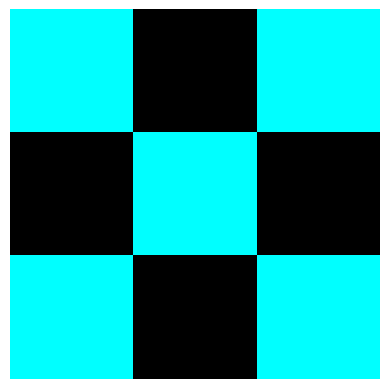

Processing Puzzle id:  ff805c23
extracting solution
[[[8, 8, 8, 8, 8], [0, 0, 8, 8, 0], [0, 8, 0, 0, 8], [8, 8, 8, 8, 8], [8, 0, 8, 8, 0]]]
creating Dataframe
creating destination path
[[8, 8, 8, 8, 8], [0, 0, 8, 8, 0], [0, 8, 0, 0, 8], [8, 8, 8, 8, 8], [8, 0, 8, 8, 0]]


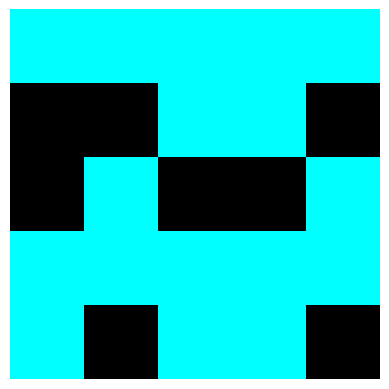

In [5]:
# extracting solutions from the file and putting them into the training folder
file=json.load(open(training_task_test_solution,'r'))

# Define your color map
color_map = ["black", "blue", "green", "yellow", "red", "orange", "purple", "brown", "pink", "cyan"]
cmap = matplotlib.colors.ListedColormap(color_map)

for puzzle_id in file:
    print('================================================================')
    print('Processing Puzzle id: ', puzzle_id)
    print('extracting solution')
    solution=file[f'{puzzle_id}']
    print(solution)
    print('creating Dataframe')
    dataframe=pd.DataFrame({'output':solution})
    print('creating destination path')
    destination_path=f'{training_data_folder}/{puzzle_id}'
    dataframe.to_csv(f'{destination_path}/test_solution.csv',index=False)
    # converting the dataframe into cmap
    for i in range(dataframe.shape[0]):
        output_array=dataframe['output'][i]
        print(output_array)
        output_array=np.array(output_array)
    plt.figure()
    plt.axis('off')  # Disable axes
    plt.grid(True) #enable grids
    plt.imshow(output_array, cmap=cmap)
    plt.savefig(f'{destination_path}/test_output.jpg',bbox_inches='tight')
    plt.show()
    plt.close()

In [6]:
errors = []
puzzle_folder_error = []

def build_simplified_fcn_model(input_shape):
    model = models.Sequential()
    
    # Initial Convolutional block with batch normalization and dropout
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    # Second Convolutional block
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))

    # Third Convolutional block
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))

    # Fourth Convolutional block
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    # Fifth Convolutional block (bottleneck layer)
    model.add(layers.Conv2D(1024, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(1024, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(1024, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.6))

    # Upsampling layers with transposed convolutions and additional convolutional layers
    model.add(layers.Conv2DTranspose(1024, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())

    # Final output layer with sigmoid activation
    model.add(layers.Conv2D(3, (1, 1), padding='same', activation='sigmoid'))

    return model
input_shape=(None,None,3)
model=build_simplified_fcn_model(input_shape)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
# Loop through each puzzle folder in the training data directory
for puzzle_folder in os.listdir(training_data_folder):
    try:
        print('Puzzle id:', puzzle_folder)
        path = os.path.join(training_data_folder, puzzle_folder)
        print('Path generated:', path)
        
        # Initialize lists to store input and output matrices
        input_matrices = []
        output_matrices = []

        for file in os.listdir(path):
            file_path = os.path.join(path, file)
            if file == 'train.csv':
                dataframe = pd.read_csv(file_path)
            
                for i in range(dataframe.shape[0]):
                    input_array = dataframe['input'][i]
                    output_array = dataframe['output'][i]
                    
                    # Process input and output arrays
                    input_array = input_array.replace('],', '];')
                    output_array = output_array.replace('],', '];')
                    input_array = np.array(np.matrix(input_array))
                    output_array = np.array(np.matrix(output_array))
                    
                    # Ensure 4D input shape for the model
                    input_array = np.expand_dims(input_array, axis=0)  # Add batch dimension
                    input_array = np.expand_dims(input_array, axis=-1)  # Add channel dimension
                    output_array = np.expand_dims(output_array, axis=0)  # Add batch dimension
                    output_array = np.expand_dims(output_array, axis=-1)  # Add channel dimension

                    input_matrices.append(input_array)
                    output_matrices.append(output_array)
                
            if file == 'test.csv':
                dataframe = pd.read_csv(file_path)
                for i in range(dataframe.shape[0]):
                    input_array = dataframe['input'][i]
                    input_array = input_array.replace('],', '];')
                    input_array = np.array(np.matrix(input_array))

        # Train the model on each pair of input and output matrices individually
        k = 0
        for input_matrix, output_matrix in zip(input_matrices, output_matrices):
            print(f'Training pair: {k}')
            input_matrix = tf.convert_to_tensor(input_matrix, dtype=tf.float32)
            output_matrix = tf.convert_to_tensor(output_matrix, dtype=tf.float32)
            input_matrix = tf.expand_dims(input_matrix, axis=0)  # Add batch dimension
            output_matrix = tf.expand_dims(output_matrix, axis=0)  # Add batch dimension
            history = model.fit(input_matrix, output_matrix, epochs=50, verbose=0)
            accuracy = history.history['loss'][-1]
            print(f'Training Accuracy for pair {k}: {accuracy}')
            k += 1

        
        # Load and preprocess the test input matrix
        test_matrix_input = []
        for file in os.listdir(path):
            if file == 'test.csv':
                dataframe = pd.read_csv(file_path)
                for i in range(dataframe.shape[0]):
                    input_array = dataframe['input'][i]
                    input_array = input_array.replace('],', '];')
                    input_array = np.array(np.matrix(input_array))
                    test_matrix_input.append(input_array)
        
        test_matrix_input = [tf.convert_to_tensor(mat, dtype=tf.float32) for mat in test_matrix_input]
        test_matrix_input = [tf.expand_dims(mat, axis=0) for mat in test_matrix_input]  # Add batch dimension for each matrix
        
        predictions=[]
        # Make predictions
        for mat in test_matrix_input:
            prediction = model.predict(mat)

            # Making predictions folder in each puzzle folder
            predicted_matrix_path = os.path.join(path, 'predicted_matrix')
            if not os.path.exists(predicted_matrix_path):  # Check if the directory exists
                # Create the directory if it doesn't exist
                print('Creating predicted matrix directory')
                os.mkdir(predicted_matrix_path)

            # Save the prediction matrix
            prediction = prediction.squeeze().numpy()  # Remove batch dimension 
            predictions.append(prediction)
            print(f'Prediction: ',prediction)
        
        pred_dataset=pd.DataFrame({'output':predictions})
        pred_dataset.to_csv(os.path.join(path, 'predictions.csv'), index=False)

        # Load the test solutions for comparison
        test_solution_matrices = []
        solution_file_path = os.path.join(path, 'test_solution.csv')
        if os.path.exists(solution_file_path):
            solution_dataframe = pd.read_csv(solution_file_path)
            for i in range(solution_dataframe.shape[0]):
                solution_array = solution_dataframe['output'][i]
                solution_array = np.array(solution_array)
                test_solution_matrices.append(solution_array)
        print('Solution: ',test_solution_matrices)

    except Exception as e:
        print(f'Error processing puzzle {puzzle_folder}: {e}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, None, None, 64)    1792      
                                                                 
 batch_normalization_23 (Bat  (None, None, None, 64)   256       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, None, None, 64)    36928     
                                                                 
 batch_normalization_24 (Bat  (None, None, None, 64)   256       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, None, None, 64)    0         
                                                                 
 conv2d_21 (Conv2D)          (None, None, None, 128)  

KeyboardInterrupt: 

In [ ]:
if file == 'train.csv':
            dataframe = pd.read_csv(file_path)
            
            for i in range(dataframe.shape[0]):
                input_array = dataframe['input'][i]
                output_array = dataframe['output'][i]
                
                # Process input and output arrays
                input_array = input_array.replace('],', '];')
                output_array = output_array.replace('],', '];')
                input_array = np.asarray(np.matrix(input_array))
                output_array = np.asarray(np.matrix(output_array))
                
                # Plot and save input array
                plt.figure()
                plt.imshow(input_array, cmap=cmap)
                plt.axis('off')  # Disable axes
                plt.grid(True)  # Enable grid
                plt.savefig(f"{path}/input{i}.jpg", bbox_inches='tight')
                plt.close()

                # Plot and save output array
                plt.figure()
                plt.imshow(output_array, cmap=cmap)
                plt.axis('off')  # Disable axes
                plt.grid(visible=True,axis='both')  # Enable grid
                plt.savefig(f"{path}/output{i}.jpg", bbox_inches='tight')
                plt.close()
        if file=='test.csv':
            dataframe=pd.read_csv(file_path)
            for i in range(dataframe.shape[0]):
                input_array=dataframe['input'][i]

                input_array=input_array.replace('],', '];')
                input_array=np.asarray(np.matrix(input_array))